<a href="https://colab.research.google.com/github/sugarchins/ML-NLP-Projects/blob/main/ANN_Life_Expectancy_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

b)	Use the Life Expectancy Prediction dataset from below Kaggle link and create an end-to-end project on Jupyter/Colab to predict the life expectancy.

https://www.kaggle.com/code/ranasabrii/life-expectancy-regression-with-ann/notebook

i.	Download the dataset from above link and load it into your Python environment.

ii.	Perform the EDA and do the visualizations.

iii.	Check the distributions/skewness in the variables and do the transformations if required.

iv.	Check/Treat the outliers and do the feature scaling if required.

v.	Build Deep Learning model using ANN with multiple hidden layers.

vi.	Apply the dropout regularization and early stopping techniques to improve model performance.

vii.	Use the modelCheckpoint also to store the parameters after each epoch.

viii.	Use the KerasTuner to tune to best parameters (No. of hidden layers, optimizers, loss function, activation functions etc.)

ix.	Compare the accuracies of different models and finalize the best model.
**bold text**

# Life Expectancy Model(ANN)


In [ ]:
!pip install keras-tuner

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
libraries = {
    "numpy": "np",
    "pandas": "pd",
    "scipy": "scipy",
    "statsmodels": "statsmodels",
    "matplotlib": "matplotlib",
    "seaborn": "sns",
    "plotly": "plotly",
    "scikit-learn": "sklearn",
    "xgboost": "xgboost",
    "catboost": "catboost",
    "lightgbm": "lightgbm",
    "tensorflow": "tf",
    "keras": "keras"
}

# Dictionary to store library versions
library_versions = {}

# Check and print versions for each library
for lib in libraries.keys():
    try:
        # Special case for scikit-learn to debug the import explicitly
        if lib == "scikit-learn":
            import sklearn
            library_versions[lib] = sklearn.__version__
        else:
            module = __import__(lib)
            library_versions[lib] = module.__version__
    except ModuleNotFoundError:
        library_versions[lib] = "Not installed"
    except Exception as e:
        library_versions[lib] = f"Error: {str(e)}"

# Display results
for lib, version in library_versions.items():
    if version == "Not installed":
        print(f"{lib}: Not installed. Install using 'pip install {lib}'")
    else:
        print(f"{lib}: {version}")


numpy: 2.0.2
pandas: 2.2.2
scipy: 1.15.2
statsmodels: 0.14.4
matplotlib: 3.10.0
seaborn: 0.13.2
plotly: 5.24.1
scikit-learn: 1.6.1
xgboost: 2.1.4
catboost: Not installed. Install using 'pip install catboost'
lightgbm: 4.5.0
tensorflow: 2.18.0
keras: 3.8.0


In [ ]:
libraries = {
    "numpy": np,
    "pandas": pd,
    "matplotlib": matplotlib,
    "seaborn": sns,
    "scikit-learn": sklearn,
    "tensorflow": tf,
    "keras": keras
}

for lib_name, lib in libraries.items():
  try:
    print(f"{lib_name}: {lib.__version__}")
  except AttributeError:
      print(f"{lib_name}: version not found")


numpy: 2.0.2
pandas: 2.2.2
matplotlib: 3.10.0
seaborn: 0.13.2
scikit-learn: 1.6.1
tensorflow: 2.18.0
keras: 3.8.0


#**i. Download the dataset from above link and load it into your Python environment.**

In [ ]:
df = pd.read_csv('/content/Life Expectancy Data (1).csv')

In [ ]:
df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [ ]:
df.shape

(2938, 22)

#**ii. Perform the EDA and do the visualizations.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [ ]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
def modify_column_names(df):

    new_columns = []
    for col in df.columns:
        if col == 'HIV/AIDS' or col == 'GDP':
            new_columns.append(col)
        else:
            modified_col = col.strip()  # Remove trailing spaces
            if len(modified_col) > 0 :
                new_columns.append(modified_col[0].upper() + modified_col[1:])
            else:
                new_columns.append(modified_col)
    df.columns = new_columns
    return df

df = modify_column_names(df)
df.head()


Country  Year      Status  Life expectancy  Adult Mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   Infant deaths  Alcohol  Percentage expenditure  Hepatitis B  Measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   
3             69     0.01               78.184215         67.0     2787  ...   
4             71     0.01                7.097109         68.0     3013  ...   

   Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0    6.0               8.16        65.0       0.1  584.259210  33736494.0   
1   58.0               8.18        62.0       0.1  612.696514    327582.0   
2   62.0               8.13        64.0       0.1  631.744976  31731688.0   
3   67.0               8.52        67.0       0.1  669.959000   3696958.0   
4   68.0               7.87        68.0       0.1   63.537231   2978599.0   

   Thinness  1-19 years  Thinness 5-9 years  Income composition of resources  \
0                  17.2                17.3                            0.479   
1                  17.5                17.5                            0.476   
2                  17.7                17.7                            0.470   
3                  17.9                18.0                            0.463   
4                  18.2                18.2                            0.454   

   Schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5  

[5 rows x 22 columns]

In [ ]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness  1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
Infant deaths                        0
Alcohol                            194
Percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
Under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness  1-19 years                34
Thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

<Axes: >

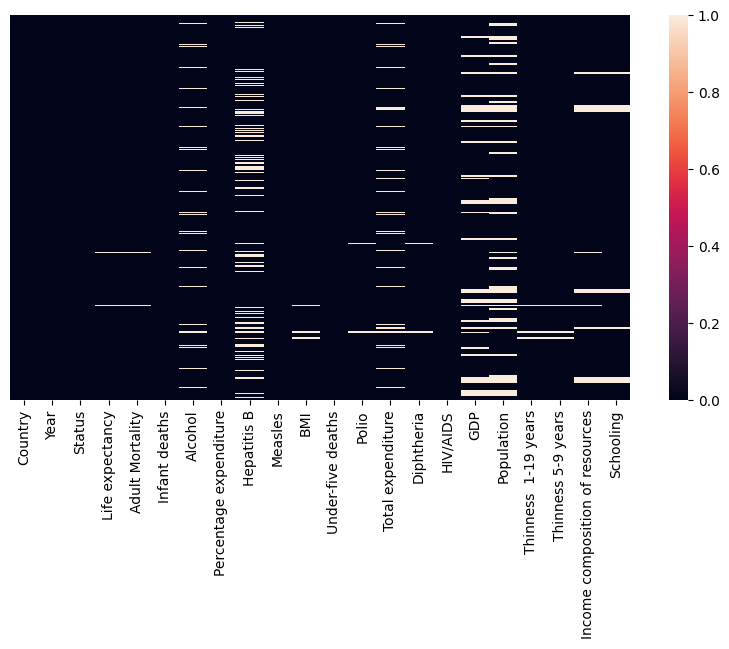

In [ ]:
#plotting the missing values
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull() , yticklabels = False)

In [ ]:
missed_values =[fea for fea in df.columns if df[fea].isnull().sum()>0]

In [ ]:
missed_values

['Life expectancy',
 'Adult Mortality',
 'Alcohol',
 'Hepatitis B',
 'BMI',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'GDP',
 'Population',
 'Thinness  1-19 years',
 'Thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [ ]:
#Treating the missing values
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mean())

In [ ]:
#After treating the missing values
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
Infant deaths                      0
Alcohol                            0
Percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
Under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness  1-19 years               0
Thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

<Axes: >

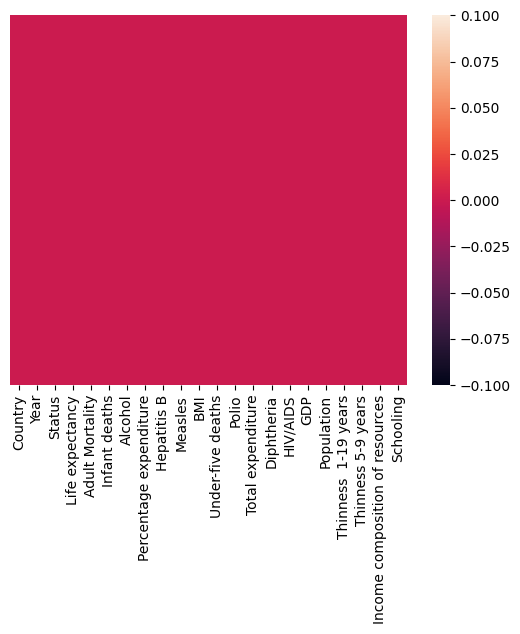

In [ ]:
sns.heatmap(df.isnull() , yticklabels = False)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

Year  Life expectancy  Adult Mortality  Infant deaths  \
count  2938.000000      2938.000000      2938.000000    2938.000000   
mean   2007.518720        69.224932       164.796448      30.303948   
std       4.613841         9.507640       124.080302     117.926501   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2004.000000        63.200000        74.000000       0.000000   
50%    2008.000000        72.000000       144.000000       3.000000   
75%    2012.000000        75.600000       227.000000      22.000000   
max    2015.000000        89.000000       723.000000    1800.000000   

           Alcohol  Percentage expenditure  Hepatitis B        Measles  \
count  2938.000000             2938.000000  2938.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       3.916288             1987.914858    22.586855   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       1.092500                4.685343    80.940461       0.000000   
50%       4.160000               64.912906    87.000000      17.000000   
75%       7.390000              441.534144    96.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

               BMI  Under-five deaths        Polio  Total expenditure  \
count  2938.000000        2938.000000  2938.000000        2938.000000   
mean     38.321247          42.035739    82.550188           5.938190   
std      19.927677         160.445548    23.352143           2.400274   
min       1.000000           0.000000     3.000000           0.370000   
25%      19.400000           0.000000    78.000000           4.370000   
50%      43.000000           4.000000    93.000000           5.938190   
75%      56.100000          28.000000    97.000000           7.330000   
max      87.300000        2500.000000    99.000000          17.600000   

        Diphtheria     HIV/AIDS            GDP    Population  \
count  2938.000000  2938.000000    2938.000000  2.938000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.640073     5.077785   13136.800417  5.381546e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     580.486996  4.189172e+05   
50%      93.000000     0.100000    3116.561755  3.675929e+06   
75%      97.000000     0.800000    7483.158469  1.275338e+07   
max      99.000000    50.600000  119172.741800  1.293859e+09   

       Thinness  1-19 years  Thinness 5-9 years  \
count           2938.000000         2938.000000   
mean               4.839704            4.870317   
std                4.394535            4.482708   
min                0.100000            0.100000   
25%                1.600000            1.600000   
50%                3.400000            3.400000   
75%                7.100000            7.200000   
max               27.700000           28.600000   

       Income composition of resources    Schooling  
count                      2938.000000  2938.000000  
mean                          0.627551    11.992793  
std                           0.204820     3.264381  
min                           0.000000     0.000000  
25%                           0.504250    10.300000  
50%                           0.662000    12.100000  
75%                           0.772000    14.100000  
max                           0.948000    20.700000

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
df.describe().T

count        mean         std     min  \
Year                            2938.00     2007.52        4.61 2000.00   
Life expectancy                 2938.00       69.22        9.51   36.30   
Adult Mortality                 2938.00      164.80      124.08    1.00   
Infant deaths                   2938.00       30.30      117.93    0.00   
Alcohol                         2938.00        4.60        3.92    0.01   
Percentage expenditure          2938.00      738.25     1987.91    0.00   
Hepatitis B                     2938.00       80.94       22.59    1.00   
Measles                         2938.00     2419.59    11467.27    0.00   
BMI                             2938.00       38.32       19.93    1.00   
Under-five deaths               2938.00       42.04      160.45    0.00   
Polio                           2938.00       82.55       23.35    3.00   
Total expenditure               2938.00        5.94        2.40    0.37   
Diphtheria                      2938.00       82.32       23.64    2.00   
HIV/AIDS                        2938.00        1.74        5.08    0.10   
GDP                             2938.00     7483.16    13136.80    1.68   
Population                      2938.00 12753375.12 53815462.56   34.00   
Thinness  1-19 years            2938.00        4.84        4.39    0.10   
Thinness 5-9 years              2938.00        4.87        4.48    0.10   
Income composition of resources 2938.00        0.63        0.20    0.00   
Schooling                       2938.00       11.99        3.26    0.00   

                                      25%        50%         75%           max  
Year                              2004.00    2008.00     2012.00       2015.00  
Life expectancy                     63.20      72.00       75.60         89.00  
Adult Mortality                     74.00     144.00      227.00        723.00  
Infant deaths                        0.00       3.00       22.00       1800.00  
Alcohol                              1.09       4.16        7.39         17.87  
Percentage expenditure               4.69      64.91      441.53      19479.91  
Hepatitis B                         80.94      87.00       96.00         99.00  
Measles                              0.00      17.00      360.25     212183.00  
BMI                                 19.40      43.00       56.10         87.30  
Under-five deaths                    0.00       4.00       28.00       2500.00  
Polio                               78.00      93.00       97.00         99.00  
Total expenditure                    4.37       5.94        7.33         17.60  
Diphtheria                          78.00      93.00       97.00         99.00  
HIV/AIDS                             0.10       0.10        0.80         50.60  
GDP                                580.49    3116.56     7483.16     119172.74  
Population                      418917.25 3675929.00 12753375.12 1293859294.00  
Thinness  1-19 years                 1.60       3.40        7.10         27.70  
Thinness 5-9 years                   1.60       3.40        7.20         28.60  
Income composition of resources      0.50       0.66        0.77          0.95  
Schooling                           10.30      12.10       14.10         20.70

In [ ]:
df.describe(include="object")

Country      Status
count          2938        2938
unique          193           2
top     Afghanistan  Developing
freq             16        2426

In [ ]:
# prompt: code to seperate numeric and categorical

# Separate numerical and categorical features
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
categorical_features = df.select_dtypes(exclude=np.number).columns.tolist()

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)


Numerical Features: ['Year', 'Life expectancy', 'Adult Mortality', 'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness  1-19 years', 'Thinness 5-9 years', 'Income composition of resources', 'Schooling']
Categorical Features: ['Country', 'Status']


In [ ]:
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
categorical_features = df.select_dtypes(exclude=np.number).columns.tolist()

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

Numerical Features: ['Year', 'Life expectancy', 'Adult Mortality', 'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness  1-19 years', 'Thinness 5-9 years', 'Income composition of resources', 'Schooling']
Categorical Features: ['Country', 'Status']


In [ ]:
#Numerical data
numdata=df[numerical_features]
numdata.head()

Year  Life expectancy  Adult Mortality  Infant deaths  Alcohol  \
0  2015            65.00           263.00             62     0.01   
1  2014            59.90           271.00             64     0.01   
2  2013            59.90           268.00             66     0.01   
3  2012            59.50           272.00             69     0.01   
4  2011            59.20           275.00             71     0.01   

   Percentage expenditure  Hepatitis B  Measles   BMI  Under-five deaths  \
0                   71.28        65.00     1154 19.10                 83   
1                   73.52        62.00      492 18.60                 86   
2                   73.22        64.00      430 18.10                 89   
3                   78.18        67.00     2787 17.60                 93   
4                    7.10        68.00     3013 17.20                 97   

   Polio  Total expenditure  Diphtheria  HIV/AIDS    GDP  Population  \
0   6.00               8.16       65.00      0.10 584.26 33736494.00   
1  58.00               8.18       62.00      0.10 612.70   327582.00   
2  62.00               8.13       64.00      0.10 631.74 31731688.00   
3  67.00               8.52       67.00      0.10 669.96  3696958.00   
4  68.00               7.87       68.00      0.10  63.54  2978599.00   

   Thinness  1-19 years  Thinness 5-9 years  Income composition of resources  \
0                 17.20               17.30                             0.48   
1                 17.50               17.50                             0.48   
2                 17.70               17.70                             0.47   
3                 17.90               18.00                             0.46   
4                 18.20               18.20                             0.45   

   Schooling  
0      10.10  
1      10.00  
2       9.90  
3       9.80  
4       9.50

In [ ]:
cat_data = df[categorical_features] # here dataframe of object type catagorical data
cat_data


Country      Status
0     Afghanistan  Developing
1     Afghanistan  Developing
2     Afghanistan  Developing
3     Afghanistan  Developing
4     Afghanistan  Developing
...           ...         ...
2933     Zimbabwe  Developing
2934     Zimbabwe  Developing
2935     Zimbabwe  Developing
2936     Zimbabwe  Developing
2937     Zimbabwe  Developing

[2938 rows x 2 columns]

In [ ]:
df['Country'].value_counts()

Country
Afghanistan              16
Albania                  16
Algeria                  16
Angola                   16
Antigua and Barbuda      16
                         ..
Monaco                    1
Marshall Islands          1
Saint Kitts and Nevis     1
San Marino                1
Tuvalu                    1
Name: count, Length: 193, dtype: int64

In [ ]:
for col in df.columns:
    print(f"Value counts for column '{col}':")
    print(df[col].value_counts())
    print("-" * 20)


Value counts for column 'Country':
Country
Afghanistan              16
Albania                  16
Algeria                  16
Angola                   16
Antigua and Barbuda      16
                         ..
Monaco                    1
Marshall Islands          1
Saint Kitts and Nevis     1
San Marino                1
Tuvalu                    1
Name: count, Length: 193, dtype: int64
--------------------
Value counts for column 'Year':
Year
2013    193
2015    183
2014    183
2012    183
2011    183
2010    183
2009    183
2008    183
2007    183
2006    183
2005    183
2004    183
2003    183
2002    183
2001    183
2000    183
Name: count, dtype: int64
--------------------
Value counts for column 'Status':
Status
Developing    2426
Developed      512
Name: count, dtype: int64
--------------------
Value counts for column 'Life expectancy':
Life expectancy
73.00    45
75.00    33
78.00    31
73.60    28
73.90    25
         ..
83.40     1
83.20     1
48.80     1
43.80     1
45.40   

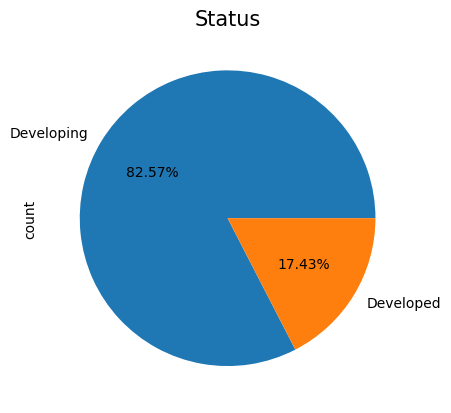

In [ ]:
df['Status'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title('Status',fontsize=15)
plt.show()

<ipython-input-33-7c3a9f8f390d>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numdata[col])


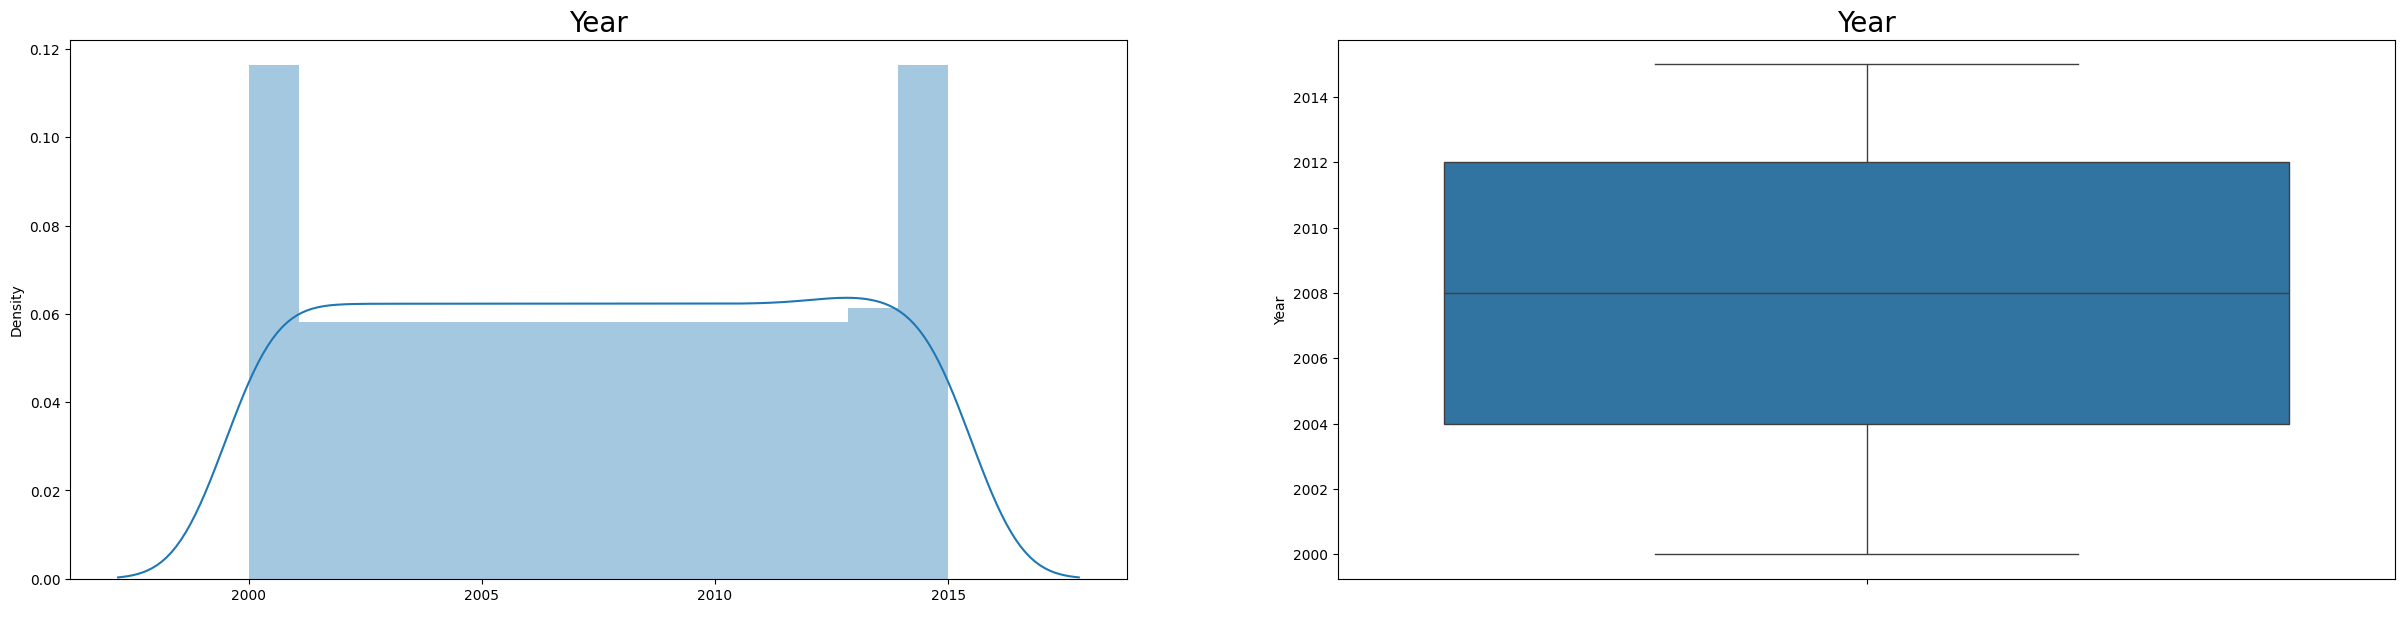

<ipython-input-33-7c3a9f8f390d>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numdata[col])


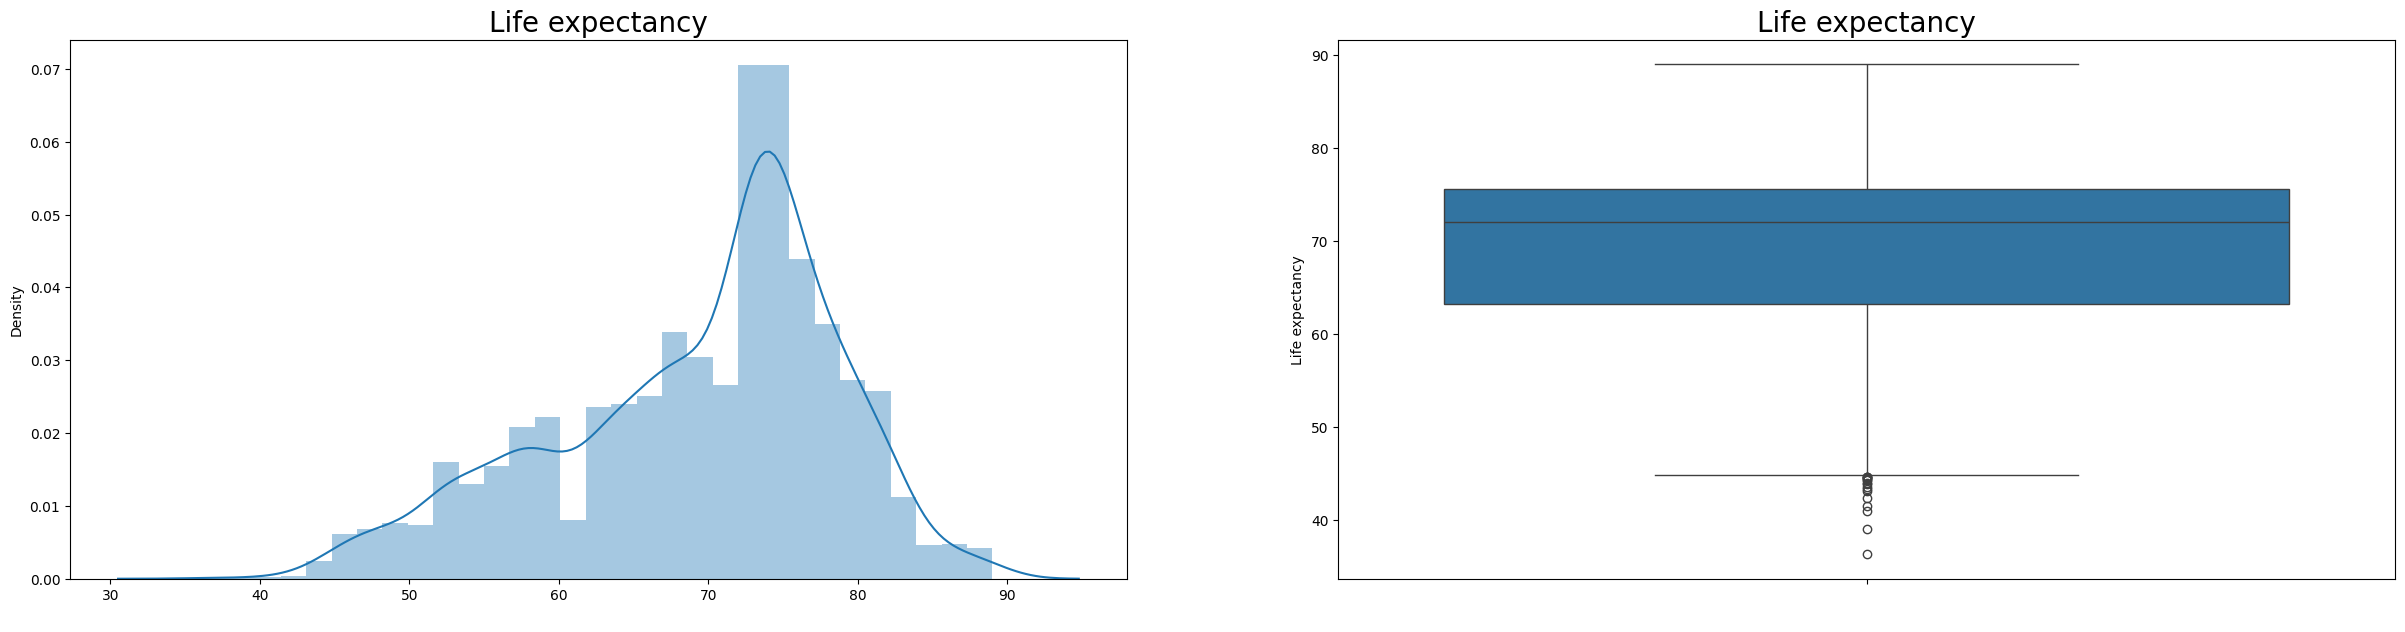

<ipython-input-33-7c3a9f8f390d>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numdata[col])


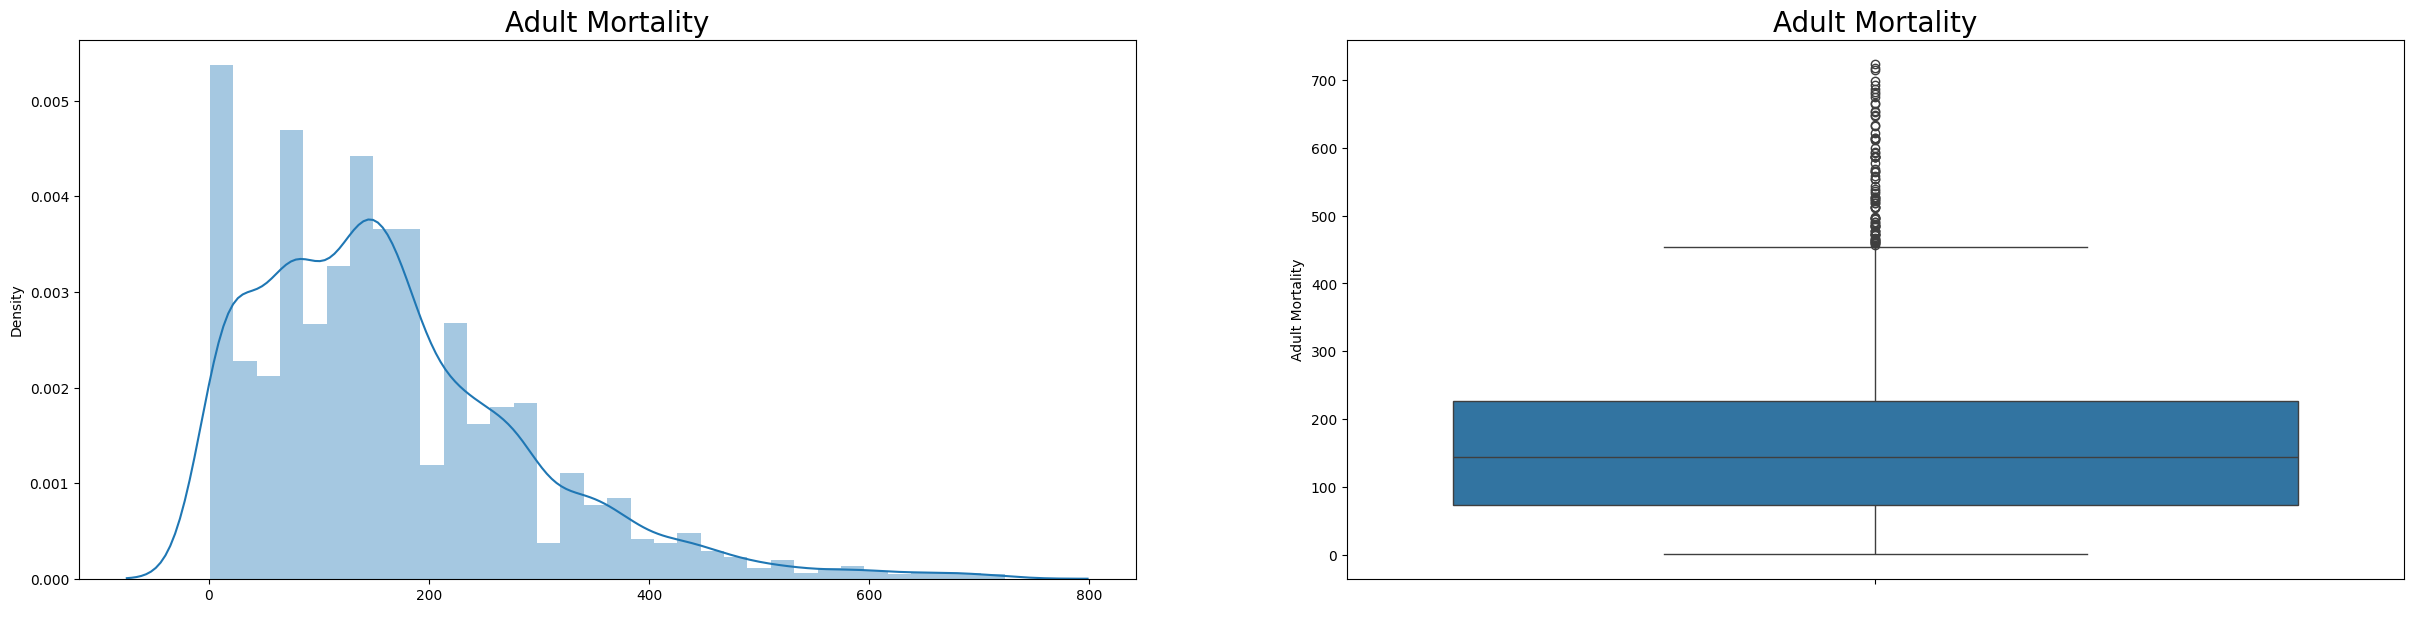

<ipython-input-33-7c3a9f8f390d>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numdata[col])


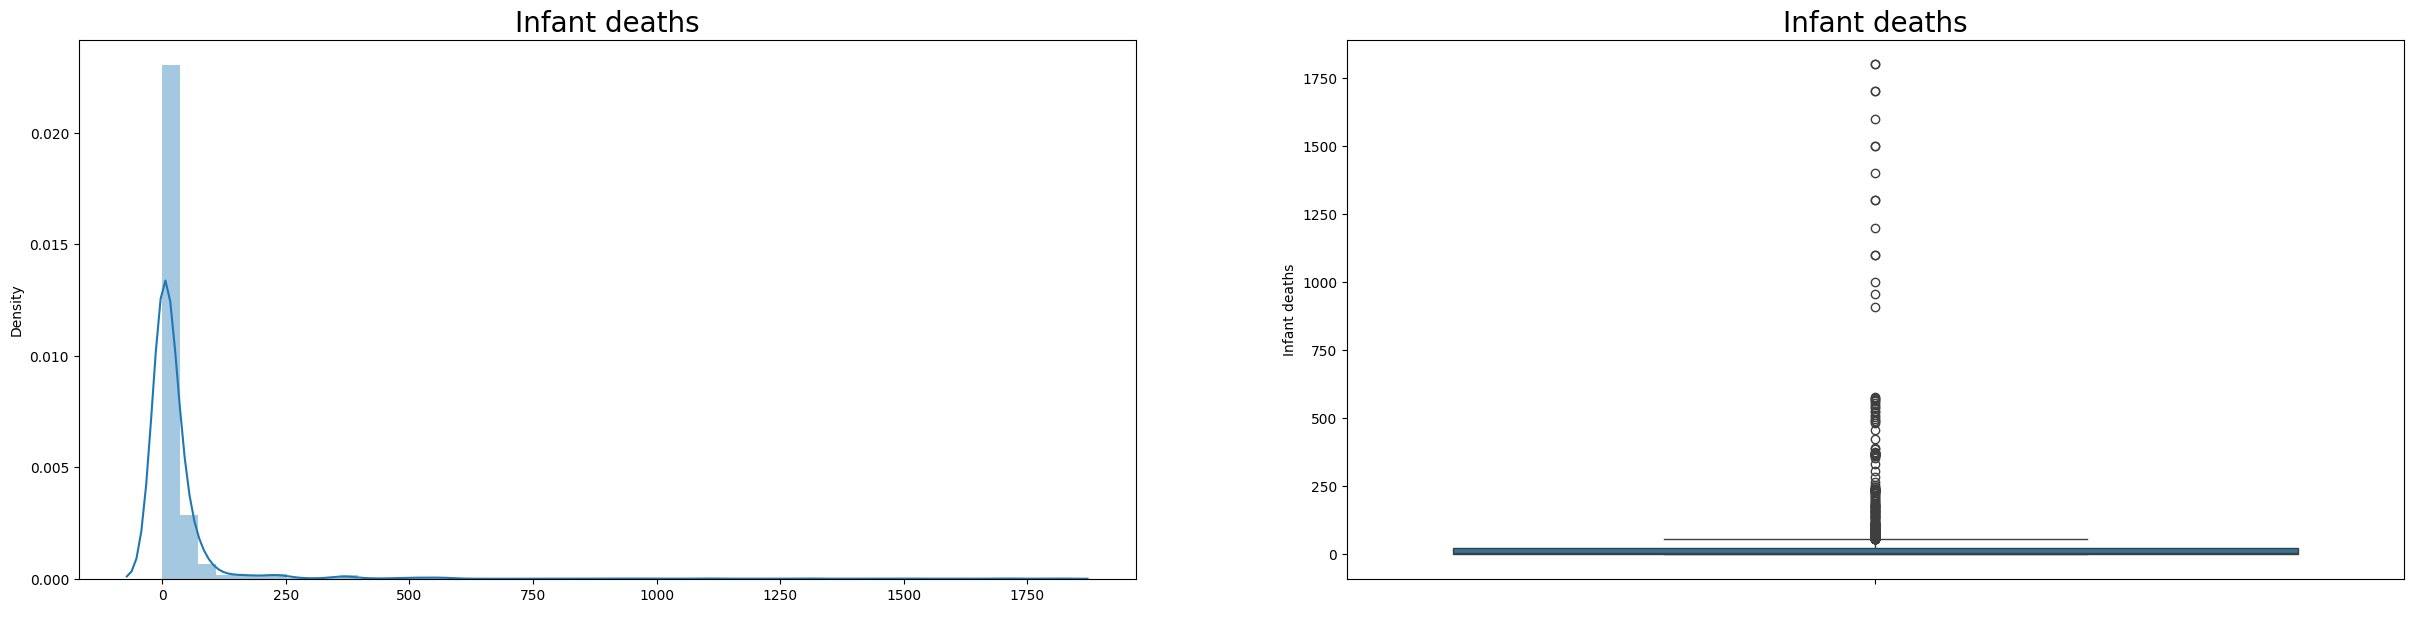

<ipython-input-33-7c3a9f8f390d>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numdata[col])


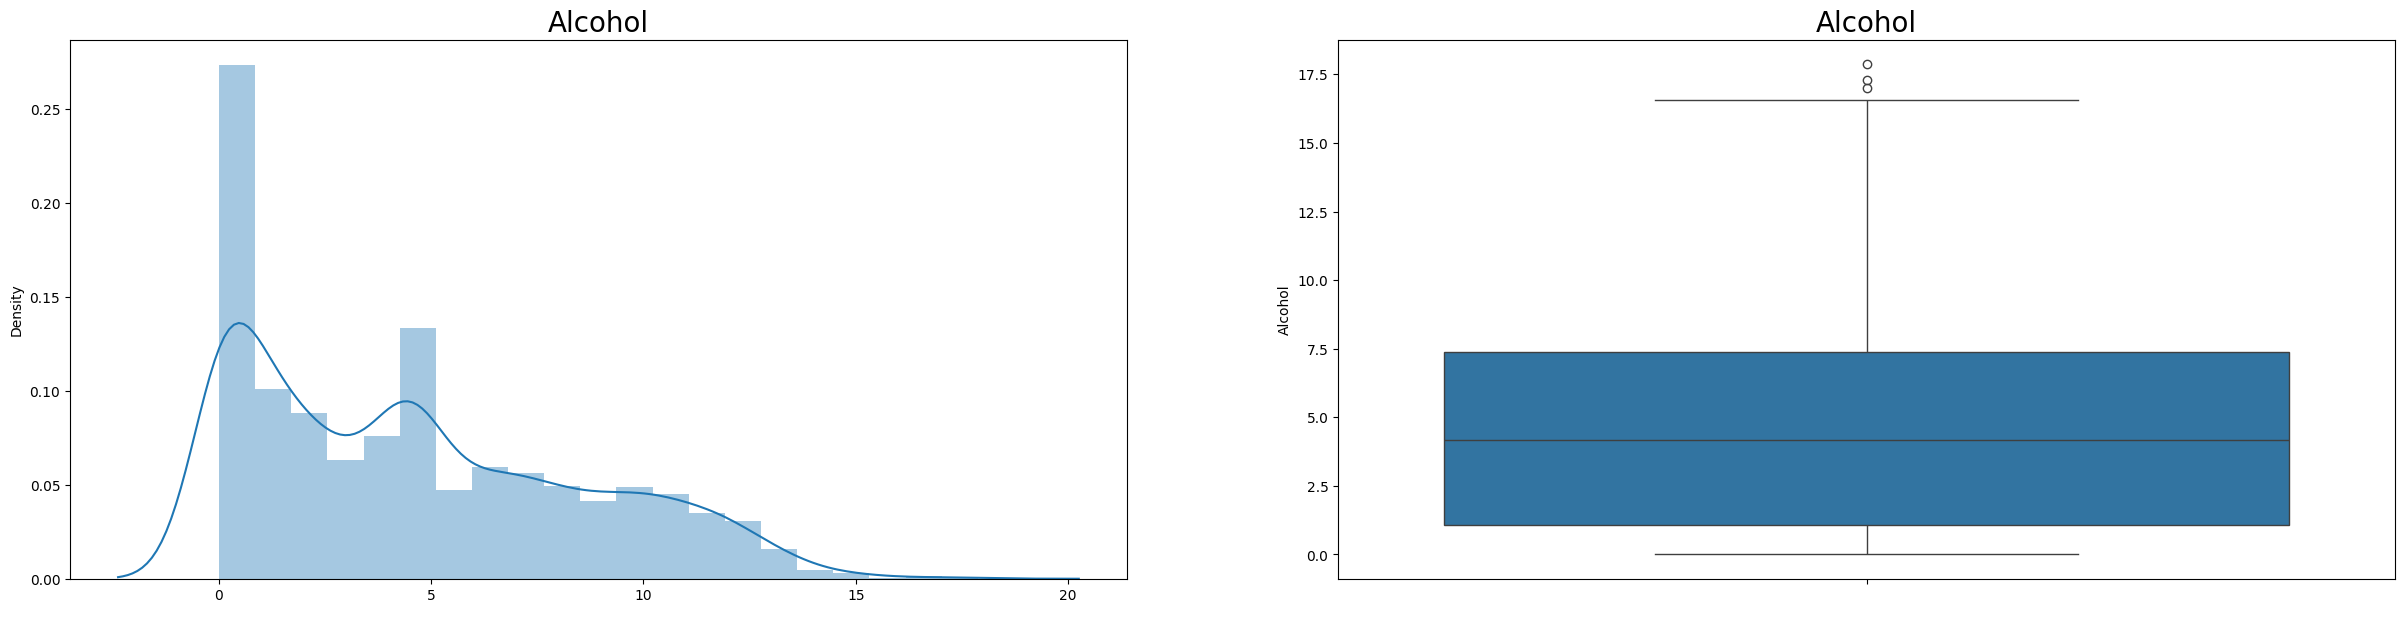

<ipython-input-33-7c3a9f8f390d>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numdata[col])


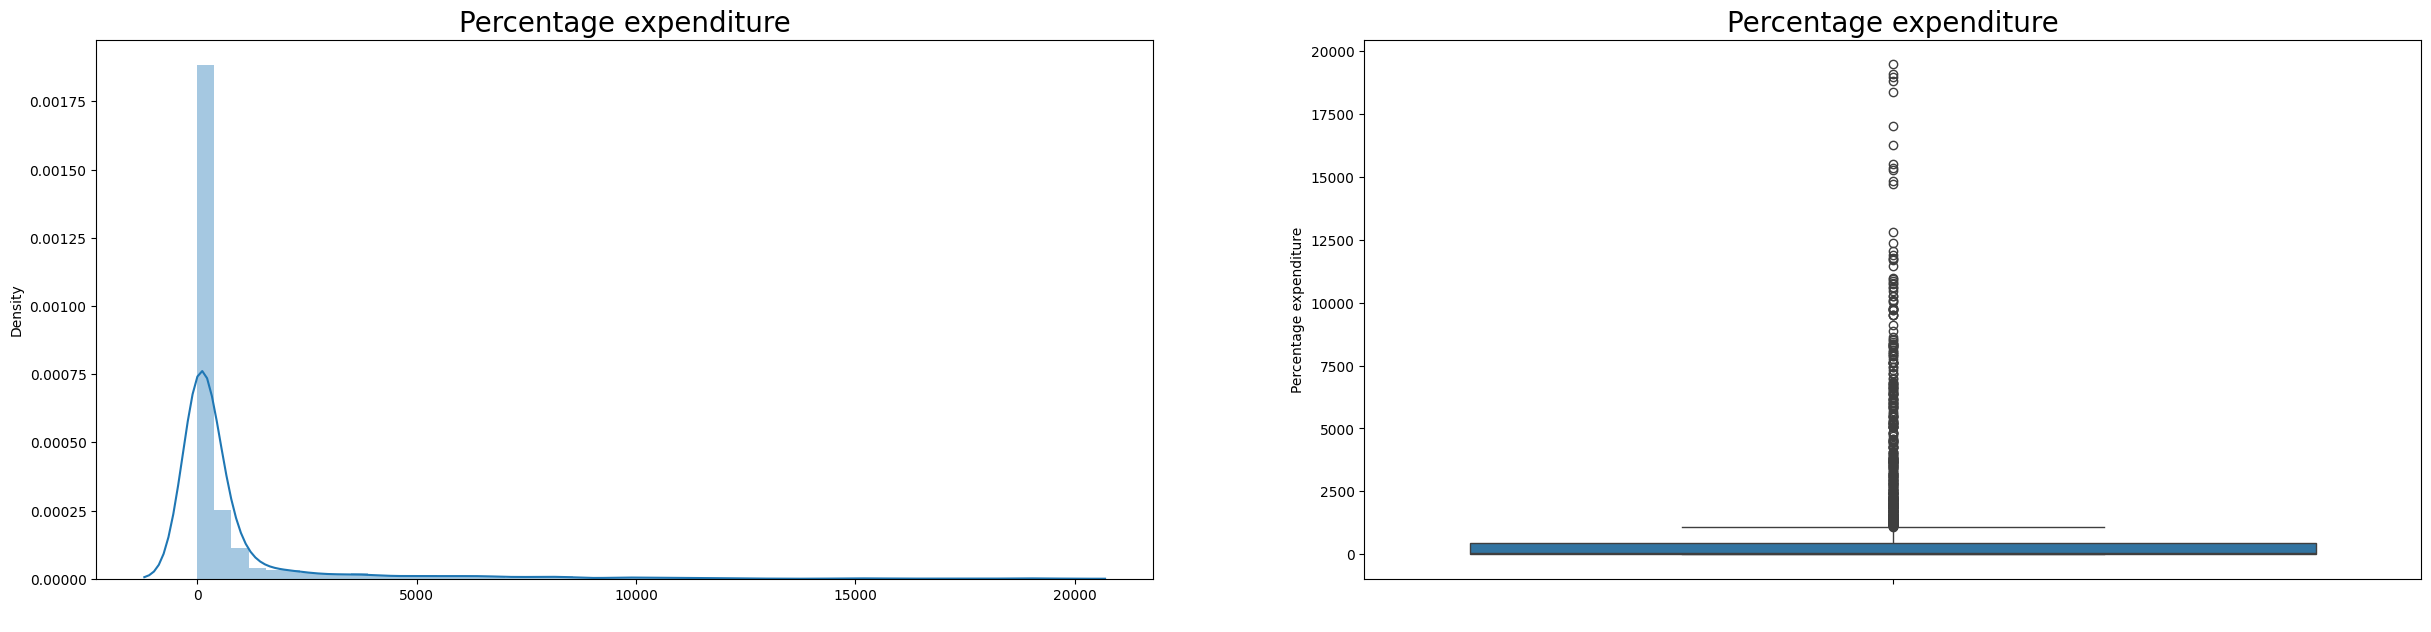

<ipython-input-33-7c3a9f8f390d>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numdata[col])


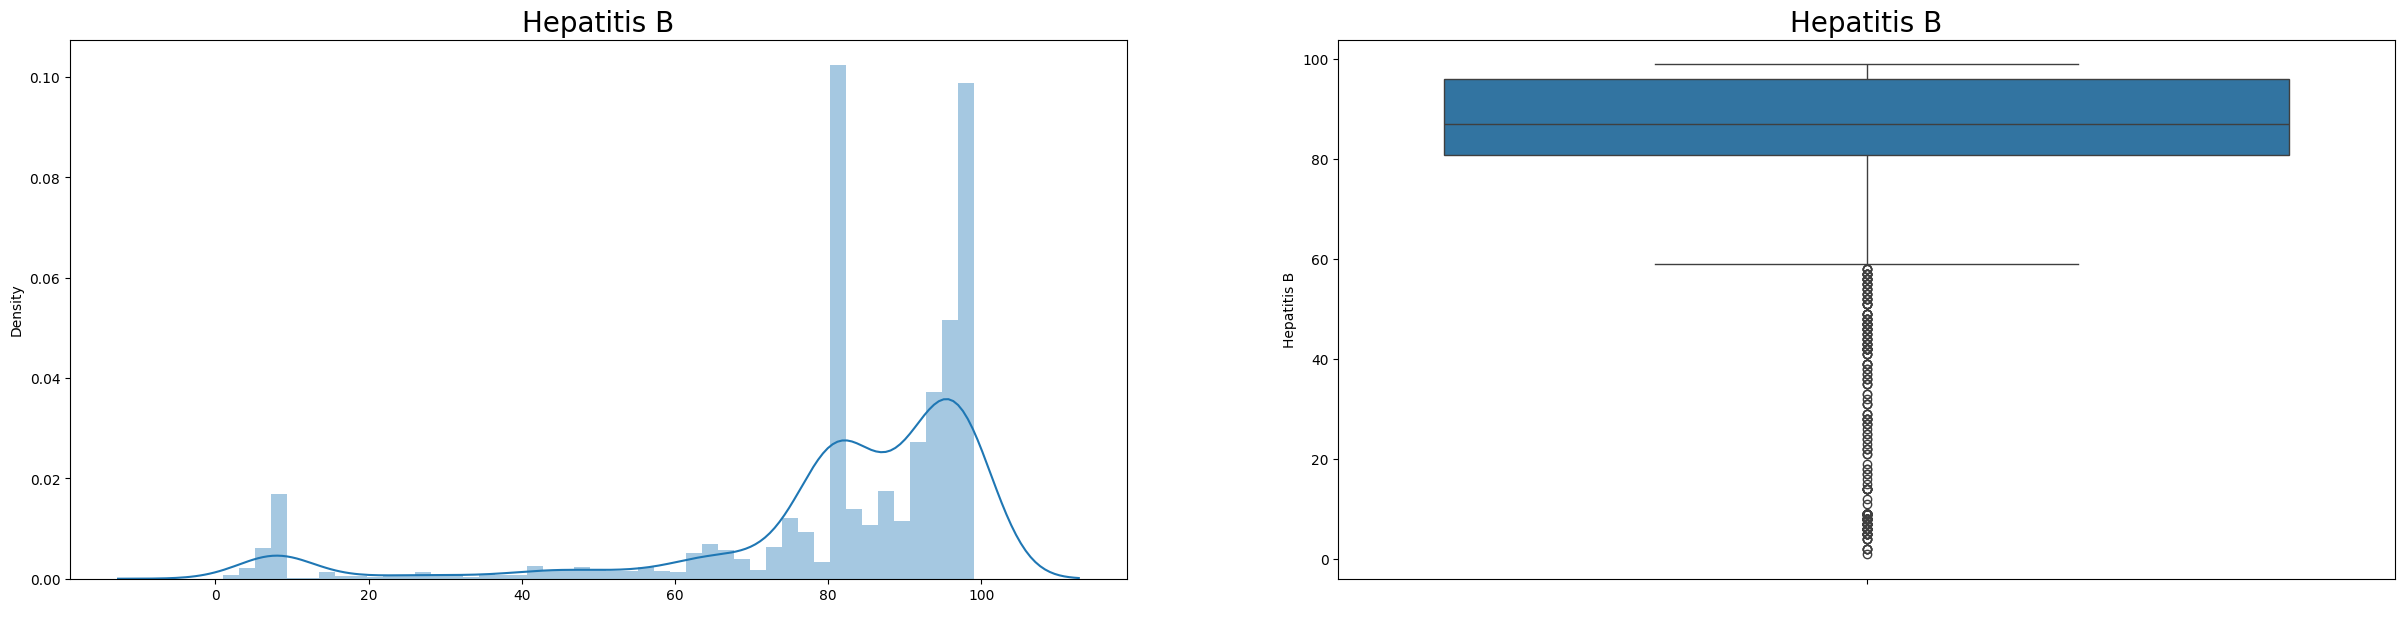

<ipython-input-33-7c3a9f8f390d>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numdata[col])


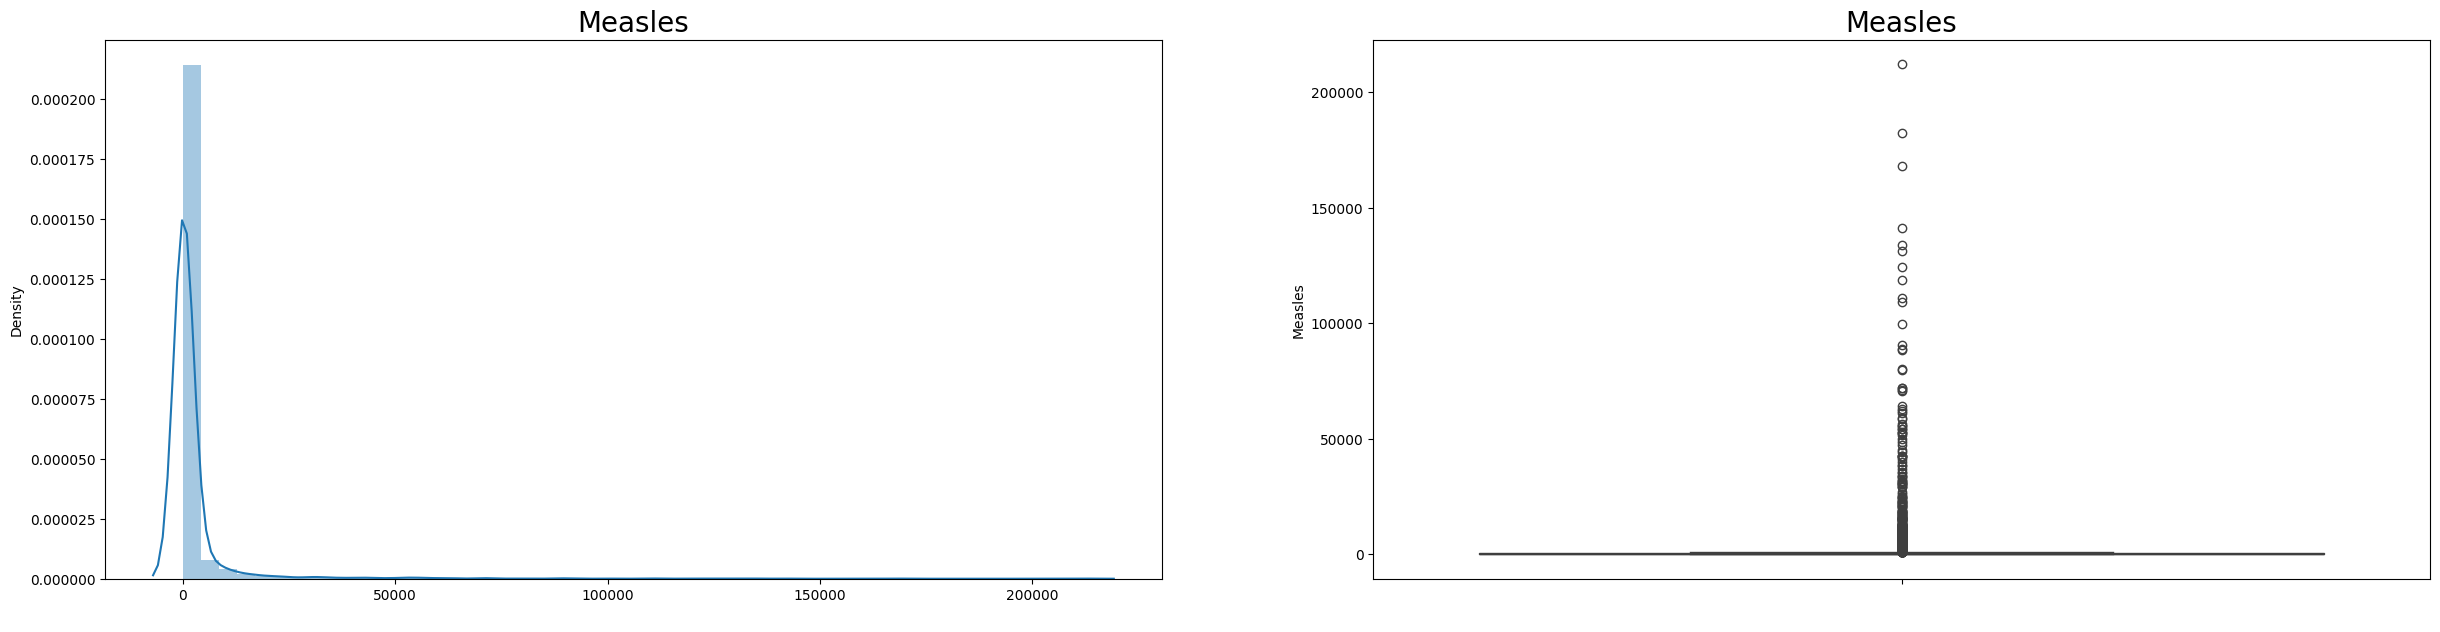

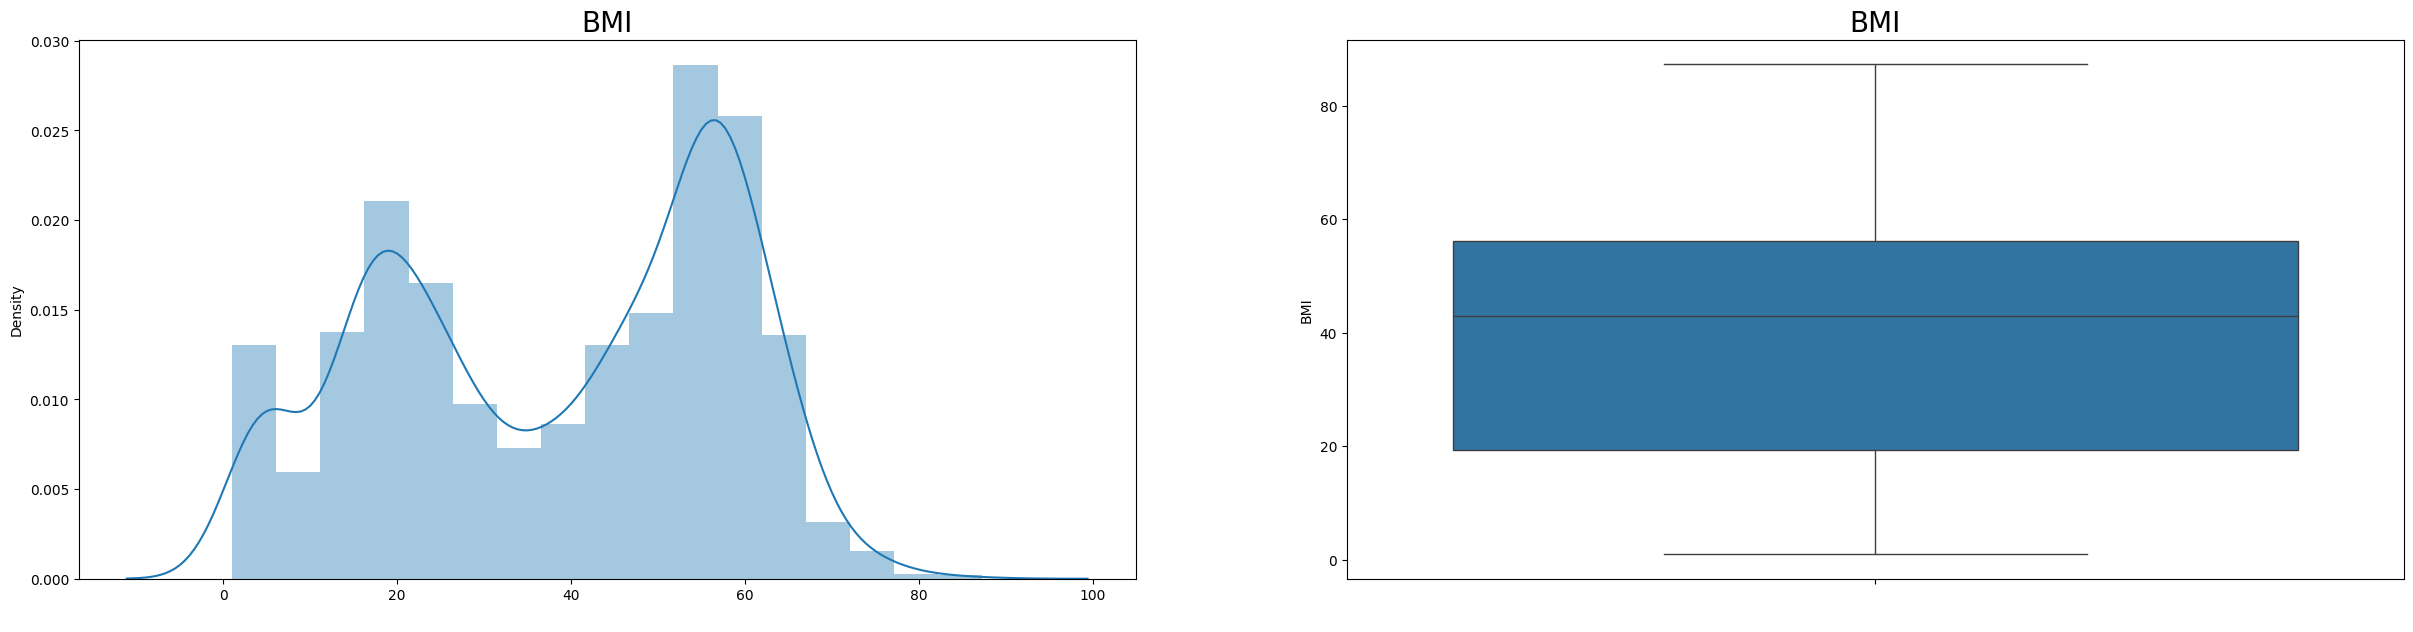

<ipython-input-33-7c3a9f8f390d>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numdata[col])


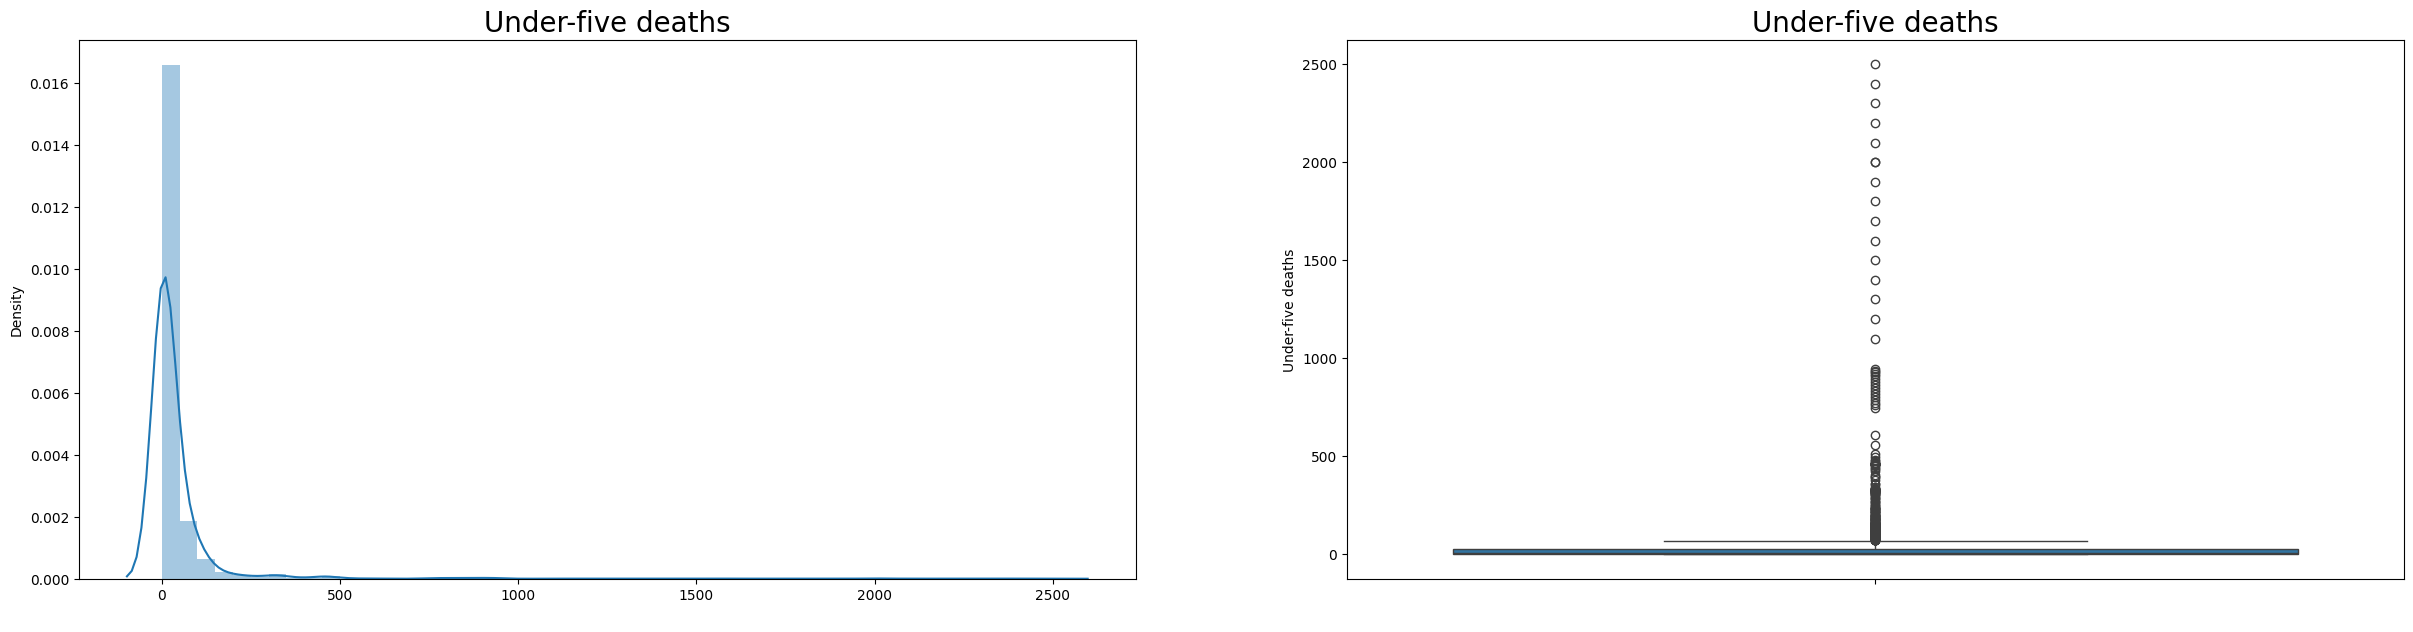

<ipython-input-33-7c3a9f8f390d>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numdata[col])


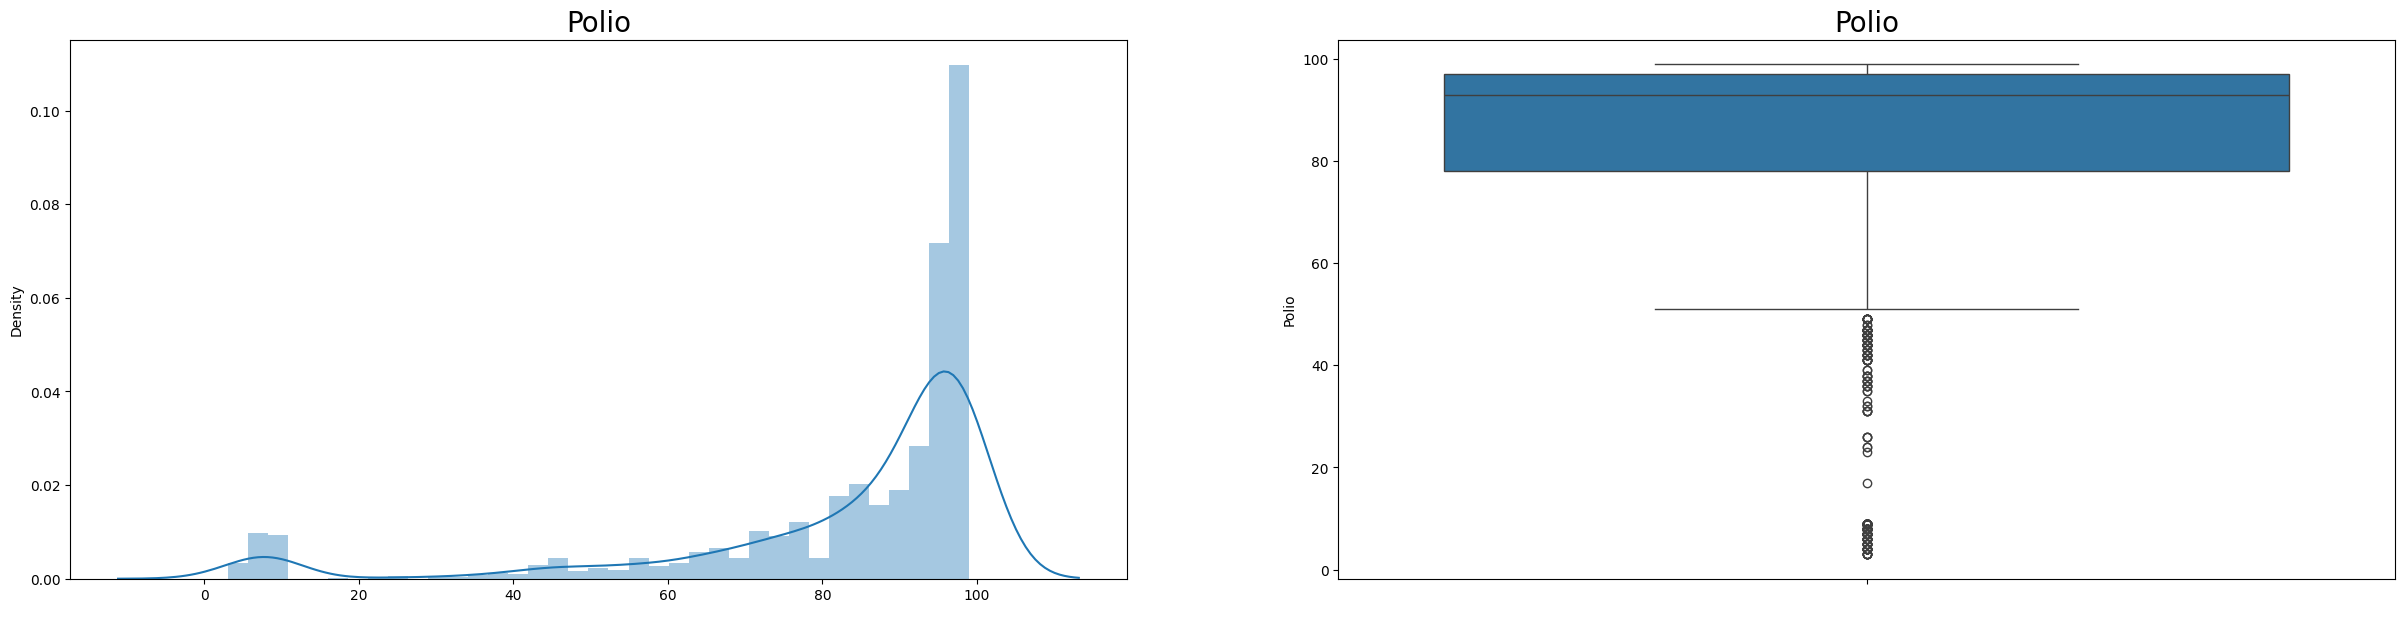

<ipython-input-33-7c3a9f8f390d>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numdata[col])


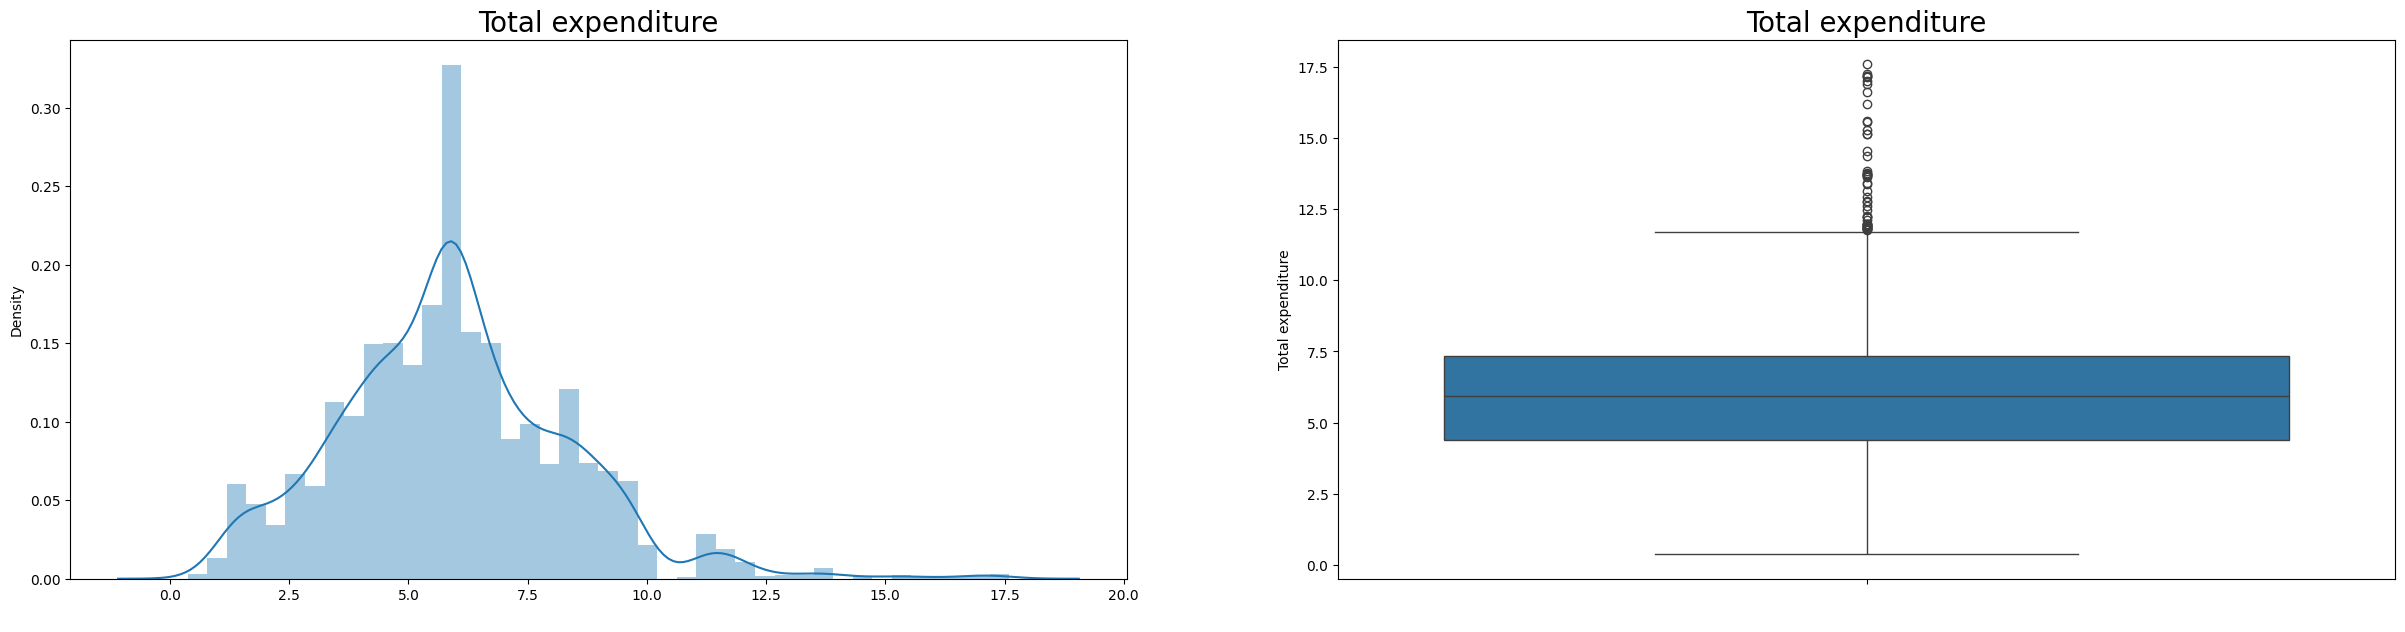

<ipython-input-33-7c3a9f8f390d>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numdata[col])


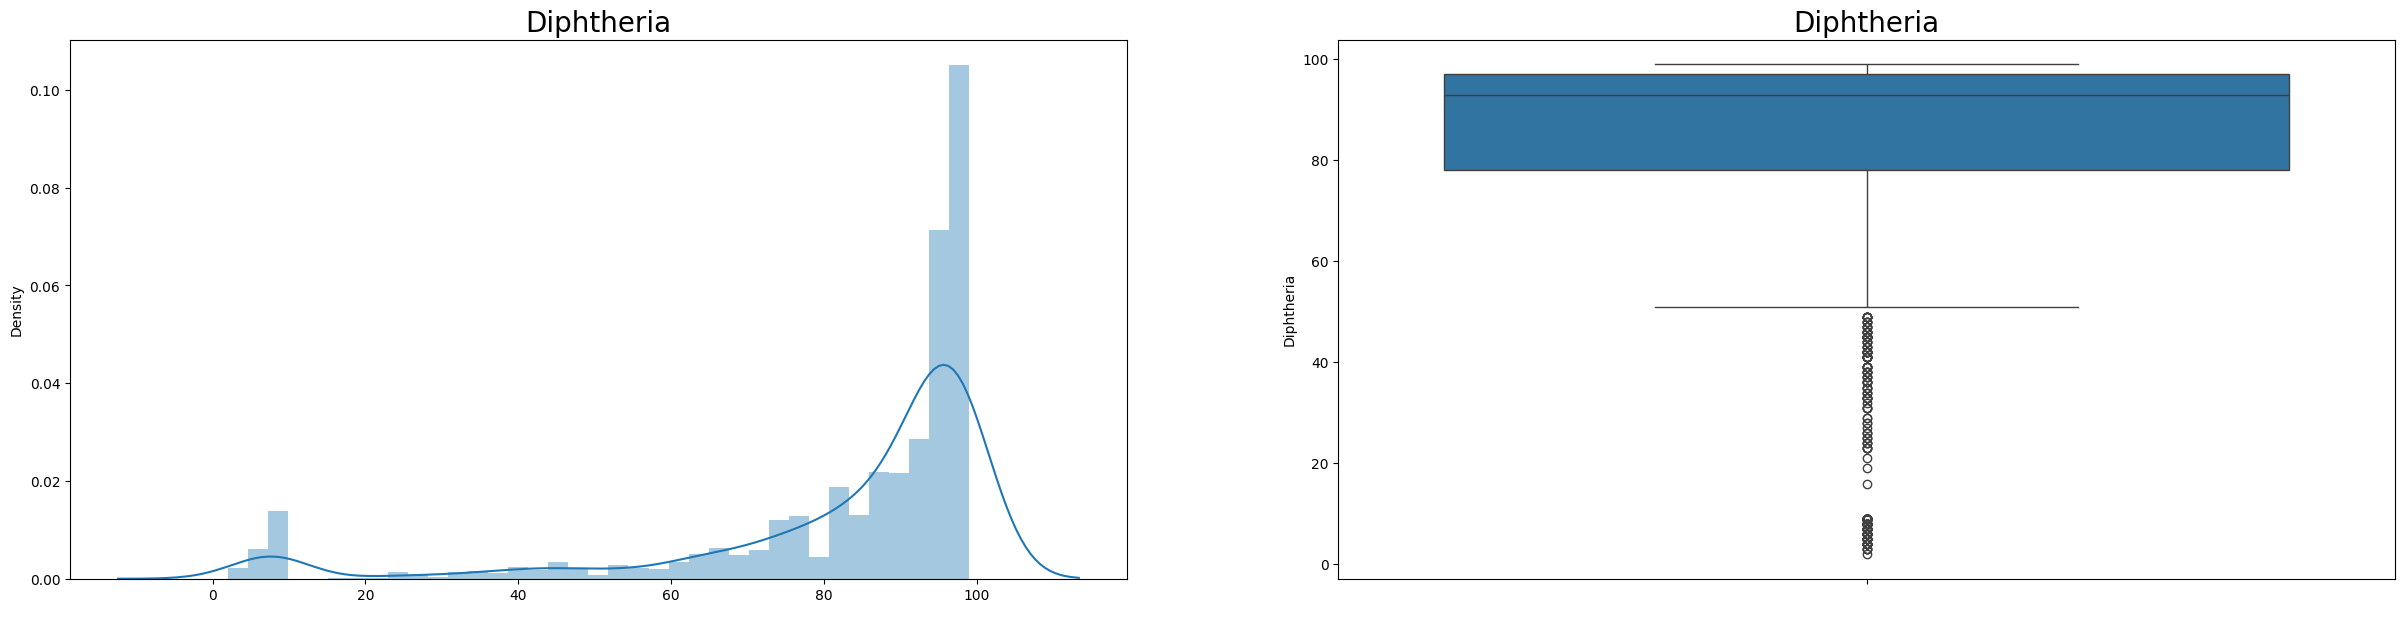

<ipython-input-33-7c3a9f8f390d>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numdata[col])


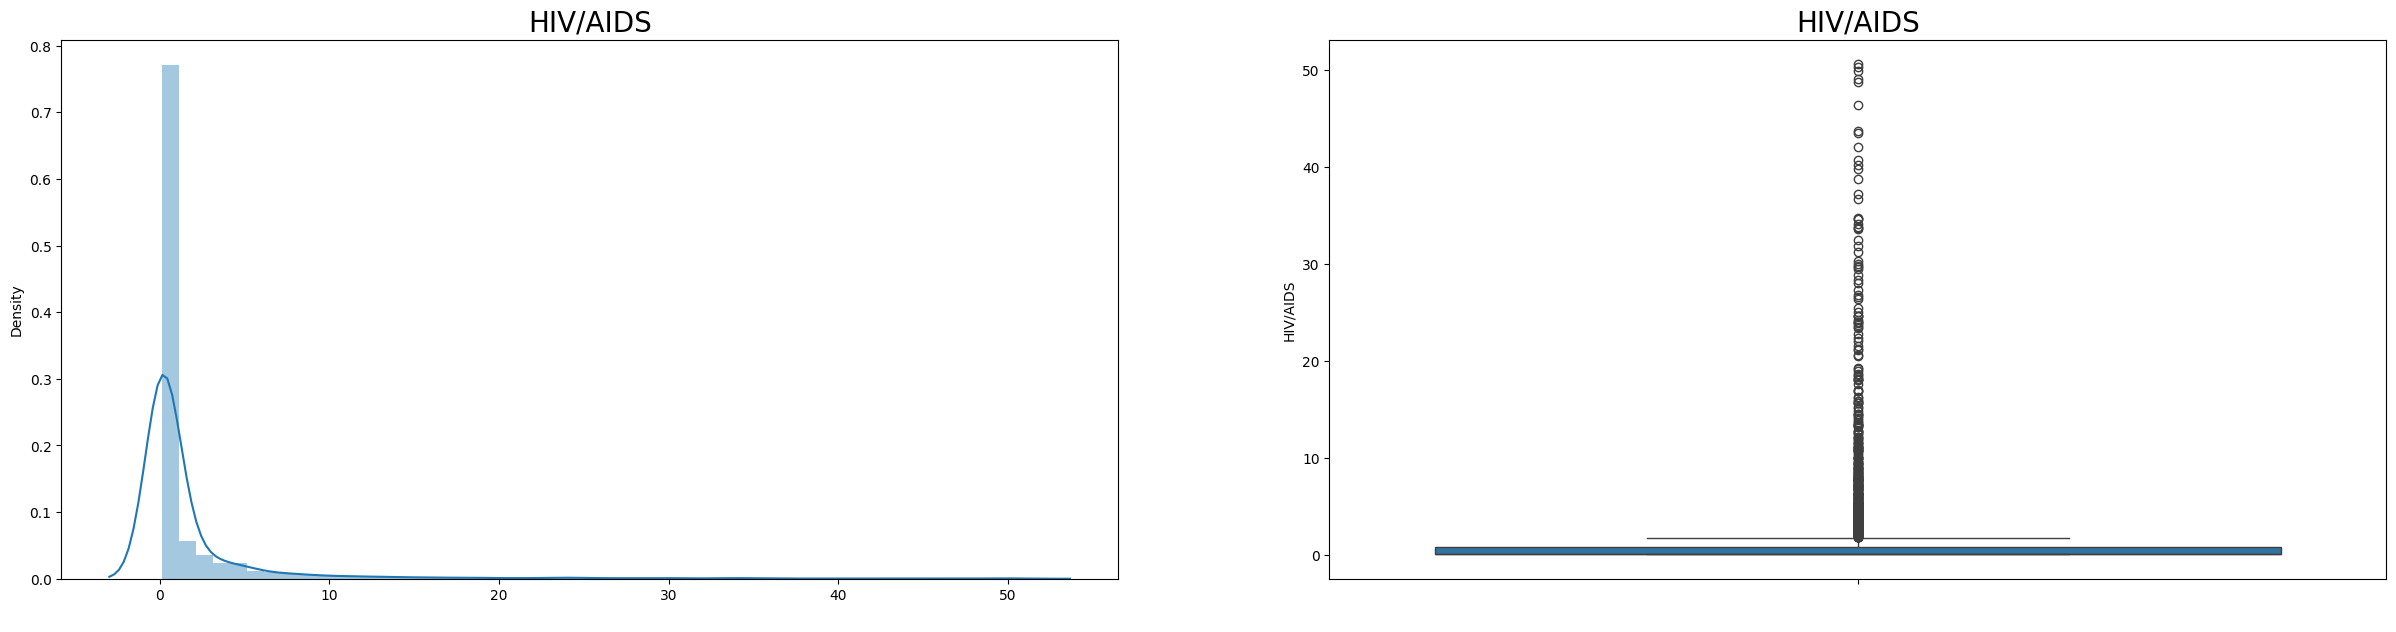

<ipython-input-33-7c3a9f8f390d>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numdata[col])


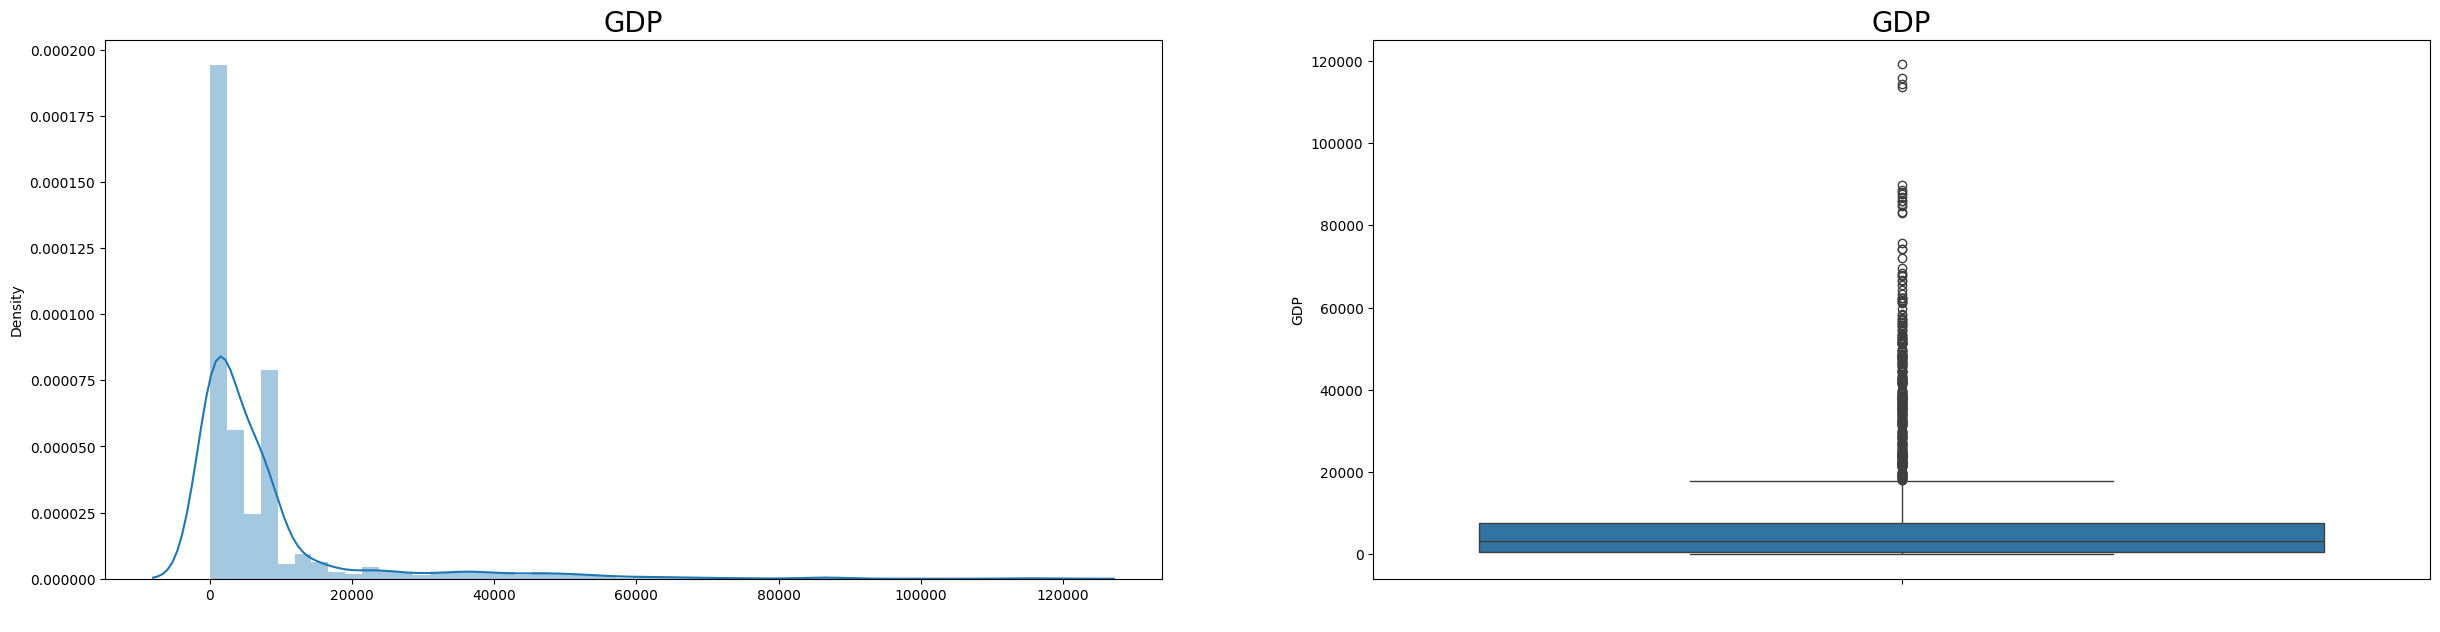

<ipython-input-33-7c3a9f8f390d>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numdata[col])


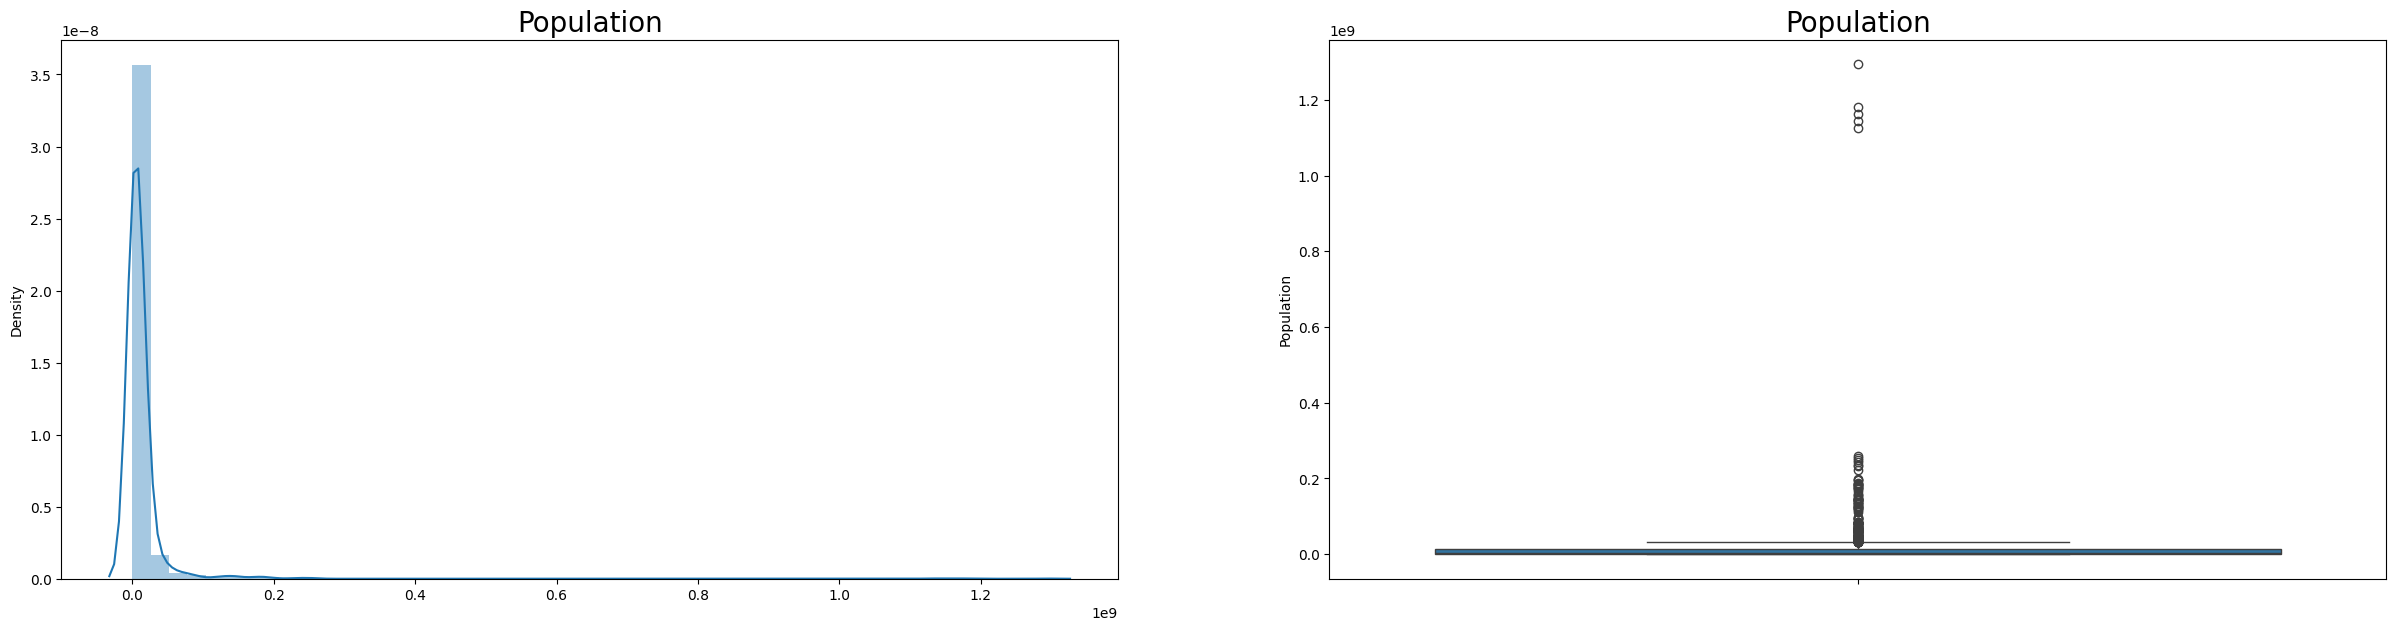

<ipython-input-33-7c3a9f8f390d>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numdata[col])


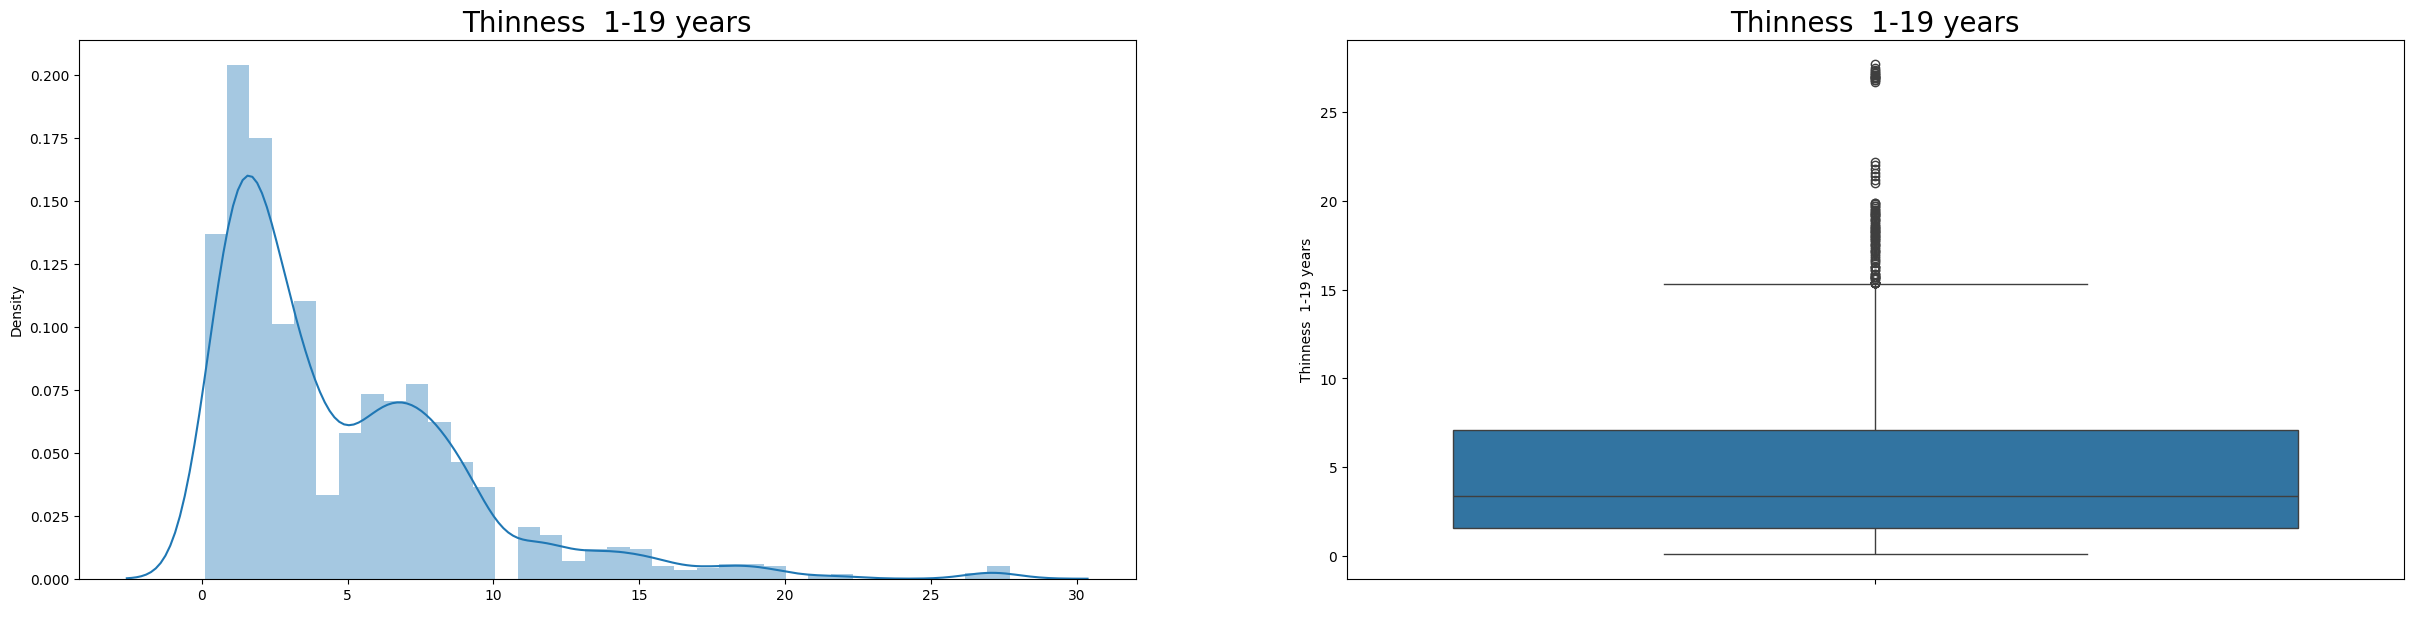

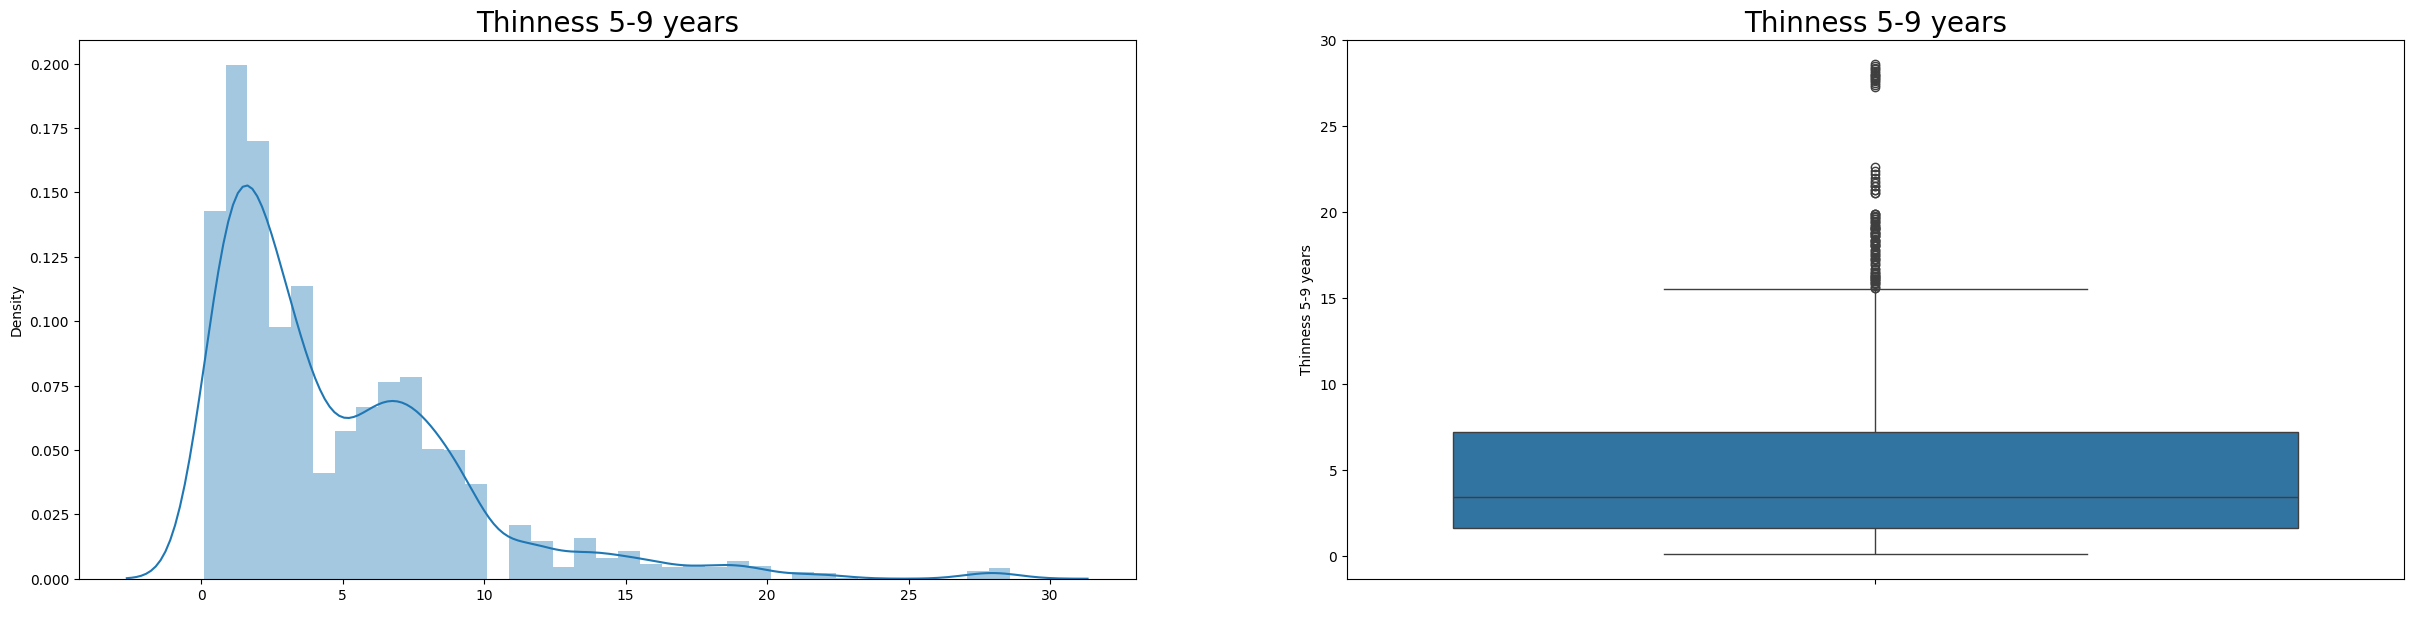

<ipython-input-33-7c3a9f8f390d>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numdata[col])


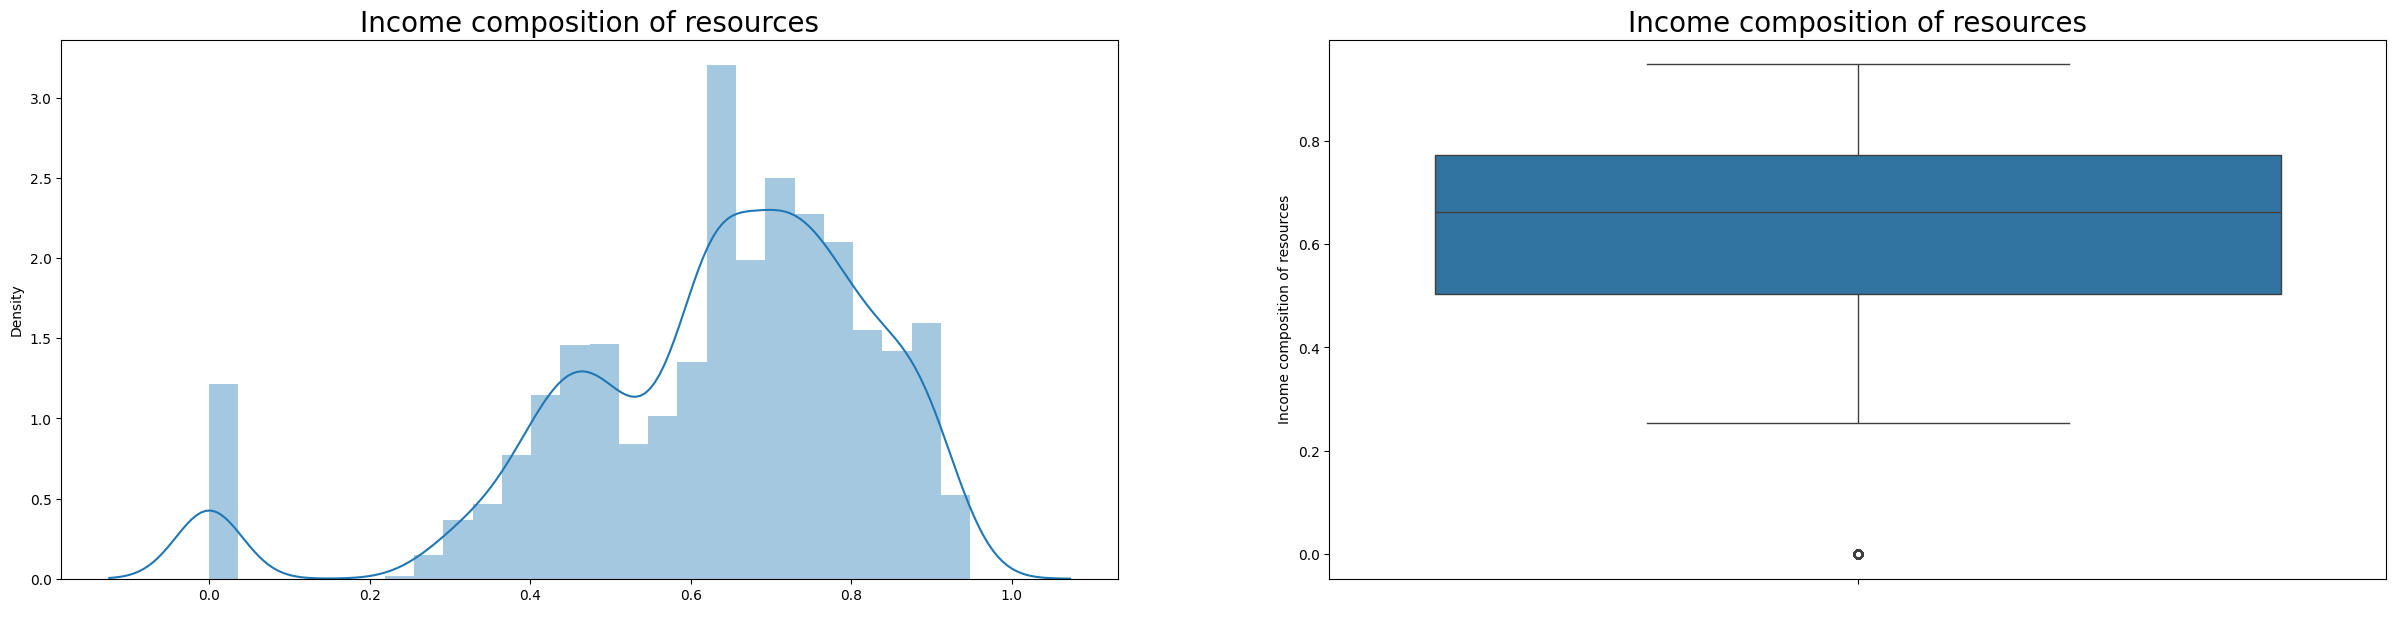

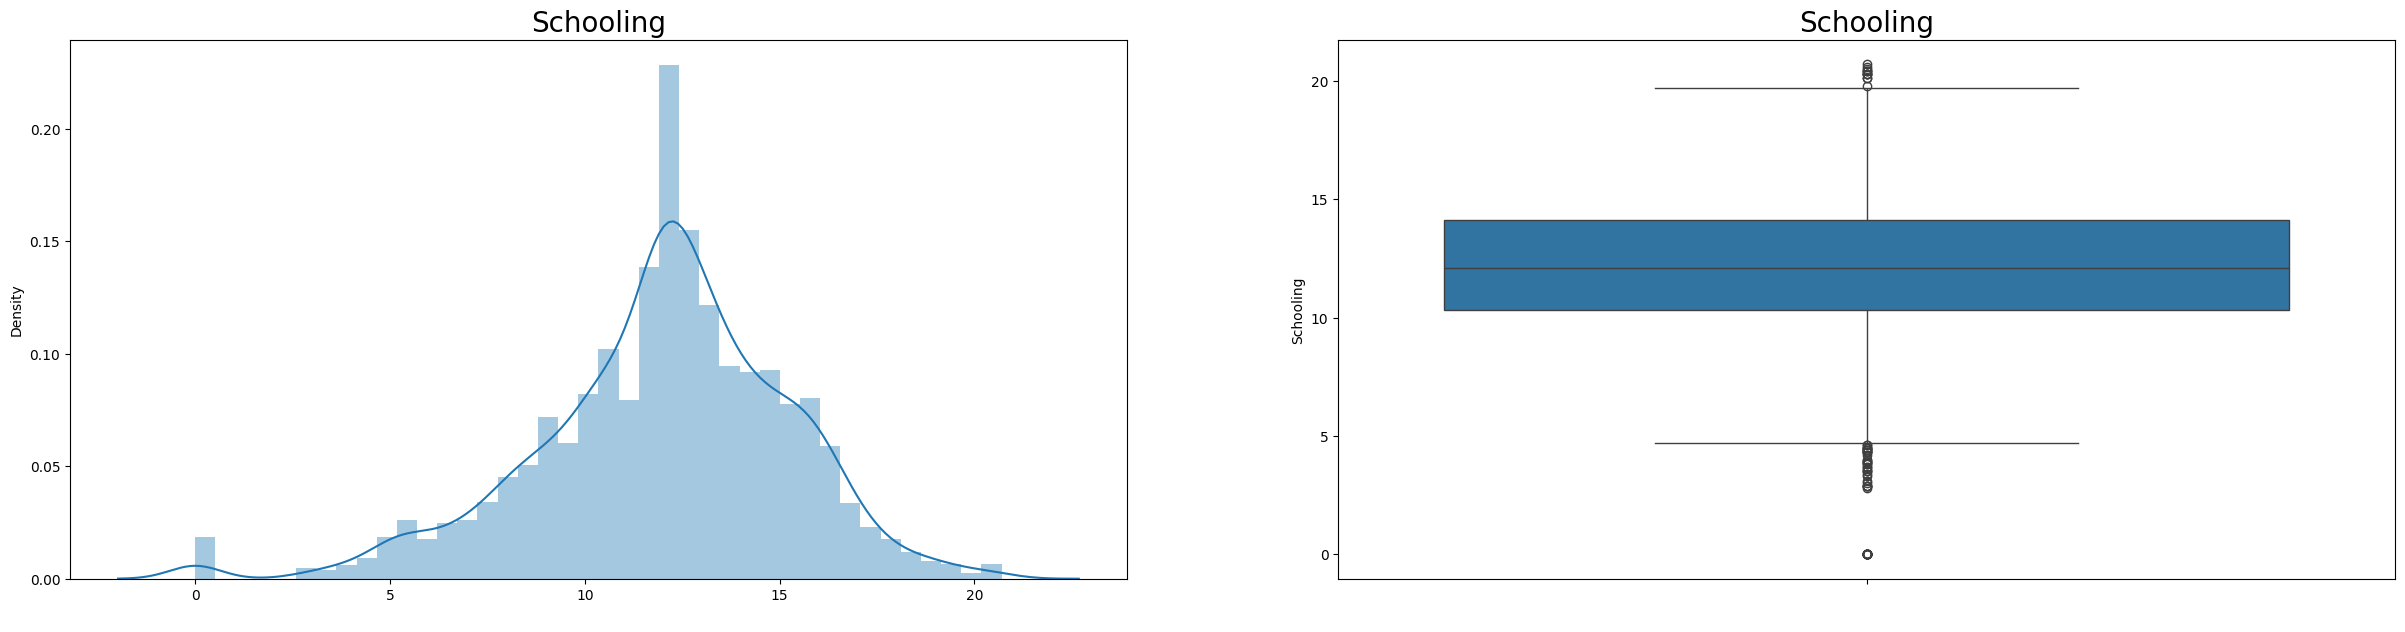

In [ ]:
data1_columns = numdata.columns
data1_columns
# Gives us the distribution and boxplot for all the columns.
for index,col in enumerate(data1_columns):
    plt.figure(figsize = (30,7))
    plt.subplot(1,2,1)
    sns.distplot(numdata[col])
    plt.xlabel(" ")
    plt.title(col, size = 20)

    plt.subplot(1,2,2)
    sns.boxplot(y = numdata[col])
    plt.title(col, size = 20)
    plt.show()

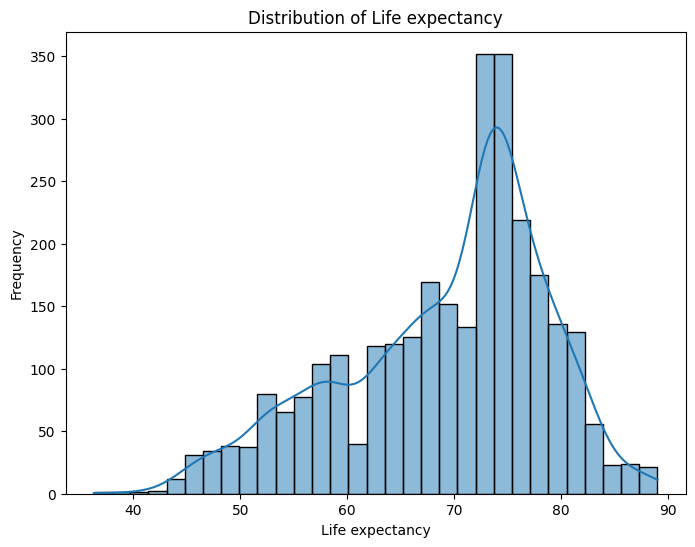

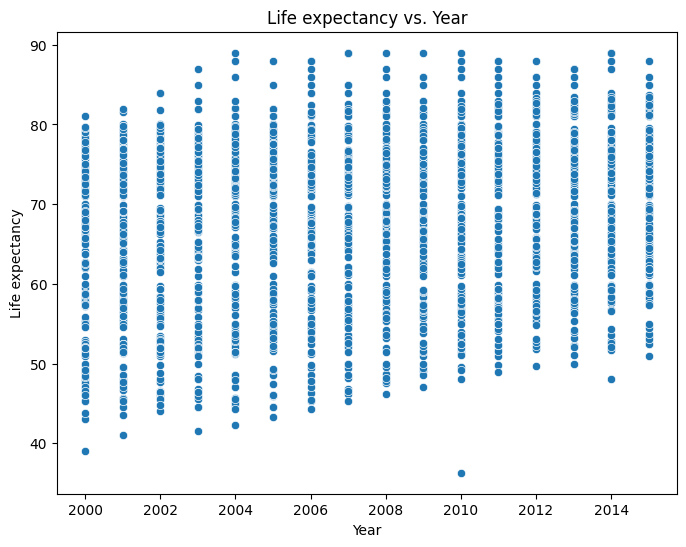

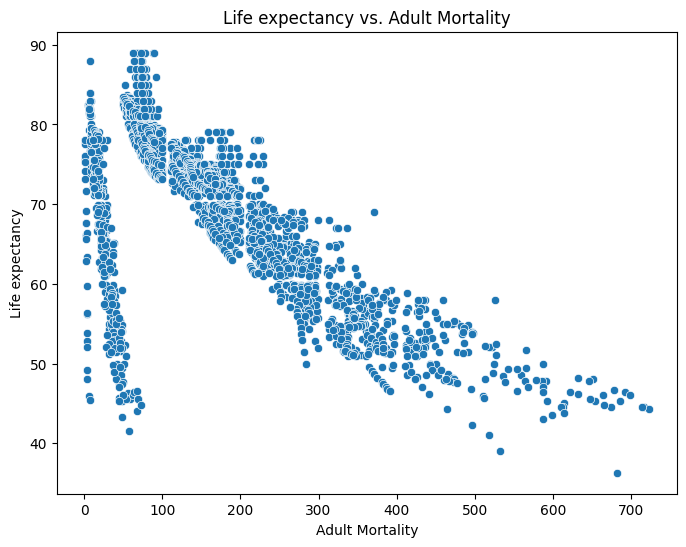

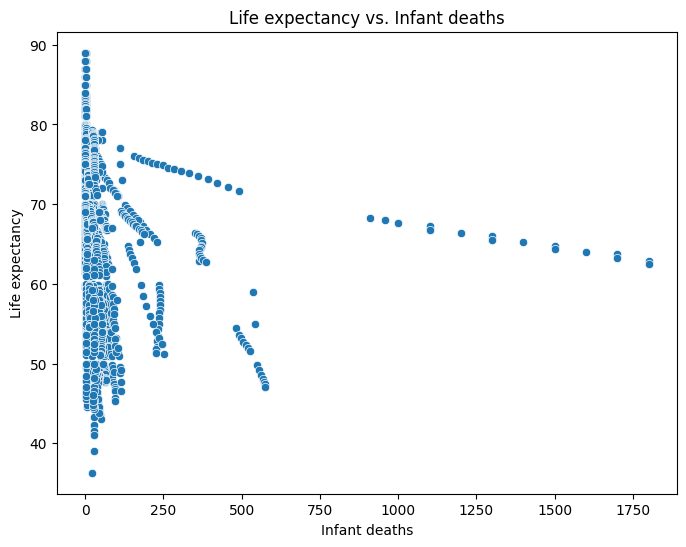

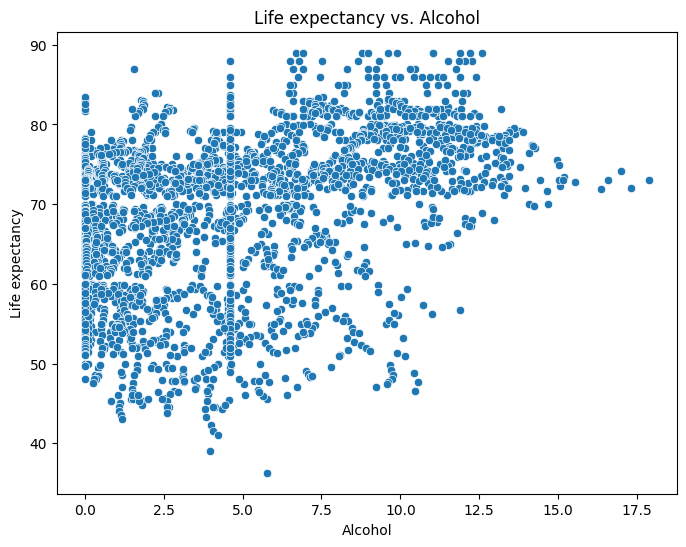

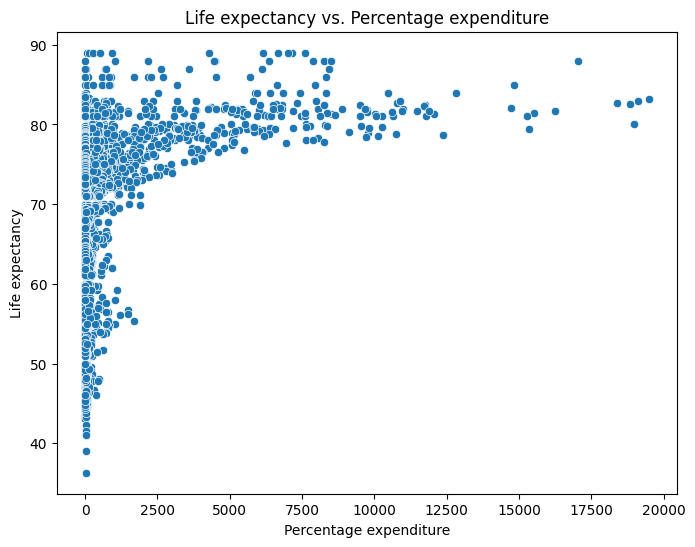

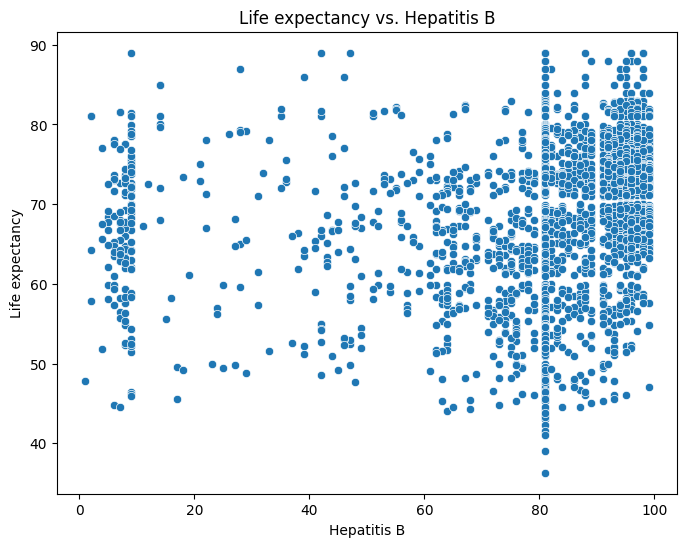

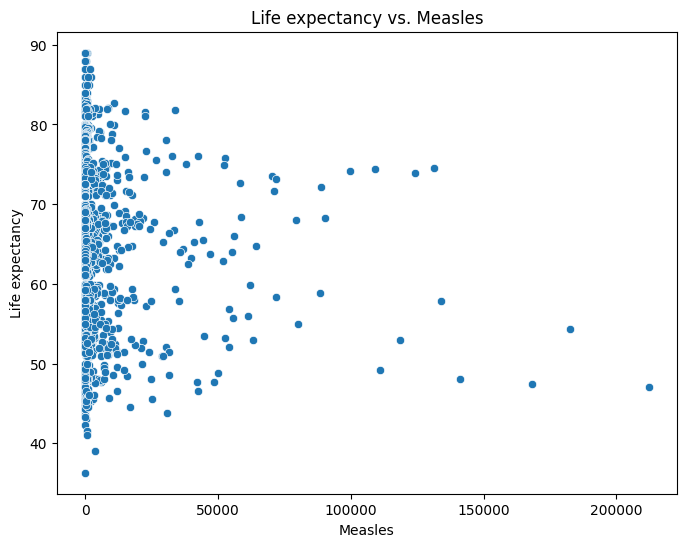

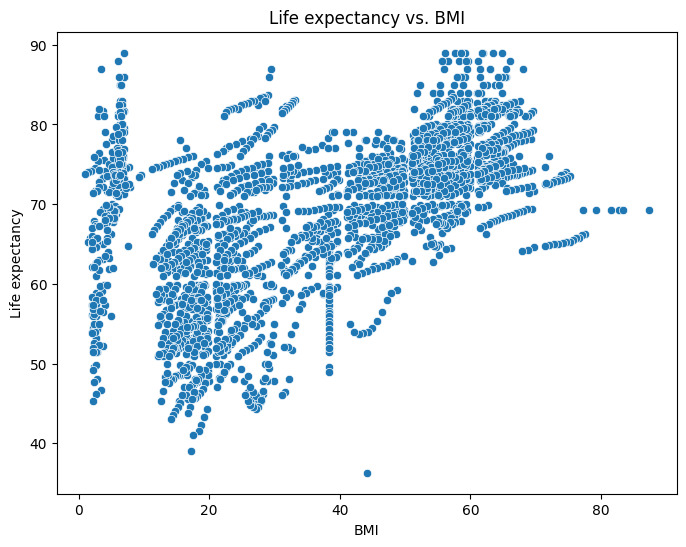

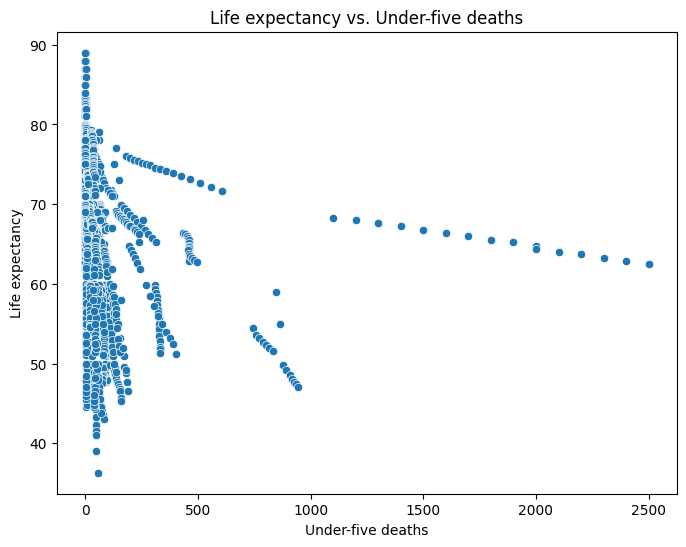

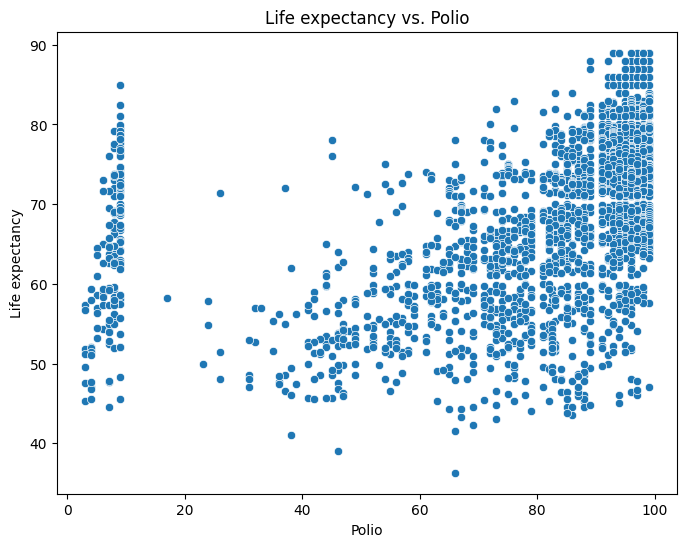

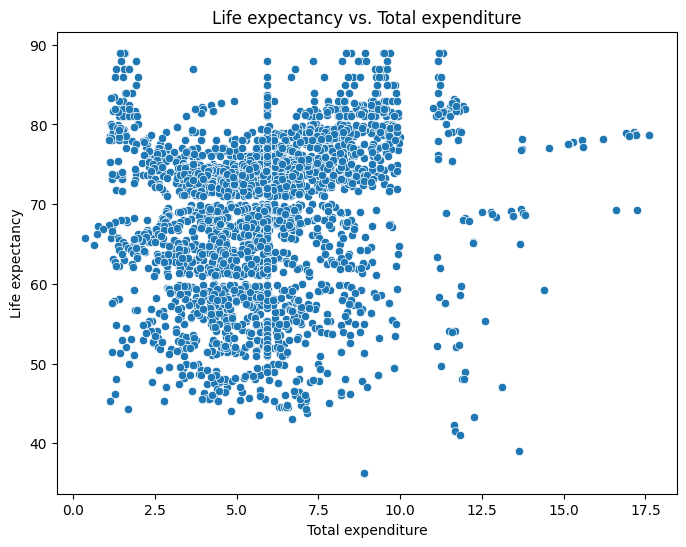

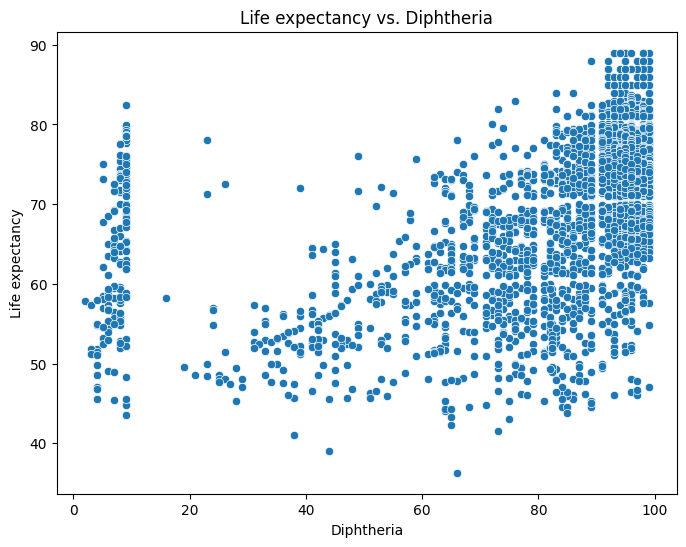

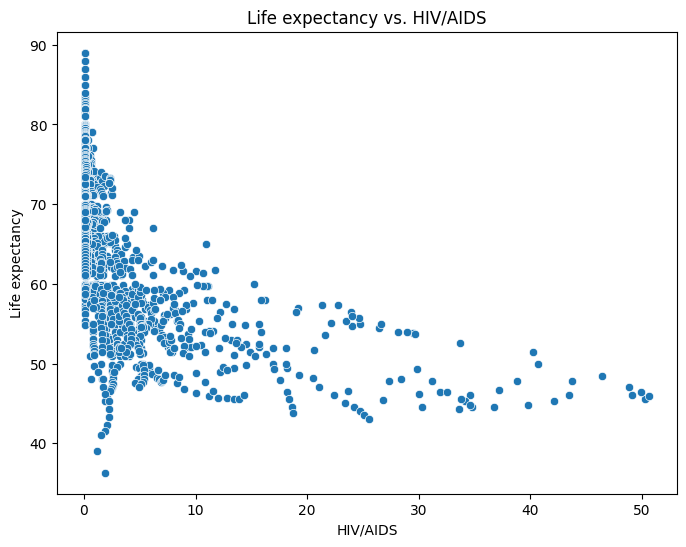

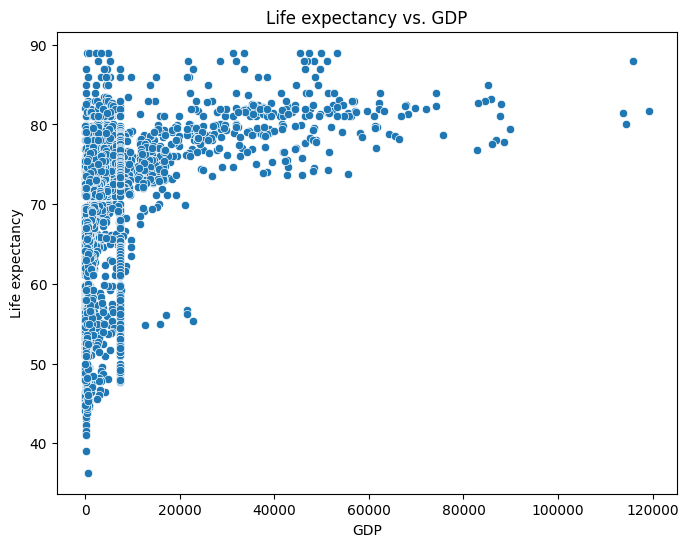

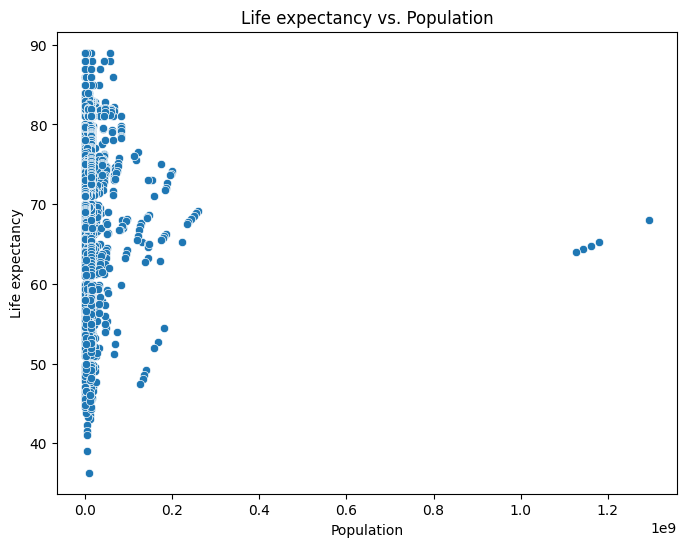

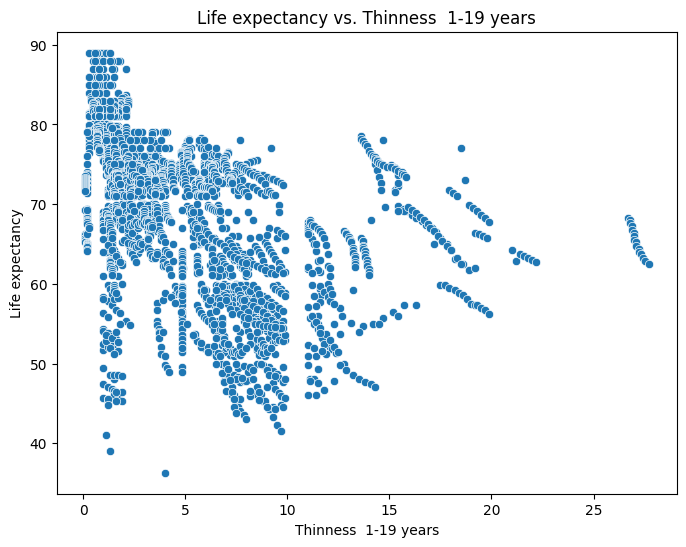

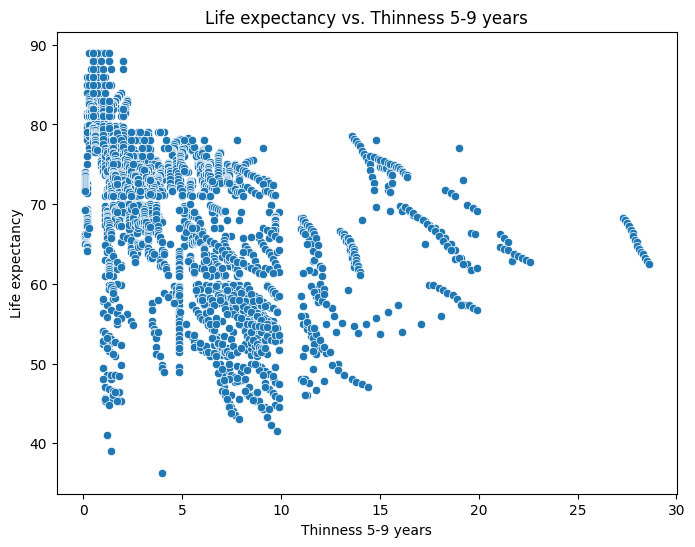

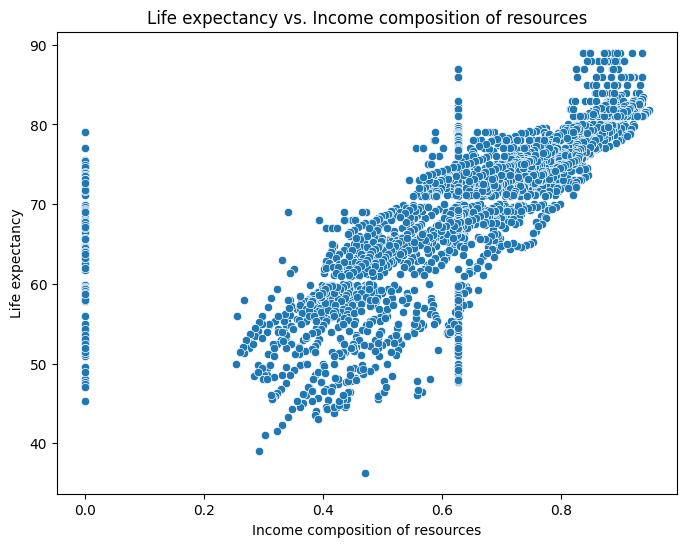

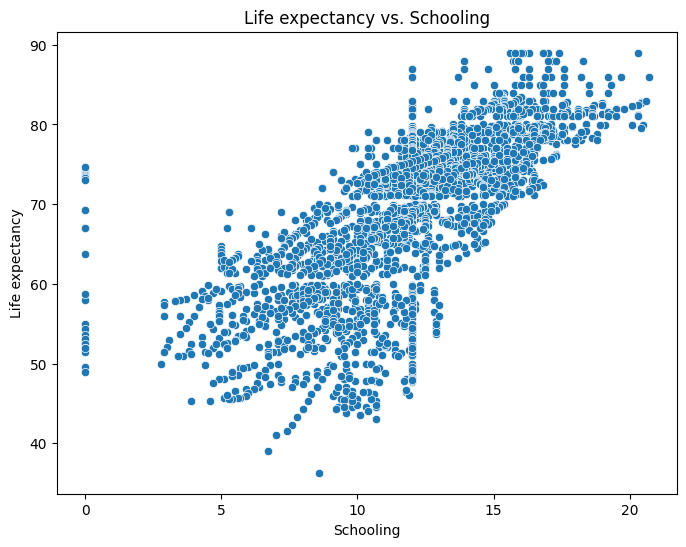

In [ ]:
# prompt: code to visualize data

# Assuming 'df' is your DataFrame (as defined in the provided code)

# Visualize the distribution of Life Expectancy
plt.figure(figsize=(8, 6))
sns.histplot(df['Life expectancy'], kde=True)
plt.title('Distribution of Life expectancy')
plt.xlabel('Life expectancy')
plt.ylabel('Frequency')
plt.show()

# Visualize the relationship between Life expectancy and other numerical features
for col in numerical_features:
    if col != 'Life expectancy':  # Exclude Life expectancy itself
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=col, y='Life expectancy', data=df)
        plt.title(f'Life expectancy vs. {col}')
        plt.xlabel(col)
        plt.ylabel('Life expectancy')
        plt.show()





In [ ]:
df1=df.copy()

In [ ]:
# convert categorical to numerical

# Convert categorical columns to numerical using label encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for column in cat_data.columns:
    df1[column] = label_encoder.fit_transform(df1[column])

df1.sample(5)

Country  Year  Status  Life expectancy  Adult Mortality  Infant deaths  \
564        34  2011       1            75.20            91.00            215   
2070      135  2000       0            76.60            11.00              1   
1704      109  2010       1            68.70           171.00              0   
1767      114  2012       1            54.80            48.00             64   
2891      190  2014       1            65.40           228.00             37   

      Alcohol  Percentage expenditure  Hepatitis B  Measles  ...  Polio  \
564      5.63                   91.27        99.00     9943  ...  99.00   
2070    11.89                  167.33        58.00       45  ...  96.00   
1704     1.76                    0.00        88.00        0  ...  85.00   
1767     1.19                   49.91        76.00      145  ...  73.00   
2891     0.01                    0.00        73.00      815  ...  67.00   

      Total expenditure  Diphtheria  HIV/AIDS     GDP  Population  \
564                5.30       99.00      0.10 5633.80   134413.00   
2070               9.14       96.00      0.10 1152.40  1289898.00   
1704              13.83       85.00      0.10 7483.16 12753375.12   
1767               5.58       76.00      6.90  566.51  2567666.00   
2891               5.64       73.00      0.10 7483.16 12753375.12   

      Thinness  1-19 years  Thinness 5-9 years  \
564                   4.10                3.50   
2070                  0.80                0.60   
1704                  0.20                0.20   
1767                  3.60                3.50   
2891                 13.70               13.50   

      Income composition of resources  Schooling  
564                              0.70      12.80  
2070                             0.78      15.50  
1704                             0.63      11.50  
1767                             0.40       9.20  
2891                             0.50       9.00  

[5 rows x 22 columns]

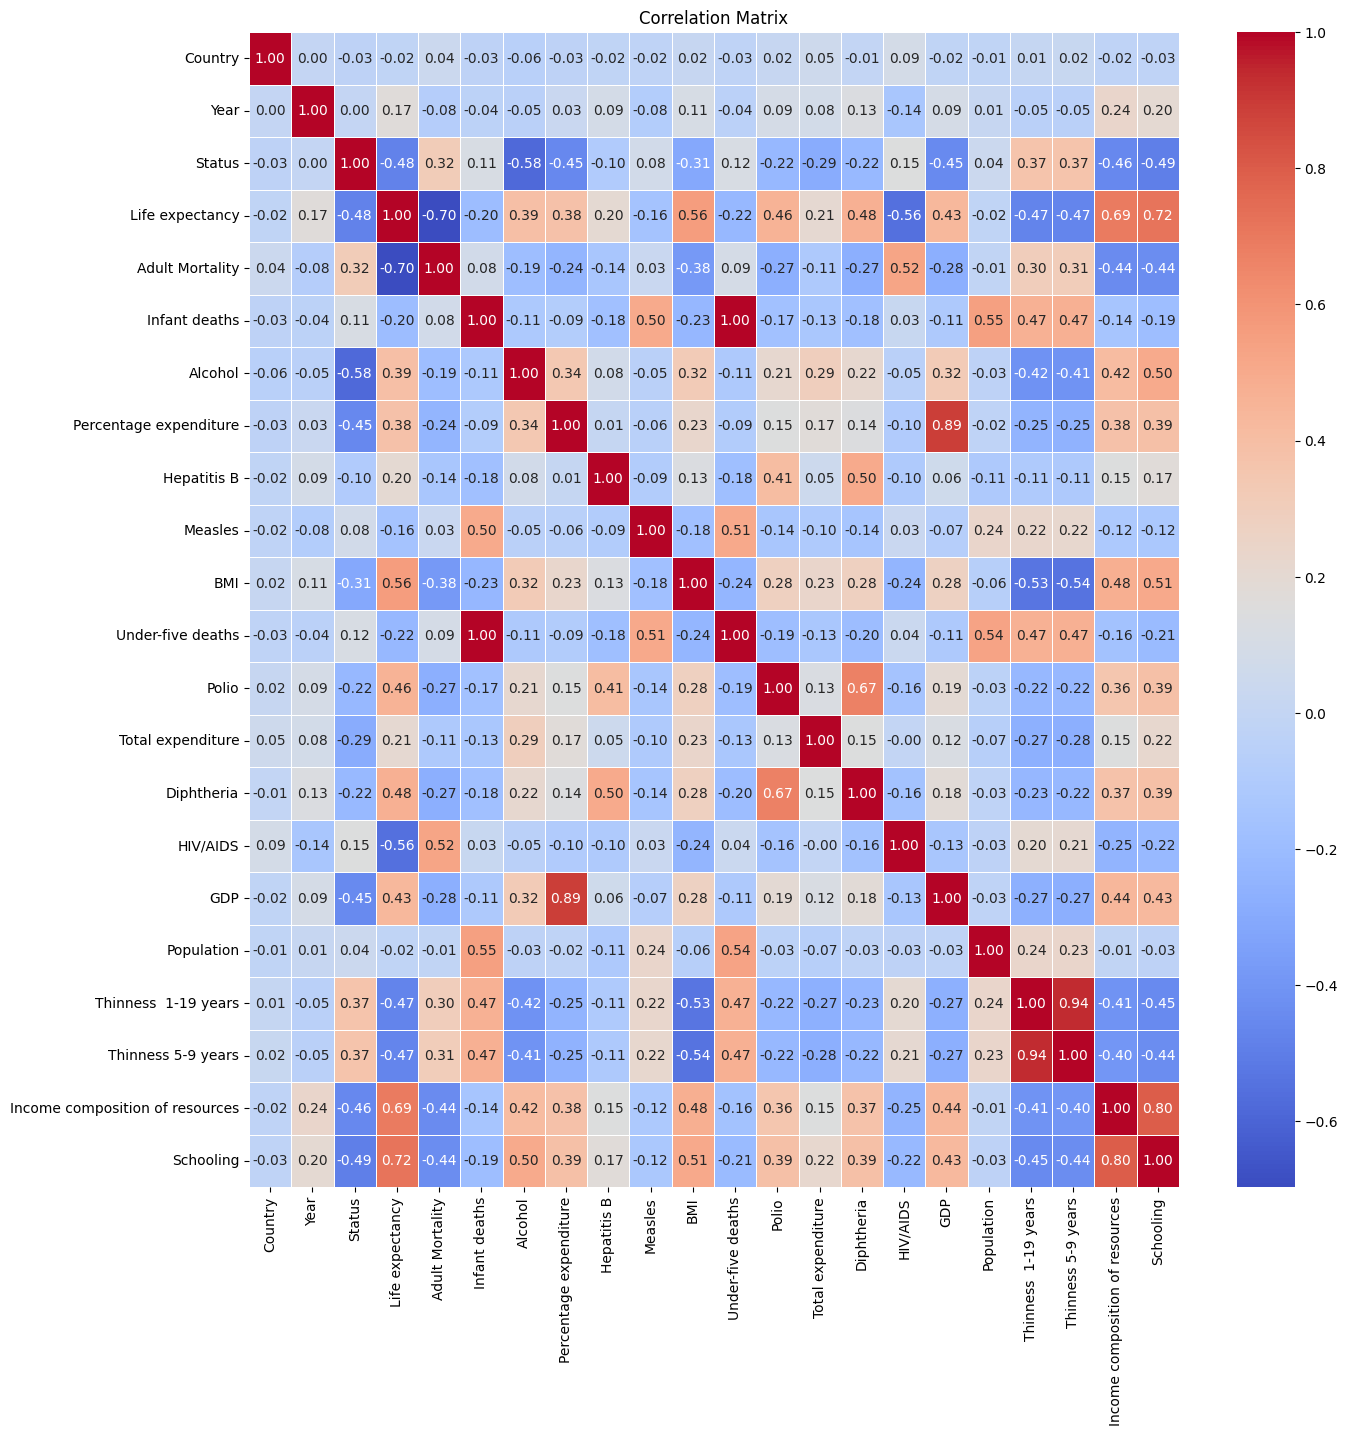

In [ ]:
# Correlation matrix heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm',linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
corr_matrix = df1.corr()
def categorize_correlation(corr_value):
    if corr_value >= 0.7:
        return 'Strong'
    elif corr_value >= 0.3:
        return 'Moderate'
    else:
        return 'Low'
categorized_corr = corr_matrix.applymap(categorize_correlation)

print("\nCategorized Correlation Matrix:")
#print(categorized_corr)
categorized_corr


Categorized Correlation Matrix:


<ipython-input-38-aed6bc068767>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  categorized_corr = corr_matrix.applymap(categorize_correlation)


Country    Year    Status Life expectancy  \
Country                          Strong     Low       Low             Low   
Year                                Low  Strong       Low             Low   
Status                              Low     Low    Strong             Low   
Life expectancy                     Low     Low       Low          Strong   
Adult Mortality                     Low     Low  Moderate             Low   
Infant deaths                       Low     Low       Low             Low   
Alcohol                             Low     Low       Low        Moderate   
Percentage expenditure              Low     Low       Low        Moderate   
Hepatitis B                         Low     Low       Low             Low   
Measles                             Low     Low       Low             Low   
BMI                                 Low     Low       Low        Moderate   
Under-five deaths                   Low     Low       Low             Low   
Polio                               Low     Low       Low        Moderate   
Total expenditure                   Low     Low       Low             Low   
Diphtheria                          Low     Low       Low        Moderate   
HIV/AIDS                            Low     Low       Low             Low   
GDP                                 Low     Low       Low        Moderate   
Population                          Low     Low       Low             Low   
Thinness  1-19 years                Low     Low  Moderate             Low   
Thinness 5-9 years                  Low     Low  Moderate             Low   
Income composition of resources     Low     Low       Low        Moderate   
Schooling                           Low     Low       Low          Strong   

                                Adult Mortality Infant deaths   Alcohol  \
Country                                     Low           Low       Low   
Year                                        Low           Low       Low   
Status                                 Moderate           Low       Low   
Life expectancy                             Low           Low  Moderate   
Adult Mortality                          Strong           Low       Low   
Infant deaths                               Low        Strong       Low   
Alcohol                                     Low           Low    Strong   
Percentage expenditure                      Low           Low  Moderate   
Hepatitis B                                 Low           Low       Low   
Measles                                     Low      Moderate       Low   
BMI                                         Low           Low  Moderate   
Under-five deaths                           Low        Strong       Low   
Polio                                       Low           Low       Low   
Total expenditure                           Low           Low       Low   
Diphtheria                                  Low           Low       Low   
HIV/AIDS                               Moderate           Low       Low   
GDP                                         Low           Low  Moderate   
Population                                  Low      Moderate       Low   
Thinness  1-19 years                        Low      Moderate       Low   
Thinness 5-9 years                     Moderate      Moderate       Low   
Income composition of resources             Low           Low  Moderate   
Schooling                                   Low           Low  Moderate   

                                Percentage expenditure Hepatitis B   Measles  \
Country                                            Low         Low       Low   
Year                                               Low         Low       Low   
Status                                             Low         Low       Low   
Life expectancy                               Moderate         Low       Low   
Adult Mortality                                    Low         Low       Low   
Infant deaths                                      Low

**Observations**:

- The Target variable 'Life expectancy' has a strong correlation with following features:

- 'Income composition of resources','Schooling' and 'BMI'
It has moderate correlation with Alcohol consumption, BMI , Vaccination -Diphtheria,Polio, 'GDP'.

- It has negative correlation with 'Adult Mortality', 'HIV/AIDS' and 'thinness' variables.

- Certain independent variables also have strong correlation like 'under-five deaths' and 'infant deaths' showing multicollinearity amongst variables.

#**iii. Check the distributions/skewness in the variables and do the transformations if required.**

In [ ]:
df1.skew()

Country                            0.03
Year                              -0.01
Status                            -1.72
Life expectancy                   -0.64
Adult Mortality                    1.18
Infant deaths                      9.79
Alcohol                            0.61
Percentage expenditure             4.65
Hepatitis B                       -2.14
Measles                            9.44
BMI                               -0.22
Under-five deaths                  9.50
Polio                             -2.10
Total expenditure                  0.64
Diphtheria                        -2.08
HIV/AIDS                           5.40
GDP                                3.48
Population                        18.04
Thinness  1-19 years               1.72
Thinness 5-9 years                 1.79
Income composition of resources   -1.18
Schooling                         -0.62
dtype: float64

In [ ]:
skewness = df1.skew()
skewness
def Level_of_skewness(s):
    if s > 1 or s < -1:
        return 'Highly Skewed'
    elif s > 0.5 or s<-0.5:
        return 'Moderately Skewed'
    else:
        return 'Lightly Skewed'

skewness_category = skewness.apply(Level_of_skewness)
print(skewness_category)

Country                               Lightly Skewed
Year                                  Lightly Skewed
Status                                 Highly Skewed
Life expectancy                    Moderately Skewed
Adult Mortality                        Highly Skewed
Infant deaths                          Highly Skewed
Alcohol                            Moderately Skewed
Percentage expenditure                 Highly Skewed
Hepatitis B                            Highly Skewed
Measles                                Highly Skewed
BMI                                   Lightly Skewed
Under-five deaths                      Highly Skewed
Polio                                  Highly Skewed
Total expenditure                  Moderately Skewed
Diphtheria                             Highly Skewed
HIV/AIDS                               Highly Skewed
GDP                                    Highly Skewed
Population                             Highly Skewed
Thinness  1-19 years                   Highly 

**Observation**:

- 'Population' variable is highly skewed with a value of 18.04, other variables like 'percentage expenditure ', 'under-five deaths','Measles', 'infant deaths','HIV/AIDS' and 'GDP' also have higher skew value.
- The variables like 'Hepatitis B', 'Polio', 'Diphtheria', 'Income composition of resources' and 'Status' have negative skew values.
- The varibles 'Life expectancy' (target variable) is moderately skewed along with 'Total expenditure','Alcohol' and 'Schooling' variables.

In [ ]:
df2=df1.copy()

In [ ]:
skewness = df2.skew()
from sklearn.preprocessing import PowerTransformer # Importing PowerTransformer here
# Apply transformations based on skewness
for col in df2.select_dtypes(include=['float64', 'int64']).columns:
    if skewness[col] > 1:  # Apply log transformation for highly skewed data
        df2[col] = df2[col].apply(lambda x: np.log(x) if x > 0 else x)
    elif skewness[col] > 0.5:  # Apply square root transformation for moderately skewed data
        df2[col] = df2[col].apply(lambda x: np.sqrt(x) if x >= 0 else x)
    elif skewness[col] < -0.5:  # Apply Yeo-Johnson for negatively skewed data
        pt = PowerTransformer(method='yeo-johnson')
        df2[[col]] = pt.fit_transform(df2[[col]]) # Checking skewness after transformation




In [ ]:
df2.skew()

Country                            0.03
Year                              -0.01
Status                            -1.72
Life expectancy                   -0.10
Adult Mortality                   -1.27
Infant deaths                      0.77
Alcohol                           -0.18
Percentage expenditure            -0.08
Hepatitis B                       -0.88
Measles                            0.56
BMI                               -0.22
Under-five deaths                  0.69
Polio                             -1.02
Total expenditure                 -0.18
Diphtheria                        -1.03
HIV/AIDS                           1.28
GDP                               -0.44
Population                        -0.94
Thinness  1-19 years              -0.60
Thinness 5-9 years                -0.66
Income composition of resources   -0.12
Schooling                         -0.04
dtype: float64

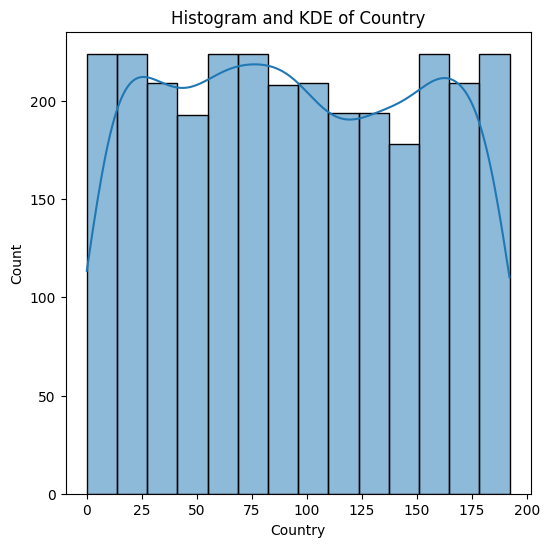

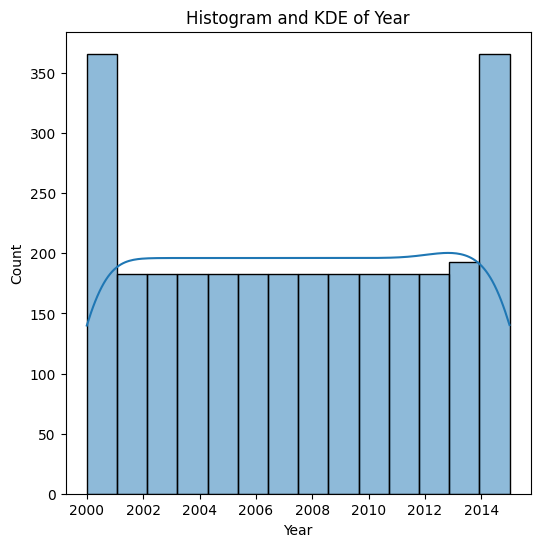

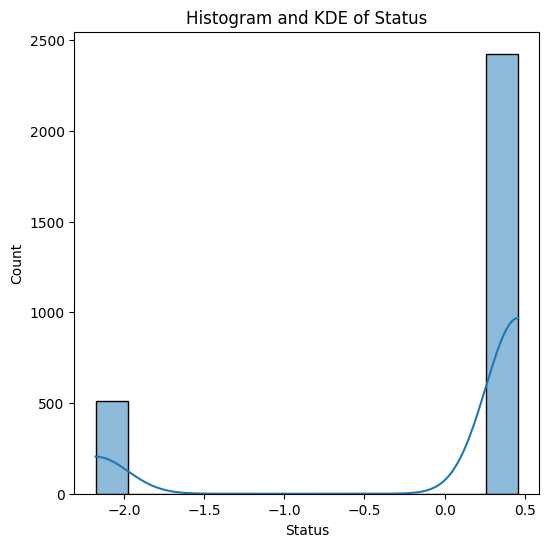

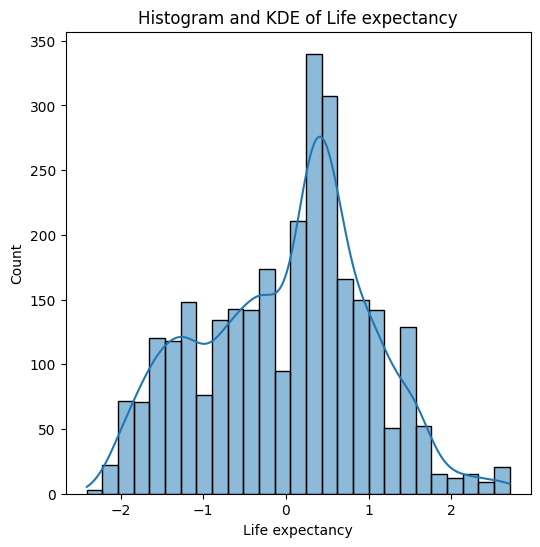

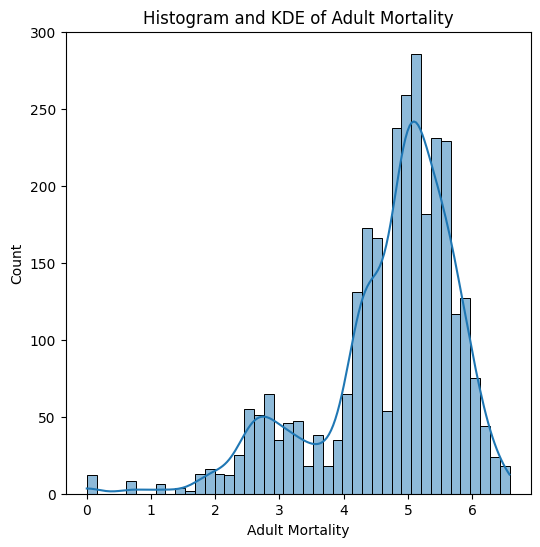

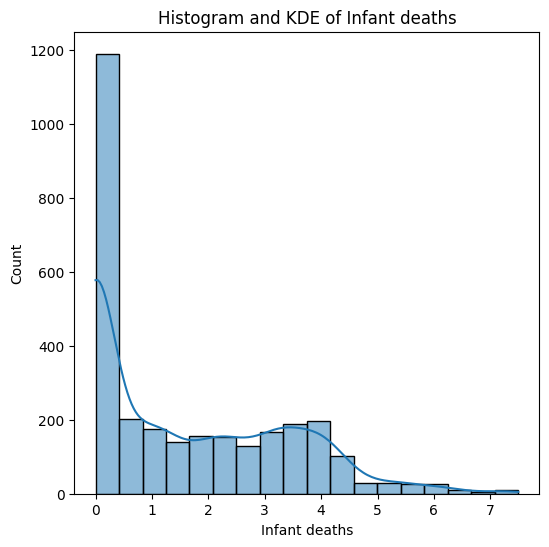

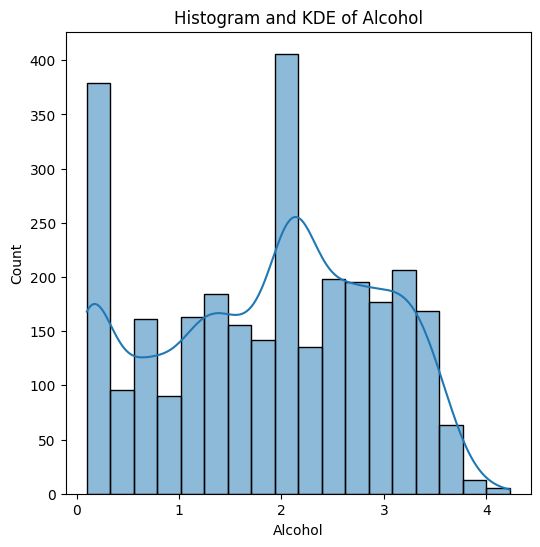

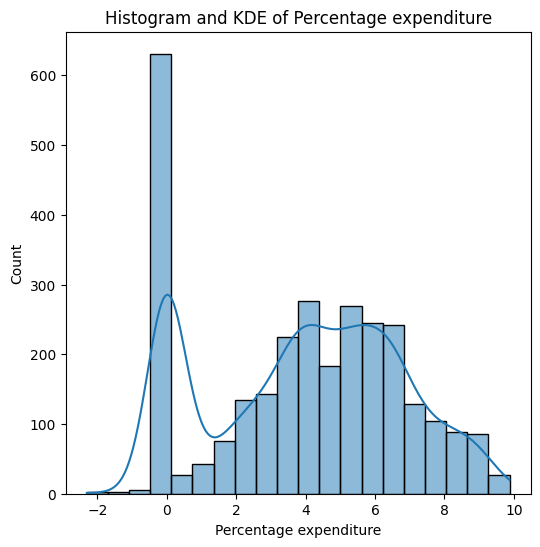

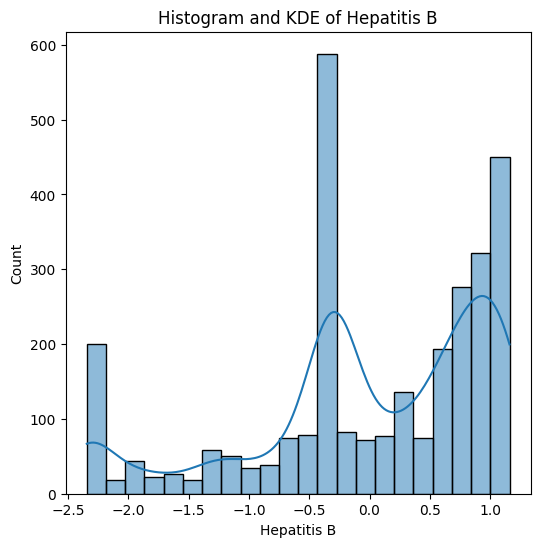

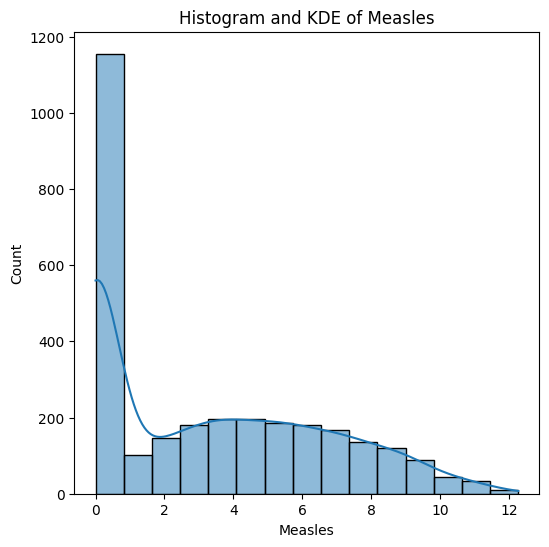

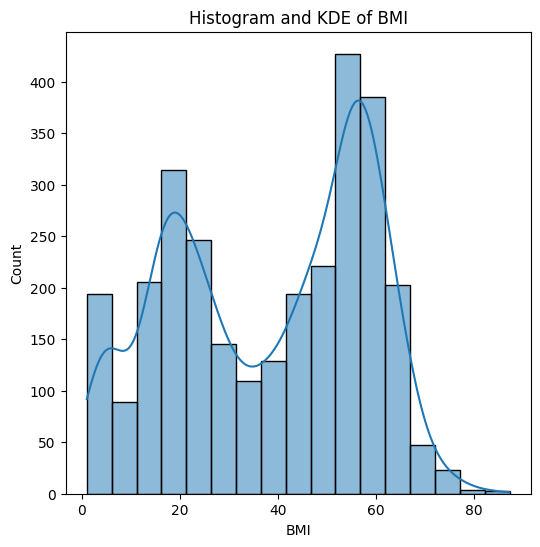

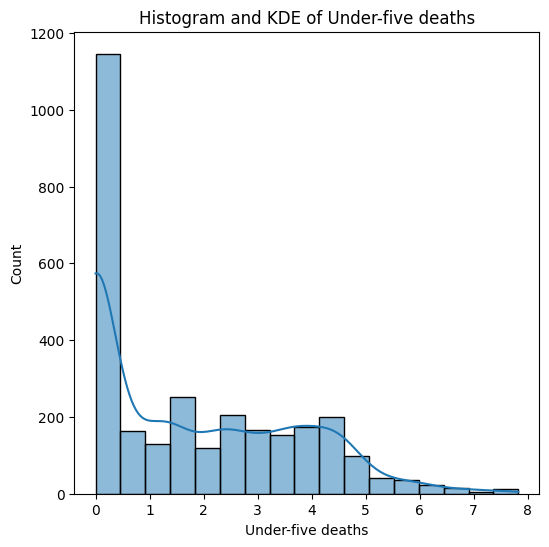

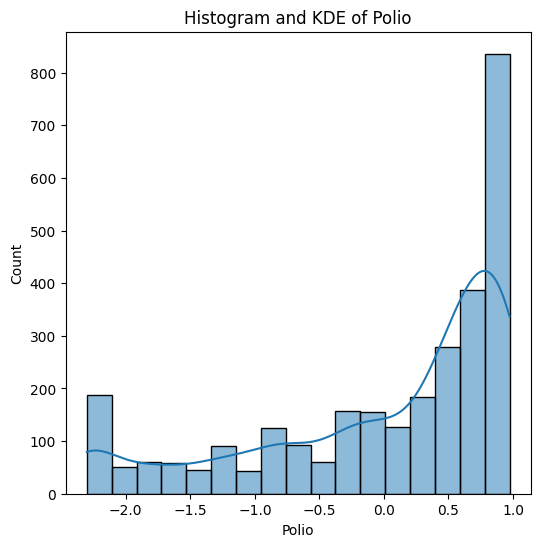

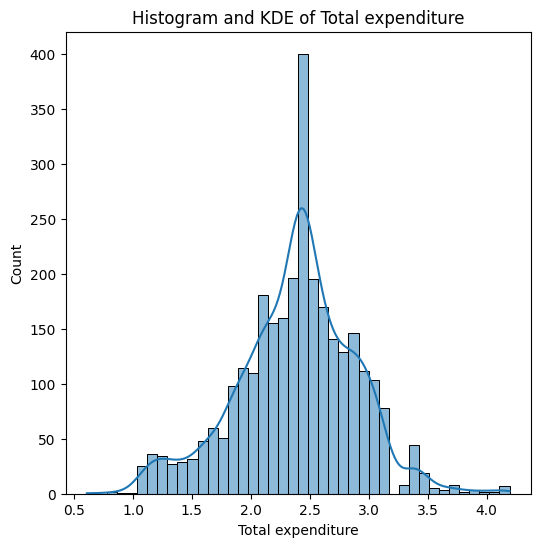

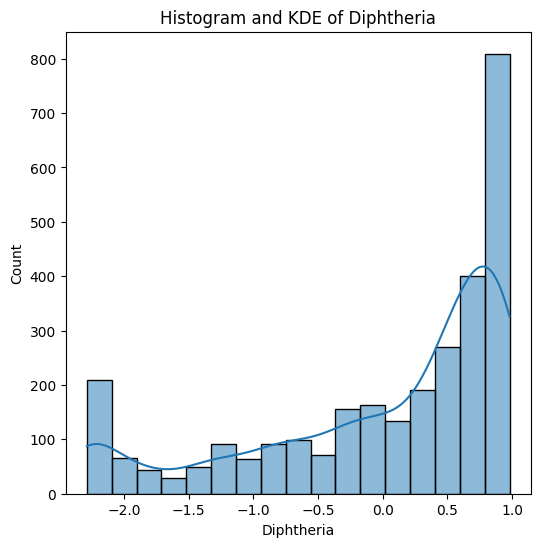

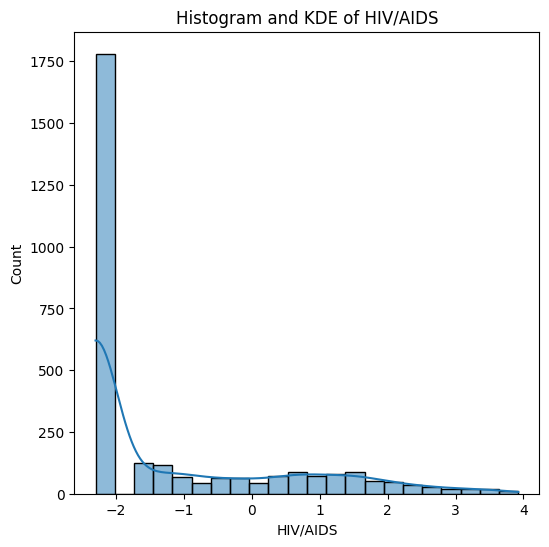

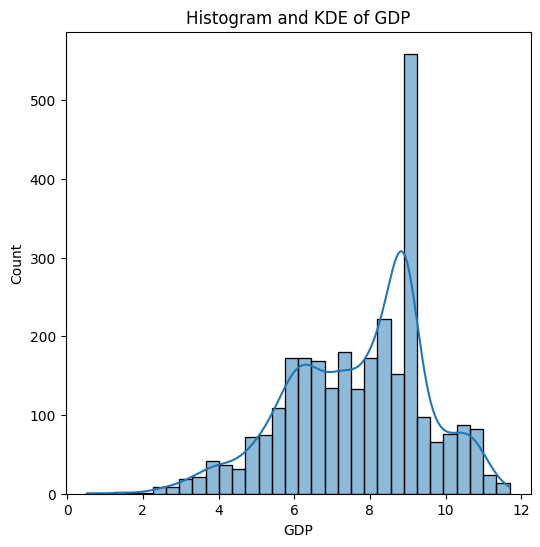

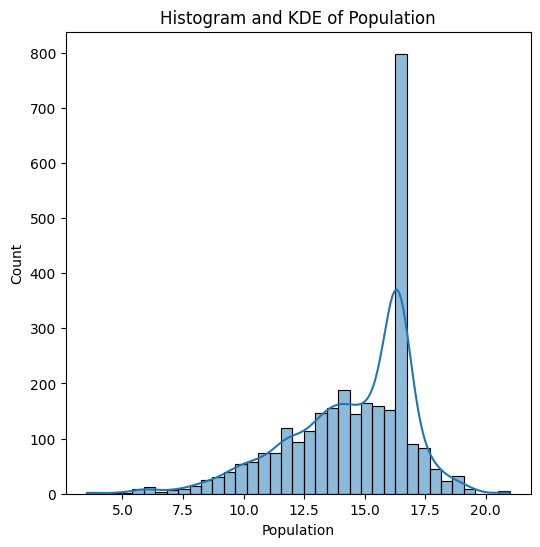

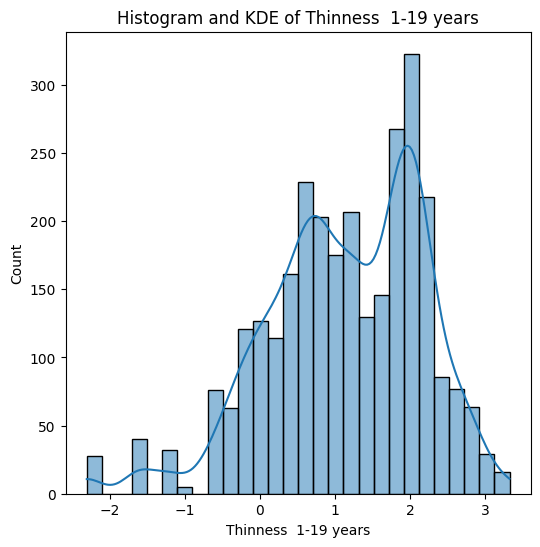

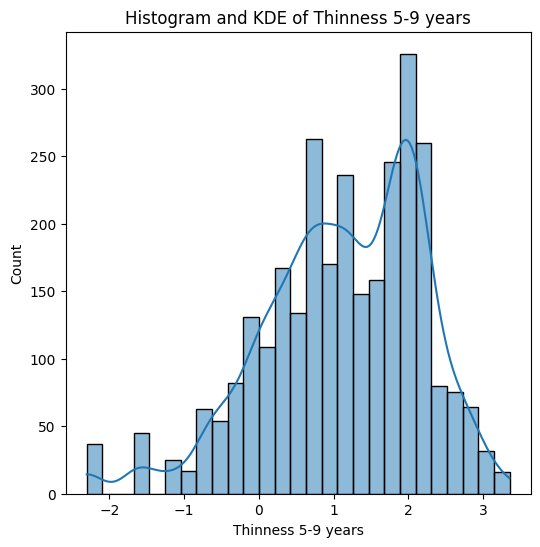

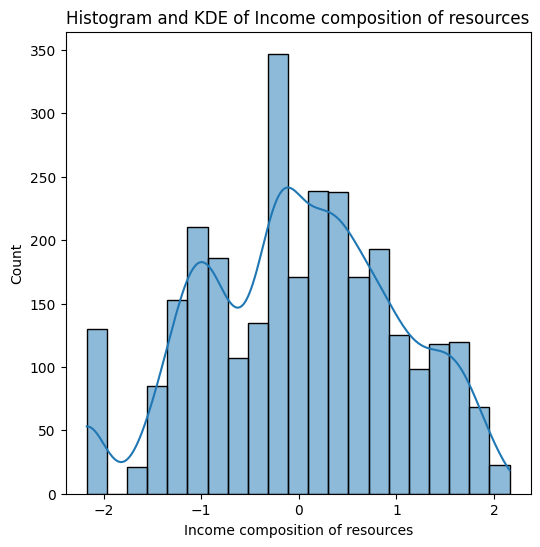

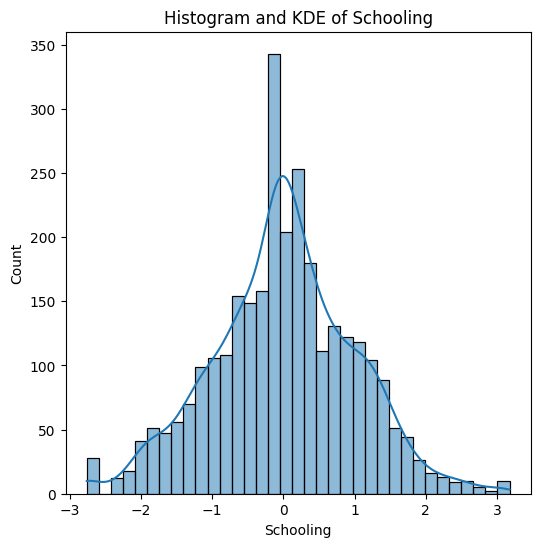

In [ ]:
#After removing skewness in df3
for col in df2.columns:
    plt.figure(figsize=(6, 6))
    sns.histplot(df2[col], kde=True)
    plt.title(f'Histogram and KDE of {col}')
    plt.show()

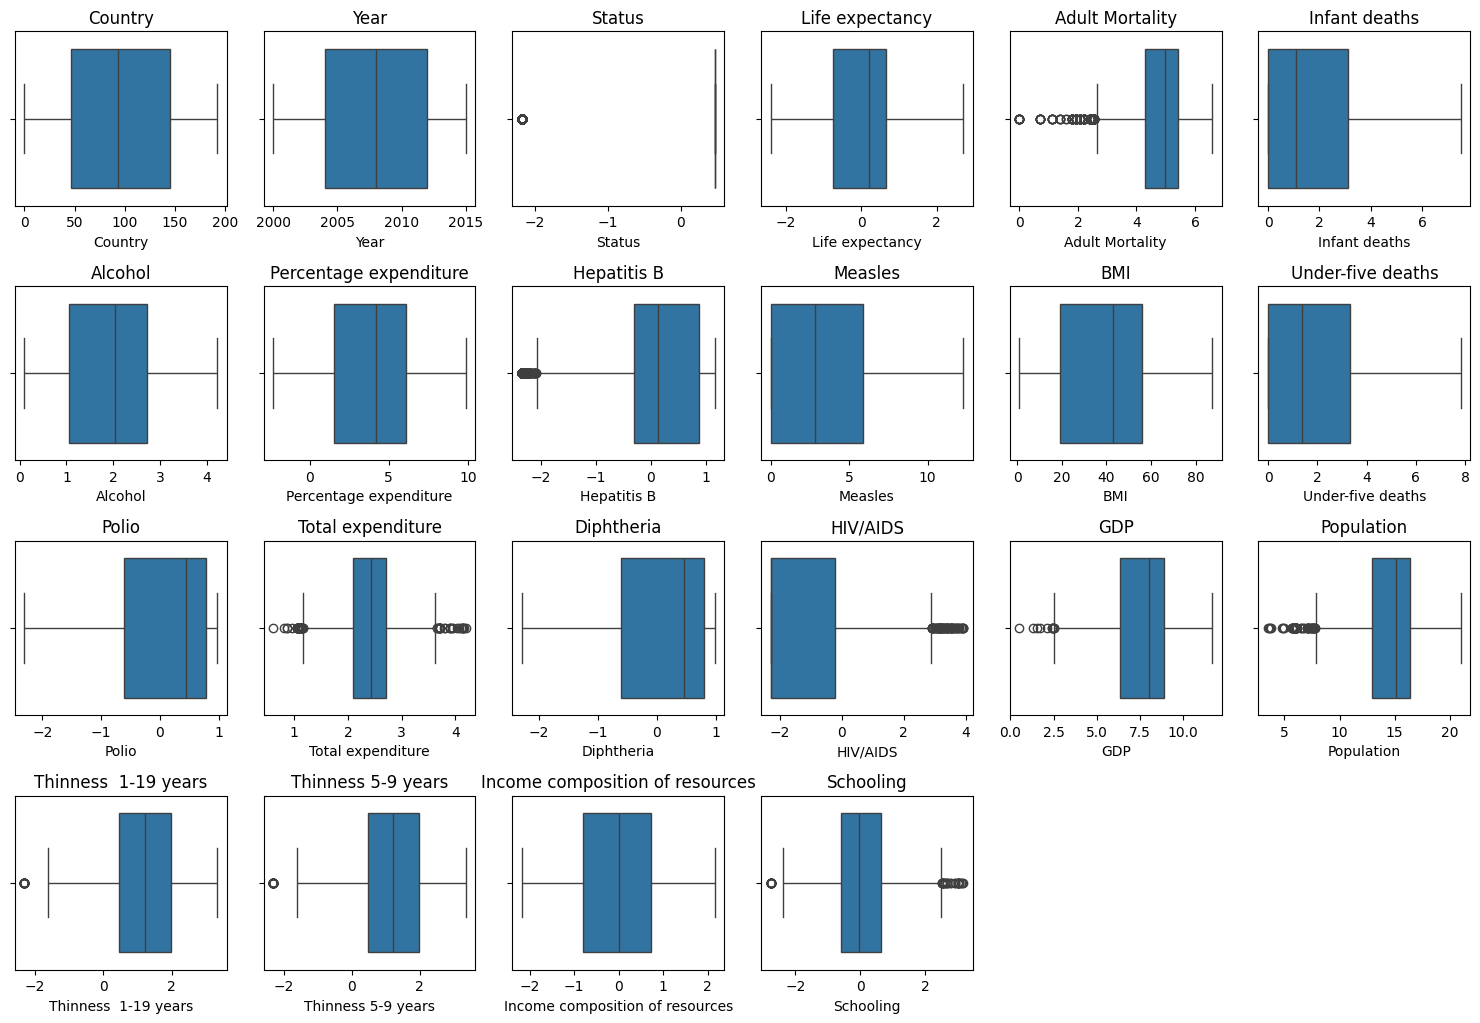

In [ ]:

plt.figure(figsize=(15, 15))

for col in df2.columns:
    plt.subplot(6, 6, df2.columns.get_loc(col) + 1)
    sns.boxplot(x=df2[col])
    plt.title(col)

plt.tight_layout()
plt.show()

# **iv. Check/Treat the outliers and do the feature scaling if required.**

In [ ]:

def check_outliers(df2):
    outliers = {}
    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df2[column].quantile(0.25)
        Q3 = df2[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df2[(df2[column] < lower_bound) | (df2[column] > upper_bound)]
        #data['Column'] = np.where(data['column'] < lower_bound, lower_bound, data['column'])
    return outliers
outliers = check_outliers(df2)
print(outliers)

{'Year': Empty DataFrame
Columns: [Country, Year, Status, Life expectancy, Adult Mortality, Infant deaths, Alcohol, Percentage expenditure, Hepatitis B, Measles, BMI, Under-five deaths, Polio, Total expenditure, Diphtheria, HIV/AIDS, GDP, Population, Thinness  1-19 years, Thinness 5-9 years, Income composition of resources, Schooling]
Index: []

[0 rows x 22 columns], 'Life expectancy': Empty DataFrame
Columns: [Country, Year, Status, Life expectancy, Adult Mortality, Infant deaths, Alcohol, Percentage expenditure, Hepatitis B, Measles, BMI, Under-five deaths, Polio, Total expenditure, Diphtheria, HIV/AIDS, GDP, Population, Thinness  1-19 years, Thinness 5-9 years, Income composition of resources, Schooling]
Index: []

[0 rows x 22 columns], 'Adult Mortality':       Country  Year  Status  Life expectancy  Adult Mortality  Infant deaths  \
13          0  2002    0.46            -1.34             1.10           4.48   
17          1  2014    0.46             0.90             2.08        

No outliers found in column: Country
No outliers found in column: Year


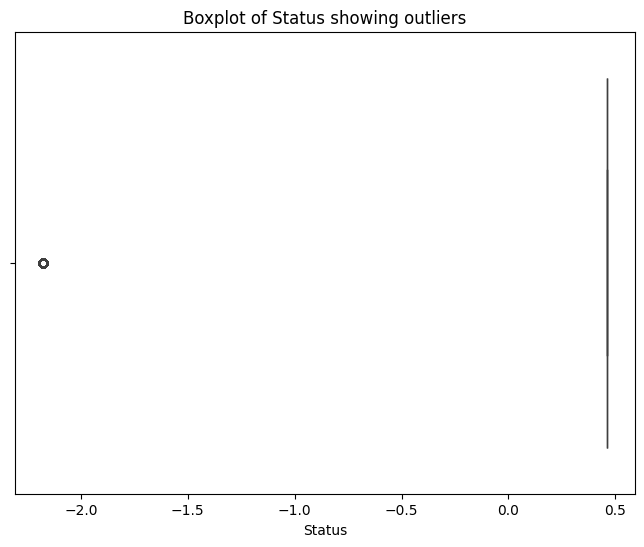

Number of outliers in Status: 512
      Country  Year  Status  Life expectancy  Adult Mortality  Infant deaths  \
112         7  2015   -2.18             1.67             4.08           0.00   
113         7  2014   -2.18             1.66             1.79           0.00   
114         7  2013   -2.18             1.63             4.11           0.00   
115         7  2012   -2.18             1.60             4.11           0.00   
116         7  2011   -2.18             1.55             4.14           0.00   
...       ...   ...     ...              ...              ...            ...   
2805      184  2004   -2.18             0.90             4.71           3.33   
2806      184  2003   -2.18             0.86             4.74           3.33   
2807      184  2002   -2.18             0.83             4.74           3.33   
2808      184  2001   -2.18             0.81             4.74           3.33   
2809      184  2000   -2.18             0.80             4.74           3.33   

     

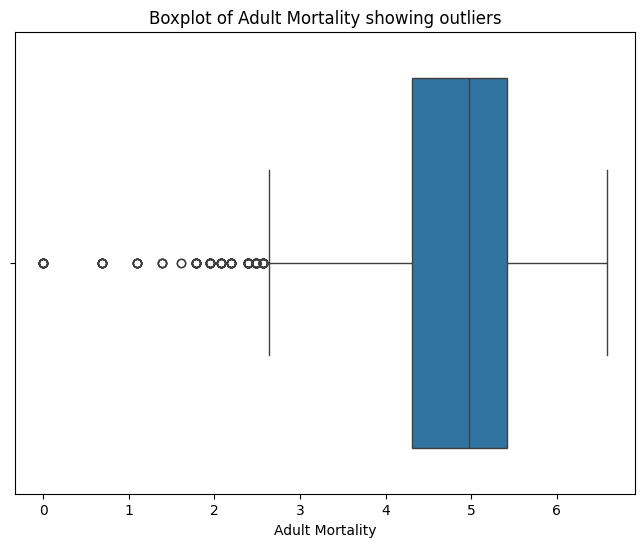

Number of outliers in Adult Mortality: 166
      Country  Year  Status  Life expectancy  Adult Mortality  Infant deaths  \
13          0  2002    0.46            -1.34             1.10           4.48   
17          1  2014    0.46             0.90             2.08           0.00   
23          1  2008    0.46             0.60             0.00           0.00   
24          1  2007    0.46             0.68             2.20           0.00   
31          1  2000    0.46             0.26             2.40           0.00   
...       ...   ...     ...              ...              ...            ...   
2794      184  2015   -2.18             1.15             2.56           3.14   
2802      184  2007   -2.18             0.98             2.40           3.30   
2842      187  2015    0.46             0.19             2.56           0.00   
2877      189  2012    0.46             0.64             2.56           3.37   
2931      192  2006    0.46            -2.02             1.95           3.33 

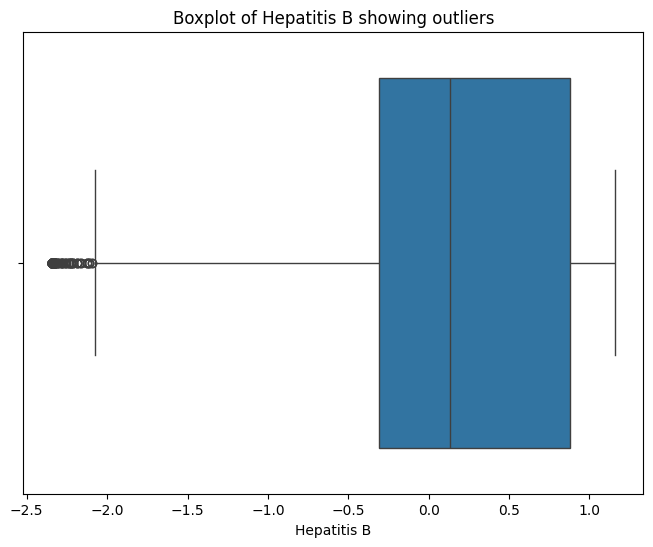

Number of outliers in Hepatitis B: 211
      Country  Year  Status  Life expectancy  Adult Mortality  Infant deaths  \
40          2  2007    0.46             0.41             4.86           3.00   
41          2  2006    0.46             0.36             4.88           3.00   
87          5  2008    0.46             0.62             4.84           2.30   
143         8  2000   -2.18             0.98             4.56           0.00   
149         9  2010    0.46             0.08             2.56           1.61   
...       ...   ...     ...              ...              ...            ...   
2905      190  2000    0.46            -0.27             5.53           3.87   
2906      191  2015    0.46            -0.88             3.50           3.30   
2914      191  2007    0.46            -1.60             6.19           3.47   
2927      192  2010    0.46            -1.61             6.27           3.37   
2934      192  2003    0.46            -2.07             6.57           3.26   



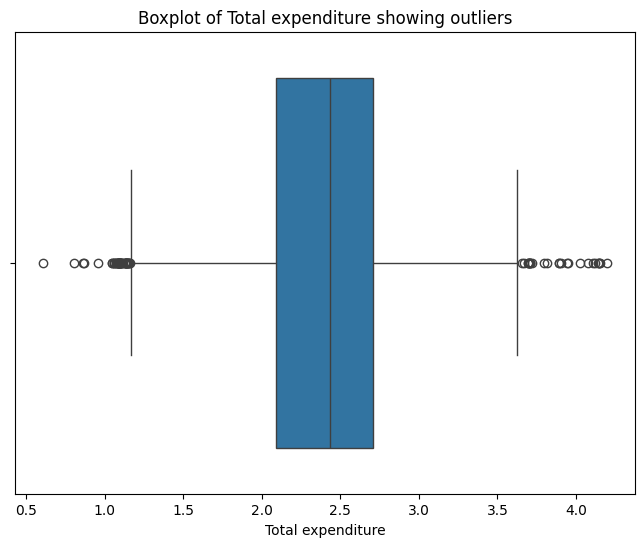

Number of outliers in Total expenditure: 71
      Country  Year  Status  Life expectancy  Adult Mortality  Infant deaths  \
137         8  2006   -2.18             1.22             4.39           0.00   
141         8  2002   -2.18             1.06             2.20           0.00   
142         8  2001   -2.18             1.05             4.52           0.00   
245        15  2010   -2.18             1.25             4.39           0.00   
424        26  2007    0.46            -1.45             5.87           3.18   
...       ...   ...     ...              ...              ...            ...   
2805      184  2004   -2.18             0.90             4.71           3.33   
2806      184  2003   -2.18             0.86             4.74           3.33   
2807      184  2002   -2.18             0.83             4.74           3.33   
2808      184  2001   -2.18             0.81             4.74           3.33   
2809      184  2000   -2.18             0.80             4.74           3.33

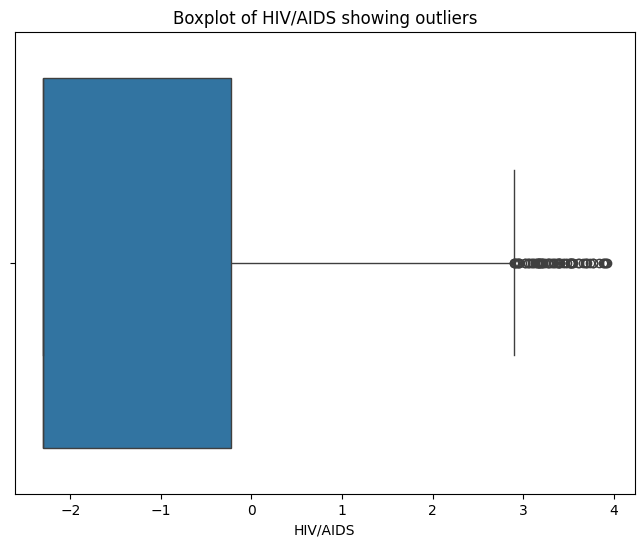

Number of outliers in HIV/AIDS: 65
      Country  Year  Status  Life expectancy  Adult Mortality  Infant deaths  \
346        21  2005    0.46            -1.66             6.34           0.69   
347        21  2004    0.46            -1.88             6.48           0.69   
348        21  2003    0.46            -1.97             6.54           0.69   
349        21  2002    0.46            -1.99             6.55           0.69   
350        21  2001    0.46            -1.96             6.52           0.69   
...       ...   ...     ...              ...              ...            ...   
2933      192  2004    0.46            -2.08             6.58           3.30   
2934      192  2003    0.46            -2.07             6.57           3.26   
2935      192  2002    0.46            -2.05             4.29           3.22   
2936      192  2001    0.46            -2.03             6.53           3.22   
2937      192  2000    0.46            -1.99             6.50           3.18   

    

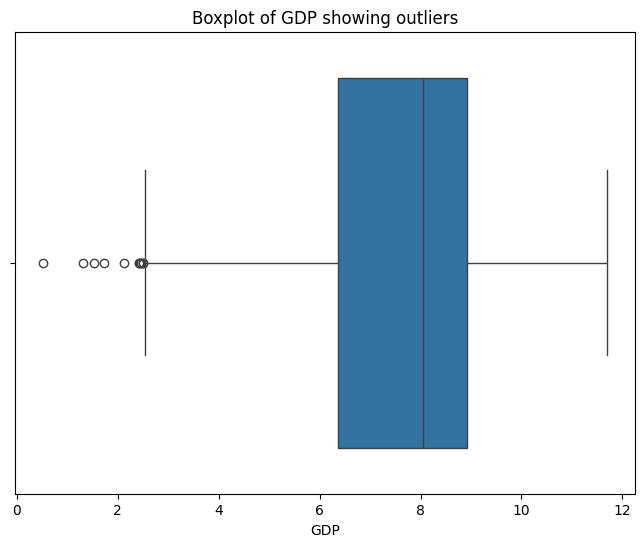

Number of outliers in GDP: 11
      Country  Year  Status  Life expectancy  Adult Mortality  Infant deaths  \
205        12  2002    0.46            -0.45             5.10           5.33   
479        28  2000    0.46            -1.23             5.61           3.30   
896        57  2001    0.46            -1.61             5.92           5.51   
1672      107  2010    0.46             0.35             5.09           0.00   
1874      121  2002    0.46             0.56             5.28           1.39   
2035      133  2003    0.46            -0.35             5.38           4.20   
2036      133  2002    0.46            -0.39             5.40           4.22   
2120      139  2014   -2.18             0.54             4.91           0.69   
2158      141  2008    0.46            -0.27             5.64           2.89   
2254      149  2010    0.46            -0.65             5.36           3.04   
2256      149  2008    0.46            -0.79             5.42           3.09   

      Alc

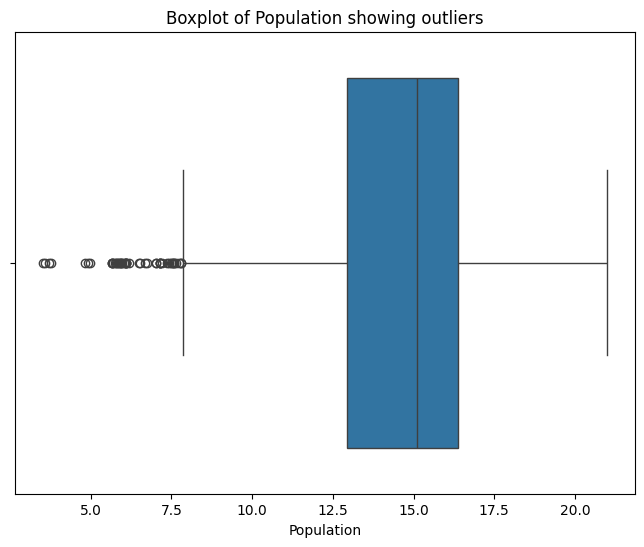

Number of outliers in Population: 49
      Country  Year  Status  Life expectancy  Adult Mortality  Infant deaths  \
295        18  2008    0.46            -0.37             5.46           0.00   
538        32  2005    0.46            -1.85             3.83           3.81   
573        34  2002    0.46             0.27             2.77           6.05   
650        40  2006   -2.18             0.68             4.73           0.00   
653        40  2003   -2.18             0.52             4.80           0.00   
654        40  2002   -2.18             0.54             4.82           0.00   
655        40  2001   -2.18             0.55             4.84           0.00   
684        42  2004   -2.18             1.05             4.17           0.00   
985        63  2008    0.46             0.42             4.85           0.00   
986        63  2007    0.46             0.49             2.48           0.00   
988        63  2005    0.46             0.42             4.85           0.00   
990

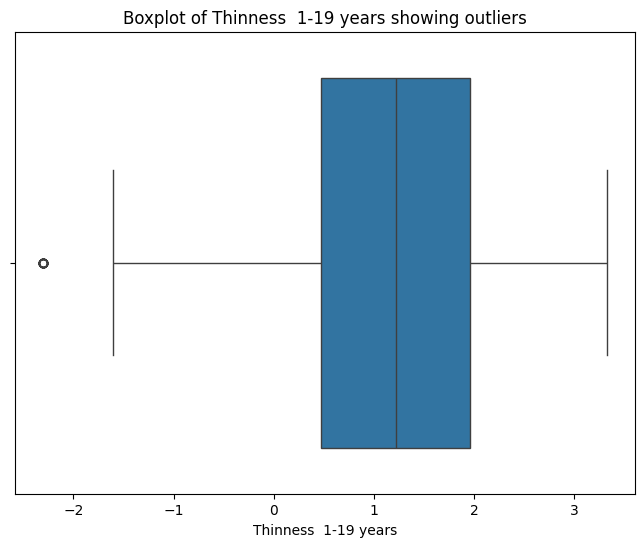

Number of outliers in Thinness  1-19 years: 28
      Country  Year  Status  Life expectancy  Adult Mortality  Infant deaths  \
624        38  2013    0.46            -0.13             5.10           0.00   
1378       88  2015    0.46            -0.45             5.29           0.00   
1379       88  2014    0.46            -0.47             0.69           0.00   
1380       88  2013    0.46            -0.50             3.09           0.00   
1381       88  2012    0.46            -0.51             3.18           0.00   
1382       88  2011    0.46            -0.53             3.26           0.00   
1383       88  2010    0.46            -0.55             3.30           0.00   
1384       88  2009    0.46            -0.56             3.33           0.00   
1650      105  2013    0.46            -0.13             5.10           0.00   
1812      117  2013    0.46            -0.13             5.10           0.00   
1909      124  2013    0.46            -0.13             5.10           0

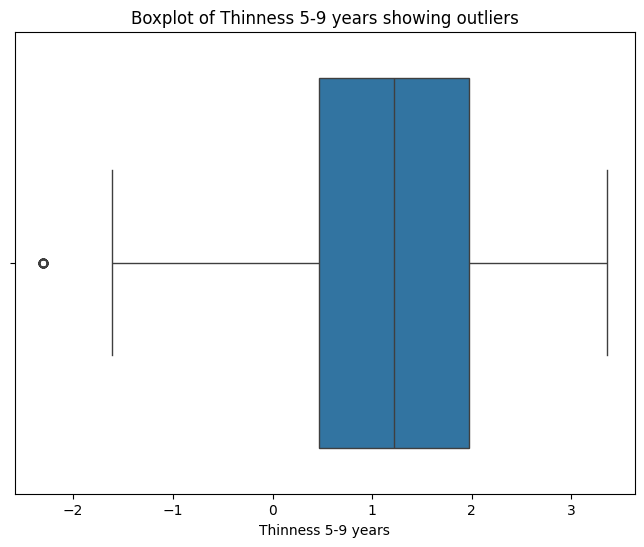

Number of outliers in Thinness 5-9 years: 37
      Country  Year  Status  Life expectancy  Adult Mortality  Infant deaths  \
624        38  2013    0.46            -0.13             5.10           0.00   
1378       88  2015    0.46            -0.45             5.29           0.00   
1379       88  2014    0.46            -0.47             0.69           0.00   
1380       88  2013    0.46            -0.50             3.09           0.00   
1381       88  2012    0.46            -0.51             3.18           0.00   
1382       88  2011    0.46            -0.53             3.26           0.00   
1383       88  2010    0.46            -0.55             3.30           0.00   
1384       88  2009    0.46            -0.56             3.33           0.00   
1385       88  2008    0.46            -0.57             3.04           0.00   
1386       88  2007    0.46            -0.58             5.35           0.00   
1387       88  2006    0.46            -0.58             5.36           0.0

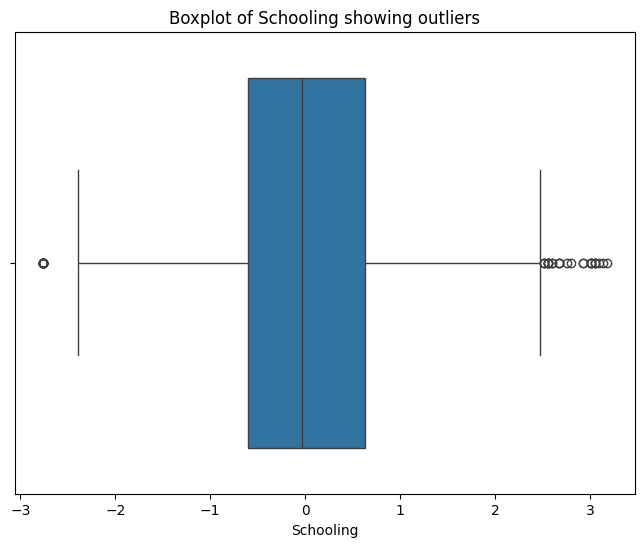

Number of outliers in Schooling: 55
      Country  Year  Status  Life expectancy  Adult Mortality  Infant deaths  \
74          4  2005    0.46             0.51             4.99           0.00   
75          4  2004    0.46             0.49             5.00           0.00   
76          4  2003    0.46             0.46             5.02           0.00   
77          4  2002    0.46             0.44             5.03           0.00   
78          4  2001    0.46             0.41             5.04           0.00   
79          4  2000    0.46             0.39             5.05           0.00   
112         7  2015   -2.18             1.67             4.08           0.00   
113         7  2014   -2.18             1.66             1.79           0.00   
114         7  2013   -2.18             1.63             4.11           0.00   
115         7  2012   -2.18             1.60             4.11           0.00   
116         7  2011   -2.18             1.55             4.14           0.00   
117 

In [ ]:
#Checking Outliers

def check_outliers(df2):
    outliers = {}
    for column in df2.select_dtypes(include=['number']).columns:
        Q1 = df2[column].quantile(0.25)
        Q3 = df2[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df2[(df2[column] < lower_bound) | (df2[column] > upper_bound)]
    return outliers

outliers = check_outliers(df2)

# Now visualize the outliers for each numerical column
for col, outlier_df in outliers.items():
  if not outlier_df.empty:  # Check if there are any outliers for this column
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df2[col])
    plt.title(f'Boxplot of {col} showing outliers')
    plt.show()
    print(f"Number of outliers in {col}: {len(outlier_df)}")
    print(outlier_df) # print the outlier data points
  else:
    print(f"No outliers found in column: {col}")


In [ ]:
df3=df2.copy()

In [ ]:
# Function to cap outliers using IQR method
def cap_outliers(df, column, lower_bound_multiplier=1.5, upper_bound_multiplier=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - lower_bound_multiplier * IQR
    upper_bound = Q3 + upper_bound_multiplier * IQR
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

# Iterate through numerical columns and cap outliers
for col in df3.select_dtypes(include=['number']).columns:
    df3 = cap_outliers(df3, col)


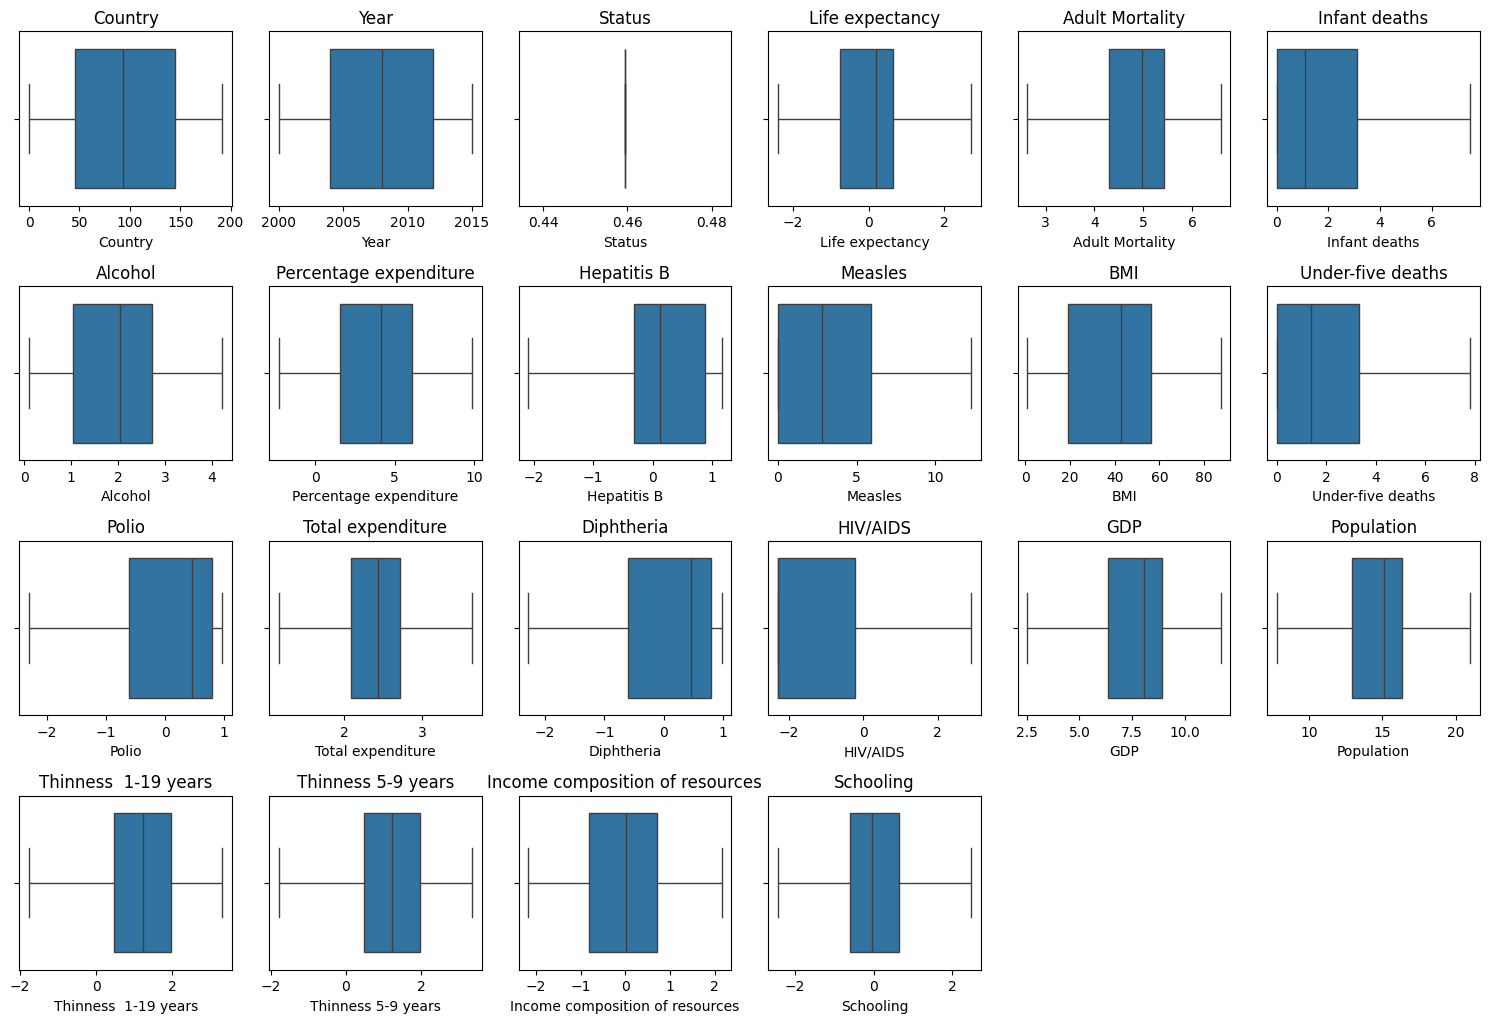

In [ ]:
#After removimng outliers
plt.figure(figsize=(15, 15))

for col in df3.columns:
    plt.subplot(6, 6, df3.columns.get_loc(col) + 1)
    sns.boxplot(x=df3[col])
    plt.title(col)

plt.tight_layout()
plt.show()

# Feature Scaling and splitting the data

In [ ]:
x = df3.drop('Life expectancy', axis=1)
y = df3['Life expectancy']
#considering data after removing skewness

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# **v.	Build Deep Learning model using ANN with multiple hidden layers.**

**Model 1**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(64, activation='relu', input_shape=(x.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1,activation='linear'  )
])
model.compile(optimizer=Adam(), loss='mse', metrics=['mae'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,033 (15.75 KB)

 Trainable params: 4,033 (15.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50)


Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.6483 - mae: 0.6228 - val_loss: 0.1680 - val_mae: 0.3099
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1856 - mae: 0.3251 - val_loss: 0.1526 - val_mae: 0.2998
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1779 - mae: 0.3234 - val_loss: 0.1409 - val_mae: 0.2863
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1562 - mae: 0.2980 - val_loss: 0.1451 - val_mae: 0.2930
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1427 - mae: 0.2836 - val_loss: 0.1289 - val_mae: 0.2721
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1400 - mae: 0.2853 - val_loss: 0.1295 - val_mae: 0.2746
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1345 - mae: 0.2746 - val_loss: 0.1268 - val_mae: 0.2660
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1278 - mae: 0.2709 - val_loss: 0.1173 - val_mae: 0.2559
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1223 - mae: 

In [ ]:
y_pre1=model.evaluate(X_test,y_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0749 - mae: 0.2174 


# Using Early stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

early_stop = EarlyStopping(patience=10, restore_best_weights=True)
model_ckpt = ModelCheckpoint('best_model.h5', save_best_only=True)

history = model.fit(X_train, y_train, epochs=100, validation_split=0.2,
                    callbacks=[early_stop, model_ckpt])


Epoch 1/100
58/59 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6466 - mae: 0.6349

59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.6403 - mae: 0.6312 - val_loss: 0.1890 - val_mae: 0.3342
Epoch 2/100
46/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2579 - mae: 0.3902

59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2575 - mae: 0.3904 - val_loss: 0.1821 - val_mae: 0.3303
Epoch 3/100
44/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2326 - mae: 0.3797

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2316 - mae: 0.3772 - val_loss: 0.1704 - val_mae: 0.3131
Epoch 4/100
51/59 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2246 - mae: 0.3631 

59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2230 - mae: 0.3620 - val_loss: 0.1668 - val_mae: 0.3107
Epoch 5/100
42/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1962 - mae: 0.3447

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1976 - mae: 0.3451 - val_loss: 0.1632 - val_mae: 0.3051
Epoch 6/100
46/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1873 - mae: 0.3337

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1878 - mae: 0.3339 - val_loss: 0.1526 - val_mae: 0.2945
Epoch 7/100
47/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1900 - mae: 0.3353

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1892 - mae: 0.3347 - val_loss: 0.1502 - val_mae: 0.2933
Epoch 8/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1749 - mae: 0.3213 - val_loss: 0.1573 - val_mae: 0.3003
Epoch 9/100
53/59 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1665 - mae: 0.3092 

59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1671 - mae: 0.3097 - val_loss: 0.1381 - val_mae: 0.2778
Epoch 10/100
47/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1525 - mae: 0.3028

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1547 - mae: 0.3043 - val_loss: 0.1362 - val_mae: 0.2726
Epoch 11/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1626 - mae: 0.3028 - val_loss: 0.1374 - val_mae: 0.2757
Epoch 12/100
47/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1541 - mae: 0.2964

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1542 - mae: 0.2975 - val_loss: 0.1264 - val_mae: 0.2633
Epoch 13/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1581 - mae: 0.2976 - val_loss: 0.1283 - val_mae: 0.2686
Epoch 14/100
56/59 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1475 - mae: 0.2955 

59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1478 - mae: 0.2955 - val_loss: 0.1256 - val_mae: 0.2647
Epoch 15/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1445 - mae: 0.2879 - val_loss: 0.1331 - val_mae: 0.2749
Epoch 16/100
46/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1411 - mae: 0.2821

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1411 - mae: 0.2823 - val_loss: 0.1184 - val_mae: 0.2582
Epoch 17/100
57/59 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1398 - mae: 0.2803

59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1395 - mae: 0.2800 - val_loss: 0.1157 - val_mae: 0.2554
Epoch 18/100
45/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1260 - mae: 0.2659

59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1289 - mae: 0.2694 - val_loss: 0.1140 - val_mae: 0.2526
Epoch 19/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1297 - mae: 0.2736 - val_loss: 0.1159 - val_mae: 0.2499
Epoch 20/100
55/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1342 - mae: 0.2781

59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1342 - mae: 0.2781 - val_loss: 0.1089 - val_mae: 0.2403
Epoch 21/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1340 - mae: 0.2778 - val_loss: 0.1155 - val_mae: 0.2486
Epoch 22/100
54/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1255 - mae: 0.2669

59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1259 - mae: 0.2674 - val_loss: 0.1069 - val_mae: 0.2370
Epoch 23/100
45/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1248 - mae: 0.2672

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1266 - mae: 0.2691 - val_loss: 0.1061 - val_mae: 0.2394
Epoch 24/100
43/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1282 - mae: 0.2670

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1272 - mae: 0.2661 - val_loss: 0.1041 - val_mae: 0.2293
Epoch 25/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1263 - mae: 0.2666 - val_loss: 0.1088 - val_mae: 0.2418
Epoch 26/100
43/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1283 - mae: 0.2723

59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1260 - mae: 0.2698 - val_loss: 0.0996 - val_mae: 0.2267
Epoch 27/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1140 - mae: 0.2525 - val_loss: 0.1010 - val_mae: 0.2328
Epoch 28/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1196 - mae: 0.2650 - val_loss: 0.1007 - val_mae: 0.2319
Epoch 29/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1169 - mae: 0.2616 - val_loss: 0.0997 - val_mae: 0.2259
Epoch 30/100
45/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1143 - mae: 0.2570

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1150 - mae: 0.2570 - val_loss: 0.0981 - val_mae: 0.2230
Epoch 31/100
43/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1100 - mae: 0.2467

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1094 - mae: 0.2466 - val_loss: 0.0947 - val_mae: 0.2226
Epoch 32/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1201 - mae: 0.2578 - val_loss: 0.1028 - val_mae: 0.2299
Epoch 33/100
46/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1090 - mae: 0.2410

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1077 - mae: 0.2403 - val_loss: 0.0930 - val_mae: 0.2196
Epoch 34/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1116 - mae: 0.2484 - val_loss: 0.0963 - val_mae: 0.2252
Epoch 35/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1102 - mae: 0.2472 - val_loss: 0.0937 - val_mae: 0.2220
Epoch 36/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0990 - mae: 0.2382 - val_loss: 0.0931 - val_mae: 0.2166
Epoch 37/100
54/59 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0954 - mae: 0.2329 

59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0958 - mae: 0.2335 - val_loss: 0.0917 - val_mae: 0.2151
Epoch 38/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0996 - mae: 0.2375 - val_loss: 0.0943 - val_mae: 0.2210
Epoch 39/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1021 - mae: 0.2379 - val_loss: 0.0922 - val_mae: 0.2136
Epoch 40/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0984 - mae: 0.2355

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0984 - mae: 0.2355 - val_loss: 0.0861 - val_mae: 0.2055
Epoch 41/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0964 - mae: 0.2287 - val_loss: 0.0919 - val_mae: 0.2192
Epoch 42/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0883 - mae: 0.2206 - val_loss: 0.0938 - val_mae: 0.2167
Epoch 43/100
44/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0957 - mae: 0.2322

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0965 - mae: 0.2329 - val_loss: 0.0846 - val_mae: 0.2069
Epoch 44/100
57/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0937 - mae: 0.2259

59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0938 - mae: 0.2261 - val_loss: 0.0813 - val_mae: 0.2009
Epoch 45/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0985 - mae: 0.2313 - val_loss: 0.0851 - val_mae: 0.2055
Epoch 46/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0968 - mae: 0.2326 - val_loss: 0.0921 - val_mae: 0.2120
Epoch 47/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0937 - mae: 0.2267 - val_loss: 0.0885 - val_mae: 0.2072
Epoch 48/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0908 - mae: 0.2276 - val_loss: 0.0891 - val_mae: 0.2115
Epoch 49/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0952 - mae: 0.2266 - val_loss: 0.0900 - val_mae: 0.2165
Epoch 50/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0968 - mae: 0.2394 - val_loss: 0.0907 - val_mae: 0.2158
Epoch 51/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0933 - mae: 0.2300 - val_loss: 0.0926 - val_mae: 0.2125
Epoch 52/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0912 

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model.add(Dropout(0.3))
es = EarlyStopping(patience=10)
mc = ModelCheckpoint('best_model.h5', save_best_only=True)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history=model.fit(X_train, y_train, epochs=100, callbacks=[es, mc], validation_data=(X_test, y_test))


Epoch 1/100
70/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3361 - mae: 0.3849

74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.3364 - mae: 0.3846 - val_loss: 0.1392 - val_mae: 0.2906
Epoch 2/100
67/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3321 - mae: 0.3670

74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3312 - mae: 0.3665 - val_loss: 0.1348 - val_mae: 0.2869
Epoch 3/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3120 - mae: 0.3458 - val_loss: 0.1477 - val_mae: 0.3054
Epoch 4/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3004 - mae: 0.3449 - val_loss: 0.1385 - val_mae: 0.2930
Epoch 5/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3058 - mae: 0.3439 - val_loss: 0.1494 - val_mae: 0.3092
Epoch 6/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3598 - mae: 0.3724 - val_loss: 0.1363 - val_mae: 0.2935
Epoch 7/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3317 - mae: 0.3562 - val_loss: 0.1364 - val_mae: 0.2882
Epoch 8/100
61/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2645 - mae: 0.3182

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2701 - mae: 0.3220 - val_loss: 0.1309 - val_mae: 0.2843
Epoch 9/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3380 - mae: 0.3611 - val_loss: 0.1441 - val_mae: 0.3036
Epoch 10/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3377 - mae: 0.3635 - val_loss: 0.1319 - val_mae: 0.2872
Epoch 11/100
52/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3365 - mae: 0.3562

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3390 - mae: 0.3575 - val_loss: 0.1284 - val_mae: 0.2797
Epoch 12/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3522 - mae: 0.3676 - val_loss: 0.1440 - val_mae: 0.3007
Epoch 13/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3176 - mae: 0.3465 - val_loss: 0.1298 - val_mae: 0.2850
Epoch 14/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3092 - mae: 0.3394 - val_loss: 0.1297 - val_mae: 0.2832
Epoch 15/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3398 - mae: 0.3648 - val_loss: 0.1314 - val_mae: 0.2824
Epoch 16/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3151 - mae: 0.3423 - val_loss: 0.1361 - val_mae: 0.2891
Epoch 17/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3108 - mae: 0.3465 - val_loss: 0.1297 - val_mae: 0.2801
Epoch 18/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3208 - mae: 0.3453 - val_loss: 0.1469 - val_mae: 0.3067
Epoch 19/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3470 - 

In [ ]:
y_pre_ann1=model.predict(X_test)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


# Using Keras tuner

In [ ]:
import keras_tuner as kt

def build_model(hp):
    model = Sequential()
    model.add(Dense(hp.Int('units', 32, 128, step=32), activation='relu', input_shape=(x.shape[1],)))
    model.add(Dense(1))
    model.compile(optimizer=hp.Choice('optimizer', ['adam', 'rmsprop']), loss='mse')
    return model

tuner = kt.RandomSearch(build_model, objective='val_loss', max_trials=5)
tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test))
best_model = tuner.get_best_models(num_models=1)[0]


Reloading Tuner from ./untitled_project/tuner0.json


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
y_pred_best_model = best_model.predict(X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [ ]:
# Print R2 score before Keras Tuner
r2_before_tuner = r2_score(y_test, y_pre_ann1)
print(f"R2 Score before Keras Tuner: {r2_before_tuner}")

# Print R2 score after Keras Tuner (this was already calculated in the preceding code)
r2_best_model = r2_score(y_test, y_pred_best_model)
print(f"Best Model R2 Score: {r2_best_model}")

R2 Score before Keras Tuner: 0.8589344450884702
Best Model R2 Score: 0.5823559573630526


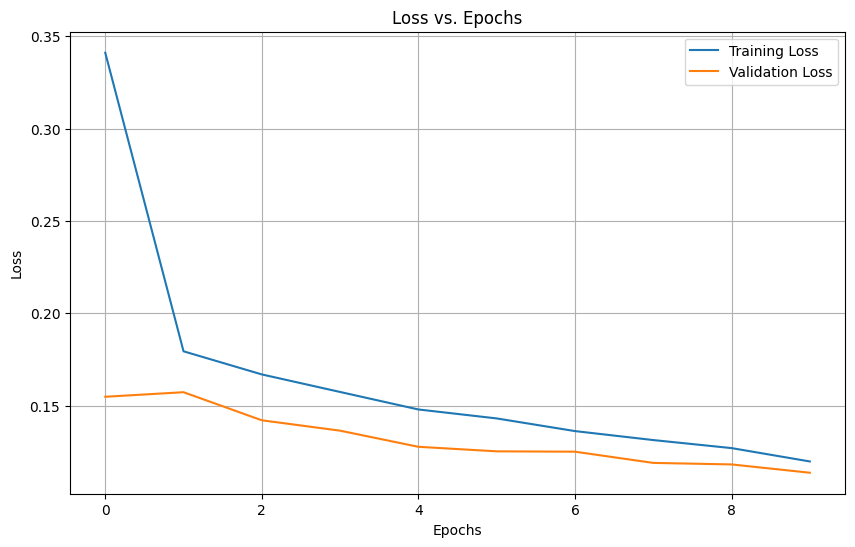

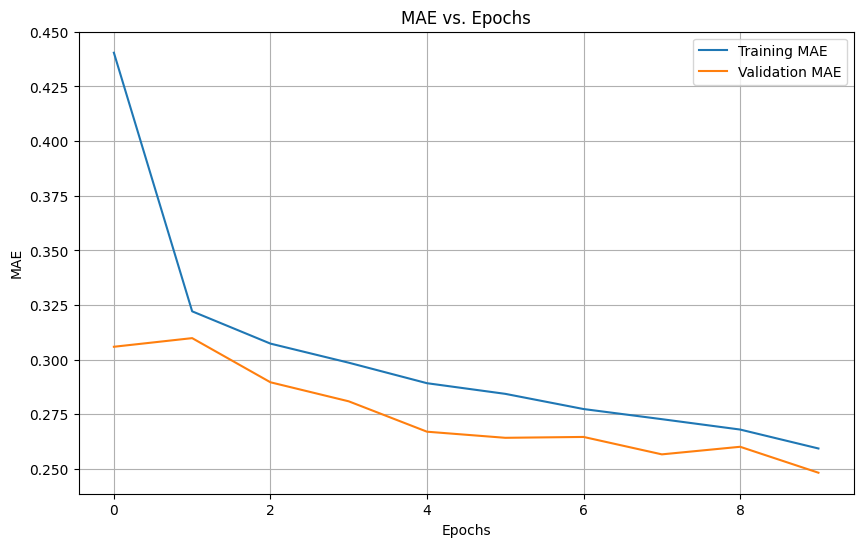

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import warnings
import missingno
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
# Define a basic ANN model
def build_ann_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)  # No activation function for regression output
    ])

    model.compile(optimizer='adam',
                  loss='mse',
                  metrics=['mae'])
    return model

# Build and train the model
ann_model = build_ann_model()
history = ann_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

# Evaluate the model on the test data
test_loss, test_mae_without_tuner = ann_model.evaluate(X_test, y_test)
print(f"Test MAE without Keras Tuner: {test_mae_without_tuner:.4f}")

# Calculate R² for the model without Keras Tuner
y_pred_without_tuner = ann_model.predict(X_test)
r2_without_tuner = r2_score(y_test, y_pred_without_tuner)
print(f"R² without Keras Tuner: {r2_without_tuner:.4f}")

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.5440 - mae: 0.5696 - val_loss: 0.1548 - val_mae: 0.3059
Epoch 2/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1884 - mae: 0.3324 - val_loss: 0.1573 - val_mae: 0.3099
Epoch 3/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1634 - mae: 0.3046 - val_loss: 0.1420 - val_mae: 0.2897
Epoch 4/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1663 - mae: 0.3094 - val_loss: 0.1364 - val_mae: 0.2810
Epoch 5/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1407 - mae: 0.2817 - val_loss: 0.1277 - val_mae: 0.2671
Epoch 6/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1394 - mae: 0.2817 - val_loss: 0.1252 - val_mae: 0.2643
Epoch 7/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1314 - mae: 0.2730 - val_loss: 0.1250 - val_mae: 0.2647
Epoch 8/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1366 - mae: 0.2781 - val_loss: 0.1190 - val_mae: 0.2567
Epoch 9/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1192 - mae: 0.2606 - va

In [ ]:
from keras_tuner import RandomSearch

# Define a model-building function for Keras Tuner
def build_ann_model_with_tuner(hp):
    model = keras.Sequential()

    # Tune the number of layers
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(layers.Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32),
                               activation='relu'))

    # Output layer for regression
    model.add(layers.Dense(1))

    # Tune the optimizer type
    optimizer = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop'])
    model.compile(optimizer=optimizer,
                  loss='mse',
                  metrics=['mae'])

    return model

# Set up the tuner
tuner = RandomSearch(
    build_ann_model_with_tuner,
    objective='val_mae',
    max_trials=10,
    executions_per_trial=2,
    directory='Keras_tuner_dir',
    project_name='ann_tuning'
)

# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

# Get the best model
best_ann_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model on the test data
best_test_loss, best_test_mae_with_tuner = best_ann_model.evaluate(X_test, y_test)
print(f"Test MAE with Keras Tuner: {best_test_mae_with_tuner:.4f}")

# Calculate R² for the model with Keras Tuner
y_pred_with_tuner = best_ann_model.predict(X_test)
r2_with_tuner = r2_score(y_test, y_pred_with_tuner)
print(f"R² with Keras Tuner: {r2_with_tuner:.4f}")


Trial 10 Complete [00h 00m 29s]
val_mae: 0.19512809067964554

Best val_mae So Far: 0.19512809067964554
Total elapsed time: 00h 02m 51s


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0737 - mae: 0.1947  
Test MAE with Keras Tuner: 0.1903
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
R² with Keras Tuner: 0.9265


In [ ]:
from keras_tuner import RandomSearch

# Define a model-building function for Keras Tuner
def build_ann_model_with_tuner(hp):
    model = keras.Sequential()

    # Tune the number of layers
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(layers.Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32),
                               activation='relu'))

    # Output layer for regression
    model.add(layers.Dense(1))

    # Tune the optimizer type
    optimizer = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop'])
    model.compile(optimizer=optimizer,
                  loss='mse',
                  metrics=['mae'])

    return model

# Set up the tuner
tuner = RandomSearch(
    build_ann_model_with_tuner,
    objective='val_mae',
    max_trials=10,
    executions_per_trial=2,
    directory='Keras_tuner_dir',
    project_name='ann_tuning'
)

# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

# Get the best model
best_ann_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model on the test data
best_test_loss, best_test_mae_with_tuner = best_ann_model.evaluate(X_test, y_test)
print(f"Test MAE with Keras Tuner: {best_test_mae_with_tuner:.4f}")

# Calculate R² for the model with Keras Tuner
y_pred_with_tuner = best_ann_model.predict(X_test)
r2_with_tuner = r2_score(y_test, y_pred_with_tuner)
print(f"R² with Keras Tuner: {r2_with_tuner:.4f}")

Reloading Tuner from Keras_tuner_dir/ann_tuning/tuner0.json


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0737 - mae: 0.1947  
Test MAE with Keras Tuner: 0.1903
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
R² with Keras Tuner: 0.9265


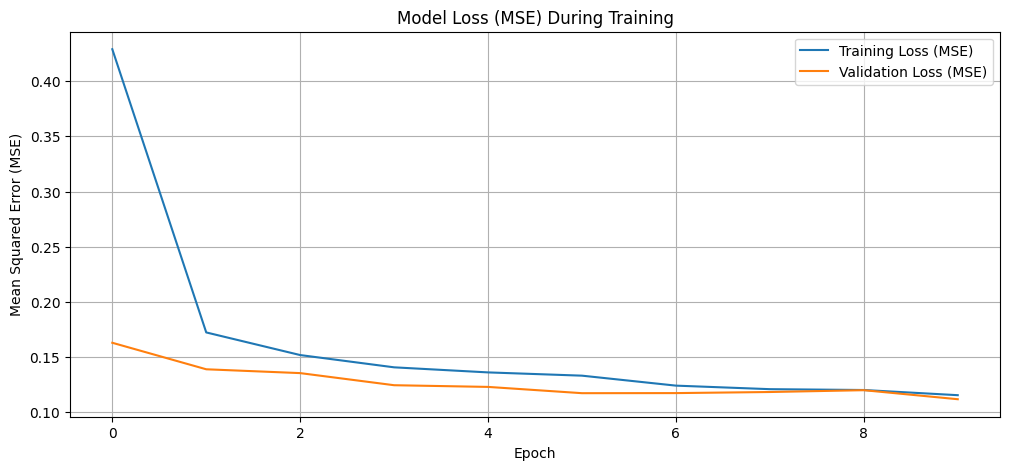

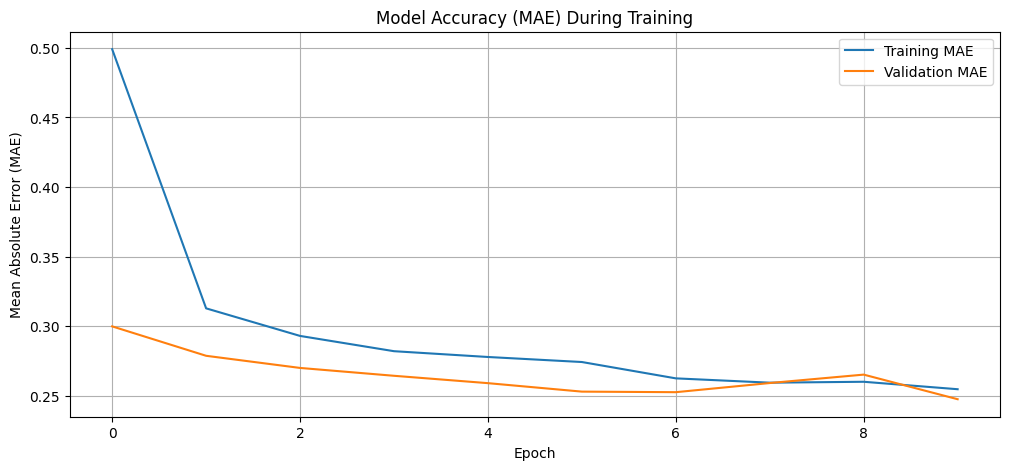

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss (MSE)
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'], label='Training Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Model Loss (MSE) During Training')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# Plot training & validation accuracy (MAE)
plt.figure(figsize=(12,5))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Accuracy (MAE) During Training')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.grid(True)
plt.show()

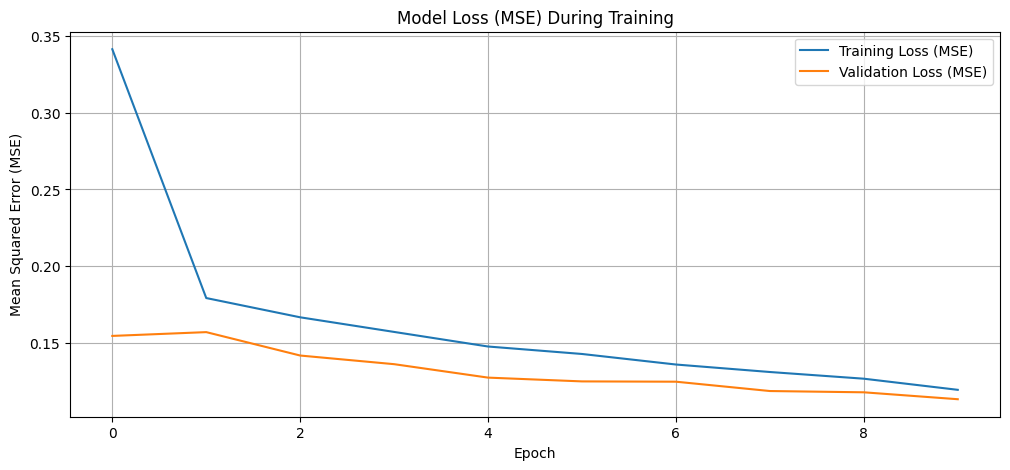

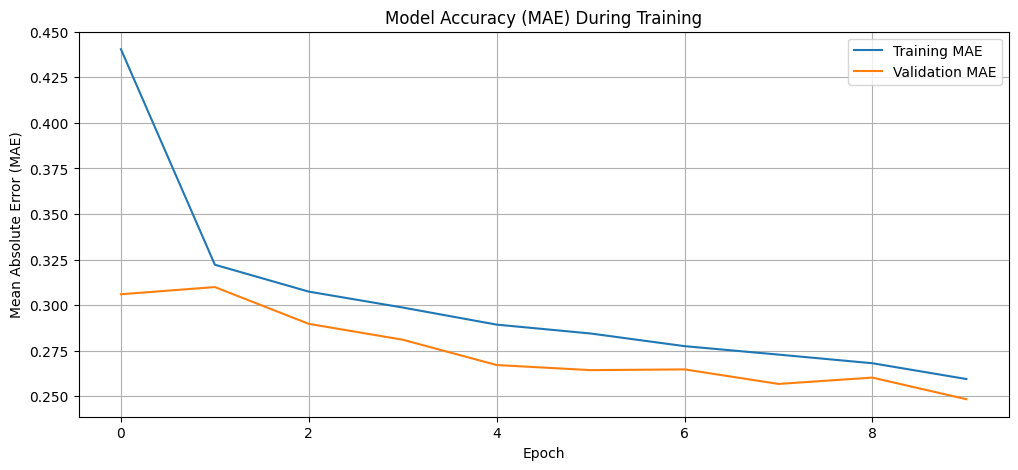

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss (MSE)
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'], label='Training Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Model Loss (MSE) During Training')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# Plot training & validation accuracy (MAE)
plt.figure(figsize=(12,5))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Accuracy (MAE) During Training')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Compare MAE
print(f"Test MAE without Keras Tuner: {test_mae_without_tuner:.4f}")
print(f"Test MAE with Keras Tuner: {best_test_mae_with_tuner:.4f}")

# Compare R²
print(f"R² without Keras Tuner: {r2_without_tuner:.4f}")
print(f"R² with Keras Tuner: {r2_with_tuner:.4f}")

if best_test_mae_with_tuner < test_mae_without_tuner:
    print("The model with Keras Tuner has a better MAE.")
else:
    print("The model without Keras Tuner has a better MAE.")

if r2_with_tuner > r2_without_tuner:
    print("The model with Keras Tuner has a better R².")
else:
    print("The model without Keras Tuner has a better R².")

Test MAE without Keras Tuner: 0.2483
Test MAE with Keras Tuner: 0.1903
R² without Keras Tuner: 0.8827
R² with Keras Tuner: 0.9265
The model with Keras Tuner has a better MAE.
The model with Keras Tuner has a better R².


In [ ]:
# Evaluate original ANN model
loss_orig, mae_orig = model.evaluate(X_test, y_test, verbose=0)
print(f"Original ANN Test Loss (MSE): {loss_orig}, Test MAE: {mae_orig}")

# Evaluate tuned ANN model
loss_tuned, mae_tuned = ann_model.evaluate(X_test, y_test, verbose=0)
print(f"Tuned ANN Test Loss (MSE): {loss_tuned}, Test MAE: {mae_tuned}")

# Comparison Table
comparison = pd.DataFrame({
    "Model": ["Original ANN", "Tuned ANN"],
    "Test Loss (MSE)": [loss_orig, loss_tuned],
    "Test MAE": [mae_orig, mae_tuned]
})

print(comparison)

# Final Model Selection
best_model_final = tuned_model if mae_tuned < mae_orig else model
print("Best Model:", "Tuned ANN" if mae_tuned < mae_orig else "Original ANN")


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

history = model.fit(X_train, y_train, epochs=100, validation_split=0.2,
                    callbacks=[early_stop, checkpoint])


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.7100 - mae: 0.6688

59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.7063 - mae: 0.6667 - val_loss: 0.1982 - val_mae: 0.3368
Epoch 2/100
51/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2651 - mae: 0.4019

59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.2639 - mae: 0.4010 - val_loss: 0.1738 - val_mae: 0.3142
Epoch 3/100
57/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2174 - mae: 0.3714

59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2177 - mae: 0.3714 - val_loss: 0.1675 - val_mae: 0.3072
Epoch 4/100
45/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2015 - mae: 0.3453

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2023 - mae: 0.3462 - val_loss: 0.1578 - val_mae: 0.3000
Epoch 5/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2094 - mae: 0.3573 - val_loss: 0.1604 - val_mae: 0.3016
Epoch 6/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1820 - mae: 0.3298 - val_loss: 0.1721 - val_mae: 0.3167
Epoch 7/100
50/59 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1894 - mae: 0.3322

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1888 - mae: 0.3320 - val_loss: 0.1549 - val_mae: 0.2972
Epoch 8/100
45/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1820 - mae: 0.3254

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1800 - mae: 0.3242 - val_loss: 0.1385 - val_mae: 0.2774
Epoch 9/100
45/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1856 - mae: 0.3270

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1818 - mae: 0.3236 - val_loss: 0.1356 - val_mae: 0.2724
Epoch 10/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1589 - mae: 0.3102 - val_loss: 0.1380 - val_mae: 0.2776
Epoch 11/100
43/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1502 - mae: 0.2935

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1509 - mae: 0.2955 - val_loss: 0.1323 - val_mae: 0.2692
Epoch 12/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1620 - mae: 0.3060 - val_loss: 0.1398 - val_mae: 0.2811
Epoch 13/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1602 - mae: 0.3074 - val_loss: 0.1400 - val_mae: 0.2774
Epoch 14/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1519 - mae: 0.3016 - val_loss: 0.1355 - val_mae: 0.2731
Epoch 15/100
40/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1400 - mae: 0.2808

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1449 - mae: 0.2853 - val_loss: 0.1296 - val_mae: 0.2712
Epoch 16/100
44/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1522 - mae: 0.2965

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1514 - mae: 0.2966 - val_loss: 0.1275 - val_mae: 0.2662
Epoch 17/100
45/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1418 - mae: 0.2867

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1434 - mae: 0.2878 - val_loss: 0.1268 - val_mae: 0.2645
Epoch 18/100
45/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1519 - mae: 0.2952

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1498 - mae: 0.2935 - val_loss: 0.1265 - val_mae: 0.2643
Epoch 19/100
43/59 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1369 - mae: 0.2831

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1376 - mae: 0.2836 - val_loss: 0.1244 - val_mae: 0.2630
Epoch 20/100
44/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1401 - mae: 0.2846

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1399 - mae: 0.2833 - val_loss: 0.1234 - val_mae: 0.2606
Epoch 21/100
39/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1402 - mae: 0.2822

59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1382 - mae: 0.2807 - val_loss: 0.1210 - val_mae: 0.2558
Epoch 22/100
46/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1451 - mae: 0.2857

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1442 - mae: 0.2856 - val_loss: 0.1202 - val_mae: 0.2585
Epoch 23/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1289 - mae: 0.2729 - val_loss: 0.1304 - val_mae: 0.2716
Epoch 24/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1331 - mae: 0.2762 - val_loss: 0.1394 - val_mae: 0.2787
Epoch 25/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1443 - mae: 0.2914 - val_loss: 0.1271 - val_mae: 0.2613
Epoch 26/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1278 - mae: 0.2702 - val_loss: 0.1212 - val_mae: 0.2563
Epoch 27/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1157 - mae: 0.2612 - val_loss: 0.1321 - val_mae: 0.2640
Epoch 28/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1190 - mae: 0.2610 - val_loss: 0.1313 - val_mae: 0.2654
Epoch 29/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1192 - mae: 0.2616 - val_loss: 0.1355 - val_mae: 0.2789
Epoch 30/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1297 - 

59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1227 - mae: 0.2680 - val_loss: 0.1200 - val_mae: 0.2581
Epoch 33/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1191 - mae: 0.2614 - val_loss: 0.1248 - val_mae: 0.2628
Epoch 34/100
54/59 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1253 - mae: 0.2678

59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1249 - mae: 0.2673 - val_loss: 0.1154 - val_mae: 0.2425
Epoch 35/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1145 - mae: 0.2577 - val_loss: 0.1324 - val_mae: 0.2684
Epoch 36/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1133 - mae: 0.2540 - val_loss: 0.1192 - val_mae: 0.2545
Epoch 37/100
45/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1066 - mae: 0.2427

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1080 - mae: 0.2449 - val_loss: 0.1114 - val_mae: 0.2419
Epoch 38/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1125 - mae: 0.2545 - val_loss: 0.1150 - val_mae: 0.2484
Epoch 39/100
44/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1188 - mae: 0.2577

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1180 - mae: 0.2568 - val_loss: 0.1095 - val_mae: 0.2446
Epoch 40/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1078 - mae: 0.2464 - val_loss: 0.1105 - val_mae: 0.2389
Epoch 41/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1079 - mae: 0.2477 - val_loss: 0.1157 - val_mae: 0.2477
Epoch 42/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1067 - mae: 0.2455 - val_loss: 0.1120 - val_mae: 0.2404
Epoch 43/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1222 - mae: 0.2530 - val_loss: 0.1147 - val_mae: 0.2465
Epoch 44/100
47/59 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1091 - mae: 0.2484 

59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1100 - mae: 0.2493 - val_loss: 0.1093 - val_mae: 0.2375
Epoch 45/100
44/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1036 - mae: 0.2440

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1052 - mae: 0.2450 - val_loss: 0.1076 - val_mae: 0.2389
Epoch 46/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1065 - mae: 0.2487 - val_loss: 0.1131 - val_mae: 0.2475
Epoch 47/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1130 - mae: 0.2520 - val_loss: 0.1149 - val_mae: 0.2512
Epoch 48/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1086 - mae: 0.2470 - val_loss: 0.1149 - val_mae: 0.2510
Epoch 49/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1194 - mae: 0.2572 - val_loss: 0.1235 - val_mae: 0.2600
Epoch 50/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1038 - mae: 0.2423 - val_loss: 0.1151 - val_mae: 0.2474
Epoch 51/100
44/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0932 - mae: 0.2309

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0956 - mae: 0.2334 - val_loss: 0.1065 - val_mae: 0.2352
Epoch 52/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1011 - mae: 0.2375 - val_loss: 0.1117 - val_mae: 0.2442
Epoch 53/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1100 - mae: 0.2502 - val_loss: 0.1187 - val_mae: 0.2509
Epoch 54/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0981 - mae: 0.2345 - val_loss: 0.1106 - val_mae: 0.2433
Epoch 55/100
41/59 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0990 - mae: 0.2397 

59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0982 - mae: 0.2380 - val_loss: 0.1053 - val_mae: 0.2338
Epoch 56/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1046 - mae: 0.2401 - val_loss: 0.1229 - val_mae: 0.2588
Epoch 57/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0984 - mae: 0.2317 - val_loss: 0.1055 - val_mae: 0.2313
Epoch 58/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1030 - mae: 0.2374 - val_loss: 0.1056 - val_mae: 0.2300
Epoch 59/100
45/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0954 - mae: 0.2318

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0966 - mae: 0.2325 - val_loss: 0.1035 - val_mae: 0.2291
Epoch 60/100
39/59 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0951 - mae: 0.2270 

59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0966 - mae: 0.2292 - val_loss: 0.1021 - val_mae: 0.2265
Epoch 61/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0907 - mae: 0.2221 - val_loss: 0.1048 - val_mae: 0.2399
Epoch 62/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0891 - mae: 0.2270 - val_loss: 0.1038 - val_mae: 0.2245
Epoch 63/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0899 - mae: 0.2263 - val_loss: 0.1068 - val_mae: 0.2353
Epoch 64/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0893 - mae: 0.2273 - val_loss: 0.1036 - val_mae: 0.2265
Epoch 65/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0964 - mae: 0.2313 - val_loss: 0.1035 - val_mae: 0.2304
Epoch 66/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0988 - mae: 0.2361 - val_loss: 0.1028 - val_mae: 0.2280
Epoch 67/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0932 - mae: 0.2344 - val_loss: 0.1202 - val_mae: 0.2531
Epoch 68/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0922 

In [ ]:
# Evaluate original ANN model
loss_orig, mae_orig = model.evaluate(X_test, y_test, verbose=0)
print(f"Original ANN Test Loss (MSE): {loss_orig}, Test MAE: {mae_orig}")

# Evaluate tuned ANN model
loss_tuned, mae_tuned = tuned_model.evaluate(X_test, y_test, verbose=0)
print(f"Tuned ANN Test Loss (MSE): {loss_tuned}, Test MAE: {mae_tuned}")

# Comparison Table
comparison = pd.DataFrame({
    "Model": ["Original ANN", "Tuned ANN"],
    "Test Loss (MSE)": [loss_orig, loss_tuned],
    "Test MAE": [mae_orig, mae_tuned]
})

print(comparison)

# Final Model Selection
best_model_final = tuned_model if mae_tuned < mae_orig else model
print("Best Model:", "Tuned ANN" if mae_tuned < mae_orig else "Original ANN")


Original ANN Test Loss (MSE): 0.08293843269348145, Test MAE: 0.21293231844902039
Tuned ANN Test Loss (MSE): 0.12849558889865875, Test MAE: 0.2659393548965454
          Model  Test Loss (MSE)  Test MAE
0  Original ANN             0.08      0.21
1     Tuned ANN             0.13      0.27
Best Model: Original ANN


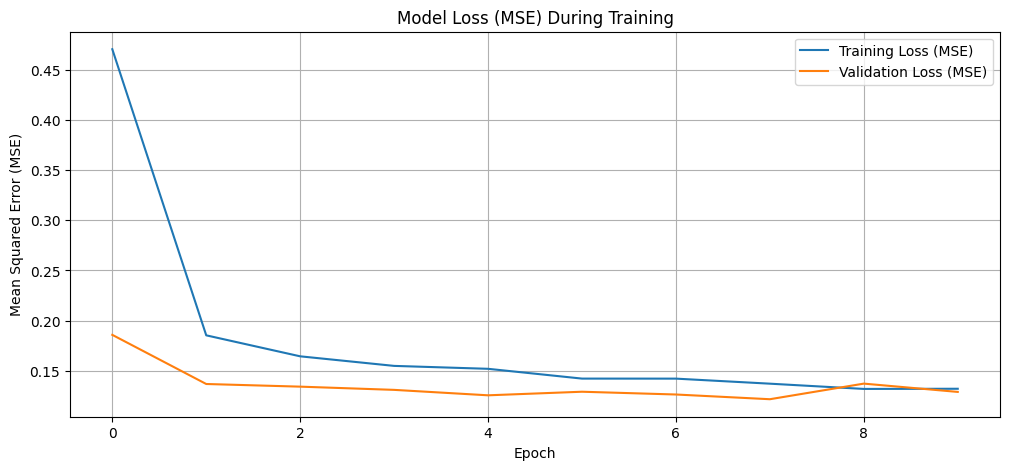

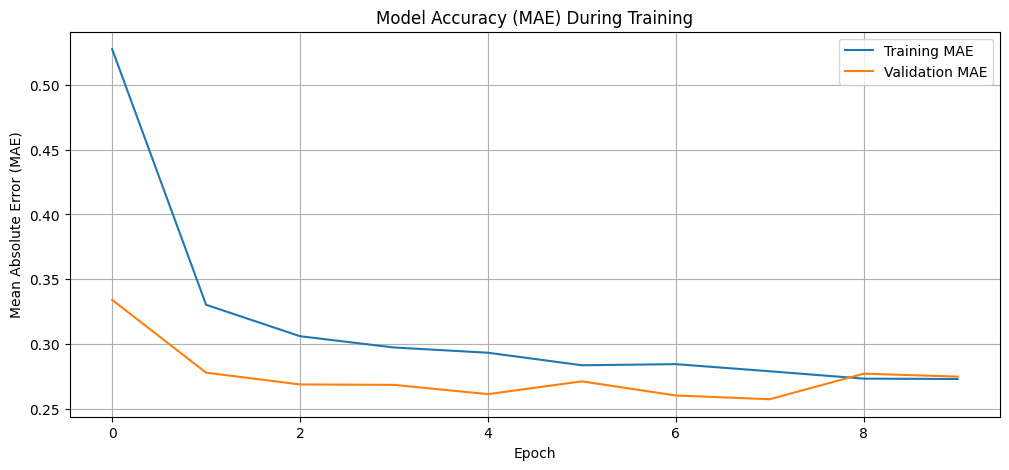

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss (MSE)
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'], label='Training Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Model Loss (MSE) During Training')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# Plot training & validation accuracy (MAE)
plt.figure(figsize=(12,5))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Accuracy (MAE) During Training')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.grid(True)
plt.show()


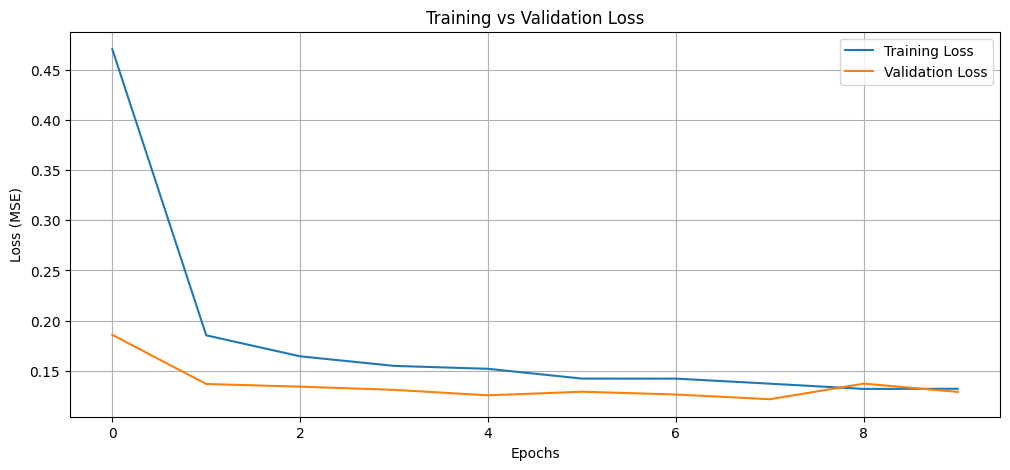

In [ ]:
# Example of clear and meaningful plots
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Training vs Validation Loss')
plt.grid(True)
plt.show()


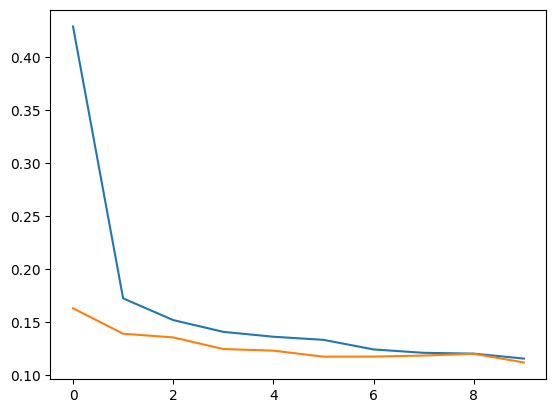

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

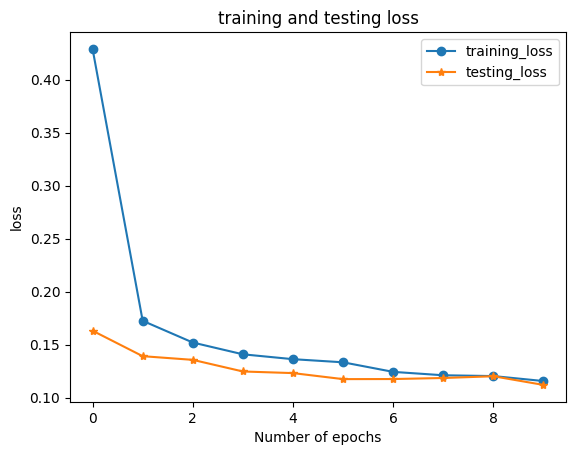

In [ ]:
a1=history.history
p=pd.DataFrame(a1)
p['epoch']=history.epoch
plt.plot(p['epoch'],p['loss'],label='training_loss',marker='o')
plt.plot(p['epoch'],p['val_loss'],label='testing_loss',marker='*')
plt.title('training and testing loss')
plt.xlabel('Number of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

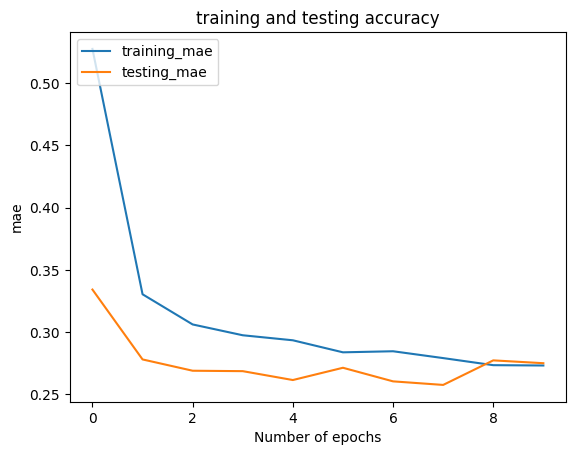

In [ ]:
# prompt: code to plot accuracy

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('training and testing accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('mae')
plt.legend(['training_mae', 'testing_mae'], loc='upper left')
plt.show()


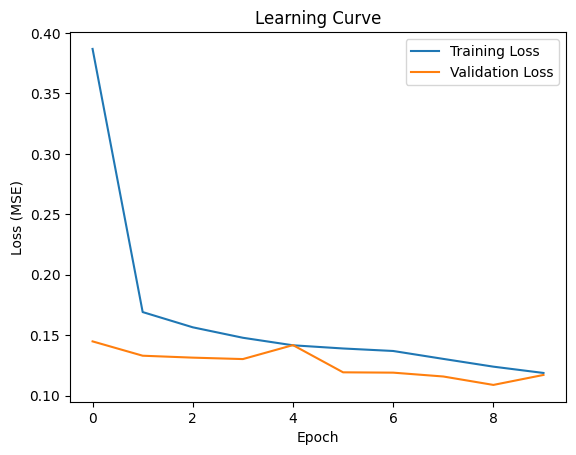

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Learning Curve')
plt.legend()
plt.show()

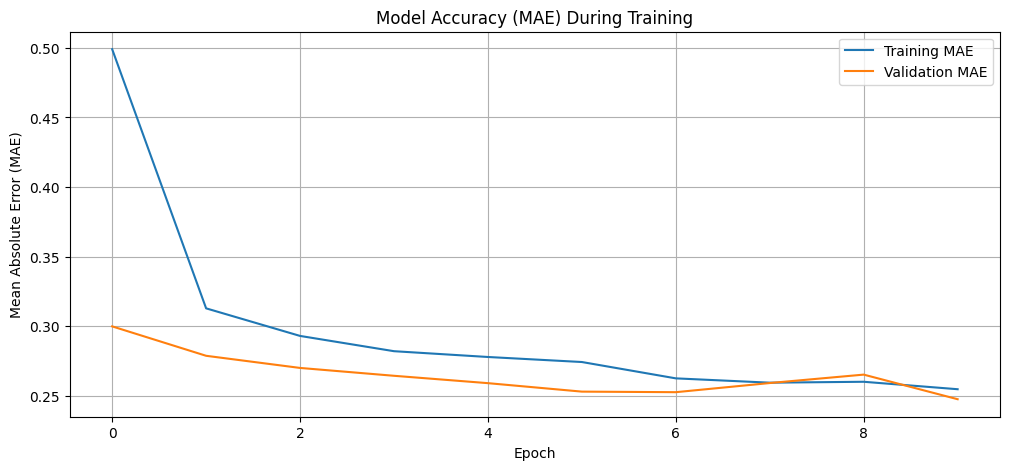

In [ ]:


# Plot training & validation accuracy (MAE)
plt.figure(figsize=(12,5))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Accuracy (MAE) During Training')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.grid(True)
plt.show()